In [ ]:
import pandas as pd # imports pandas module

path = '/content/liver_cirrhosis.csv' # assigns the string to the variable path
#df = pd.read_pickle(path) # commented out
df = pd.read_csv(path) # calls the read_csv method from pandas and assigns the DataFrame to the variable df
df.head(10) # displays the first 5 rows of the DataFrame

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   
5    4427      C  Placebo  16418   F       N            N       N     N   
6    1418      C  Placebo  23011   F       Y            N       Y     N   
7      51      D  Placebo  24107   F       Y            N       Y     Y   
8    2504      C  Placebo  15265   F       N            N       N     N   
9    1012      D  Placebo  22280   M       Y            N       Y     S   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5   149.000000     4.04   227.0     598.0   52.70      57.000000   
1        0.5   219.000000     3.93    22.0     663.0   45.00      75.000000   
2        0.5   320.000000     3.54    51.0    1243.0  122.45      80.000000   
3        0.7   255.000000     3.74    23.0    1024.0   77.50      58.000000   
4        1.9   486.000000     3.54    74.0    1052.0  108.50     109.000000   
5        1.9   259.000000     3.70   281.0   10396.8  188.34     178.000000   
6        1.3   291.000000     3.44    75.0    1082.0   85.00     195.000000   
7       12.6   200.000000     2.74   140.0     918.0  147.25     143.000000   
8        2.3   369.510563     3.93    24.0    1828.0  133.30     124.702128   
9        1.4   176.000000     3.48   210.0     516.0   96.10      55.000000   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1  
5      327.0         10.4      2  
6      156.0         10.3      2  
7      150.0         11.1      3  
8      474.0         10.9      1  
9      259.0         10.1      3

In [ ]:
#Miss Valuse
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/liver_cirrhosis.csv'
data = pd.read_csv(file_path)

# Get the number of attributes and instances
num_attributes = data.shape[1]
num_instances = data.shape[0]

num_attributes, num_instances

(19, 25000)

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/liver_cirrhosis.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Get the number of rows and columns
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Get the unique classes in the target column 'Status'
unique_classes = data['Stage'].unique()
print(f"Unique classes in 'Stage' column: {unique_classes}")

Number of rows: 25000
Number of columns: 19
Unique classes in 'Stage' column: [1 2 3]


In [ ]:
# Value counts for the Stage column
print(df['Stage'].value_counts())

Stage
2    8441
3    8294
1    8265
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Given class distribution
class_distribution = {'low': 8265, 'mid': 8441, 'high': 8294}

# Convert to DataFrame
df_class_distribution = pd.DataFrame(list(class_distribution.items()), columns=['Stage', 'Count'])

# Calculate the proportion
df_class_distribution['Proportion'] = df_class_distribution['Count'] / df_class_distribution['Count'].sum()

print(df_class_distribution)


  Stage  Count  Proportion
0   low   8265     0.33060
1   mid   8441     0.33764
2  high   8294     0.33176


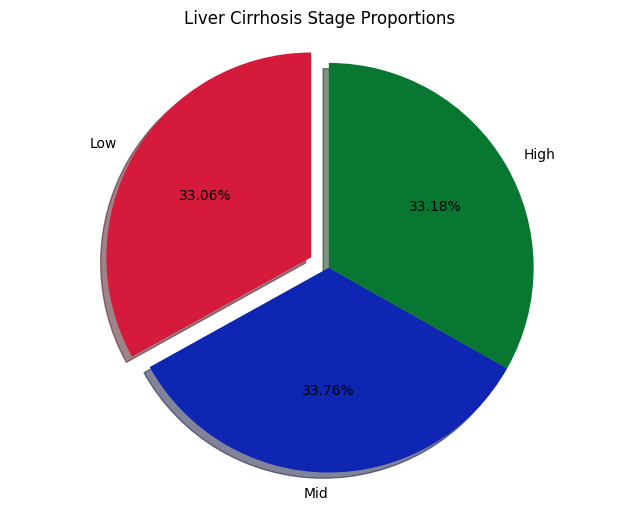

In [ ]:
import matplotlib.pyplot as plt

# Data for liver cirrhosis stages
stages = ['Low', 'Mid', 'High']
counts = [8265, 8441, 8294]
colors = ['#D61A3C', '#0E26B1', '#087732']  # Custom colors to match the style

# Define explode to separate one slice (like in the image)
explode = (0.1, 0, 0)  # Explode the first slice for emphasis

# Create the pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size to match proportions
plt.pie(counts, labels=stages, autopct='%1.2f%%', startangle=90,
        colors=colors, explode=explode, shadow=True)

# Add equal aspect ratio to ensure the pie chart is circular
plt.axis('equal')

# Title for the plot
plt.title('Liver Cirrhosis Stage Proportions')

# Save the pie chart as an image with high resolution (500 DPI)
plt.savefig('liver_cirrhosis_stages_pie_chart.png', dpi=500)

# Display the pie chart
plt.show()


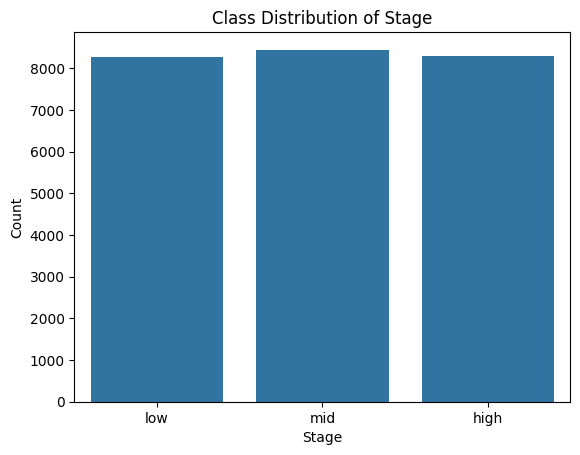

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the class distribution
sns.barplot(x='Stage', y='Count', data=df_class_distribution)
plt.title('Class Distribution of Stage')

# Save the plot before displaying it
plt.savefig('class_distribution_plot.png', dpi=500)

# Show the plot
plt.show()


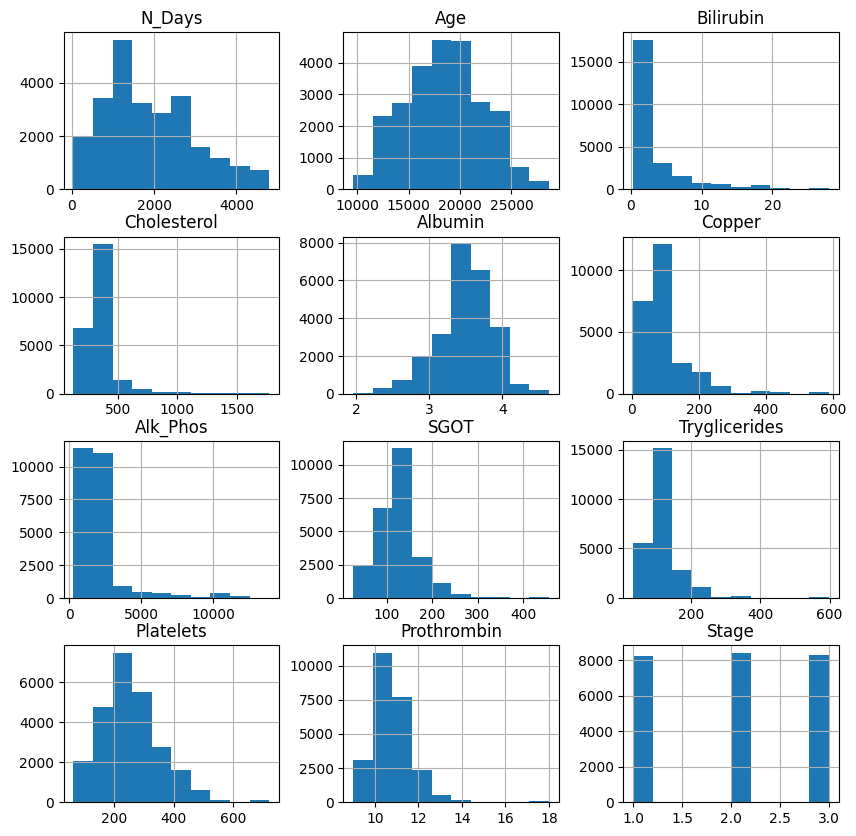

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histograms for numerical features
df.hist(figsize=(10,10))
plt.show()

#SMOTE

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load data into a DataFrame
data = pd.read_csv('/content/liver_cirrhosis.csv')

# Identify non-numerical columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns

# Apply label encoding to non-numerical columns
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Separate features and target
X = data.drop(columns=['Stage'])
y = data['Stage']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Verify the balance
print(balanced_data['Stage'].value_counts())

Stage
1    8441
2    8441
3    8441
Name: count, dtype: int64


#Under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
X = data.drop(columns=['Stage'])
y = data['Stage']

# Apply Random Under-sampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Verify the balance
print(balanced_data['Stage'].value_counts())


Stage
1    8265
2    8265
3    8265
Name: count, dtype: int64


<ipython-input-11-ed767ea18a4c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Stage'], palette=stage_colors)
<ipython-input-11-ed767ea18a4c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette=stage_colors)


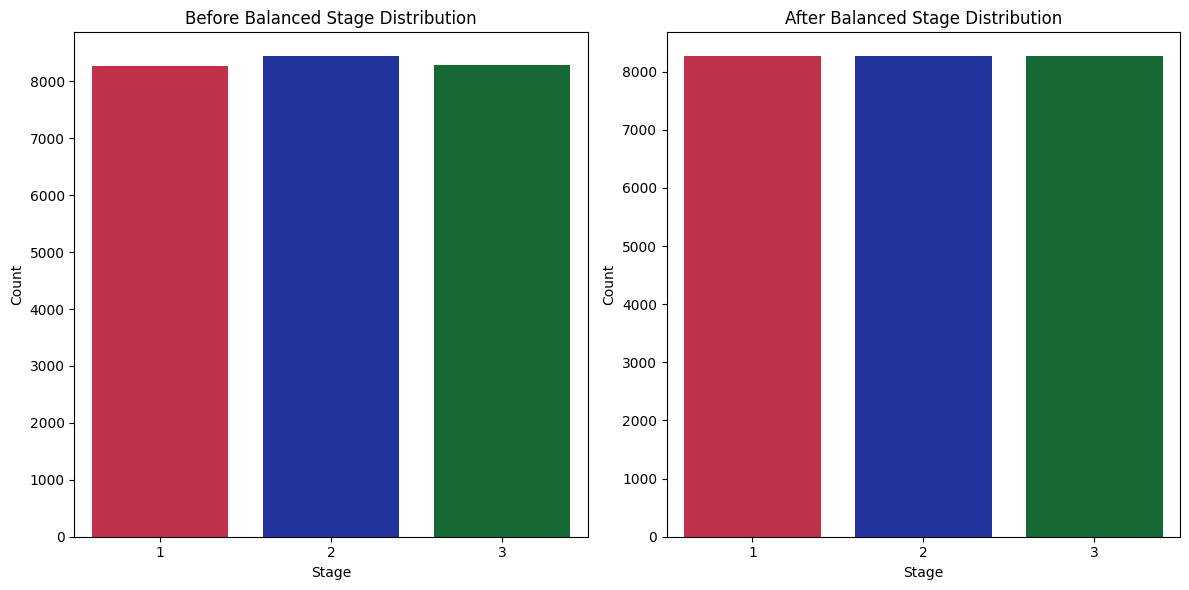

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette for stages
# Changed keys to strings to match values in the 'Stage' column
stage_colors = {'1': '#D61A3C', '2': '#0E26B1', '3': '#087732'}

# Plot the original 'Stage' distribution
plt.figure(figsize=(12, 6))

# Before balancing
plt.subplot(1, 2, 1)
sns.countplot(x=data['Stage'], palette=stage_colors)
plt.title('Before Balanced Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')

# After resampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, palette=stage_colors)
plt.title('After Balanced Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('balanced_stage_distribution.png', dpi=500)
plt.show()

#Heat map after balancing dataset

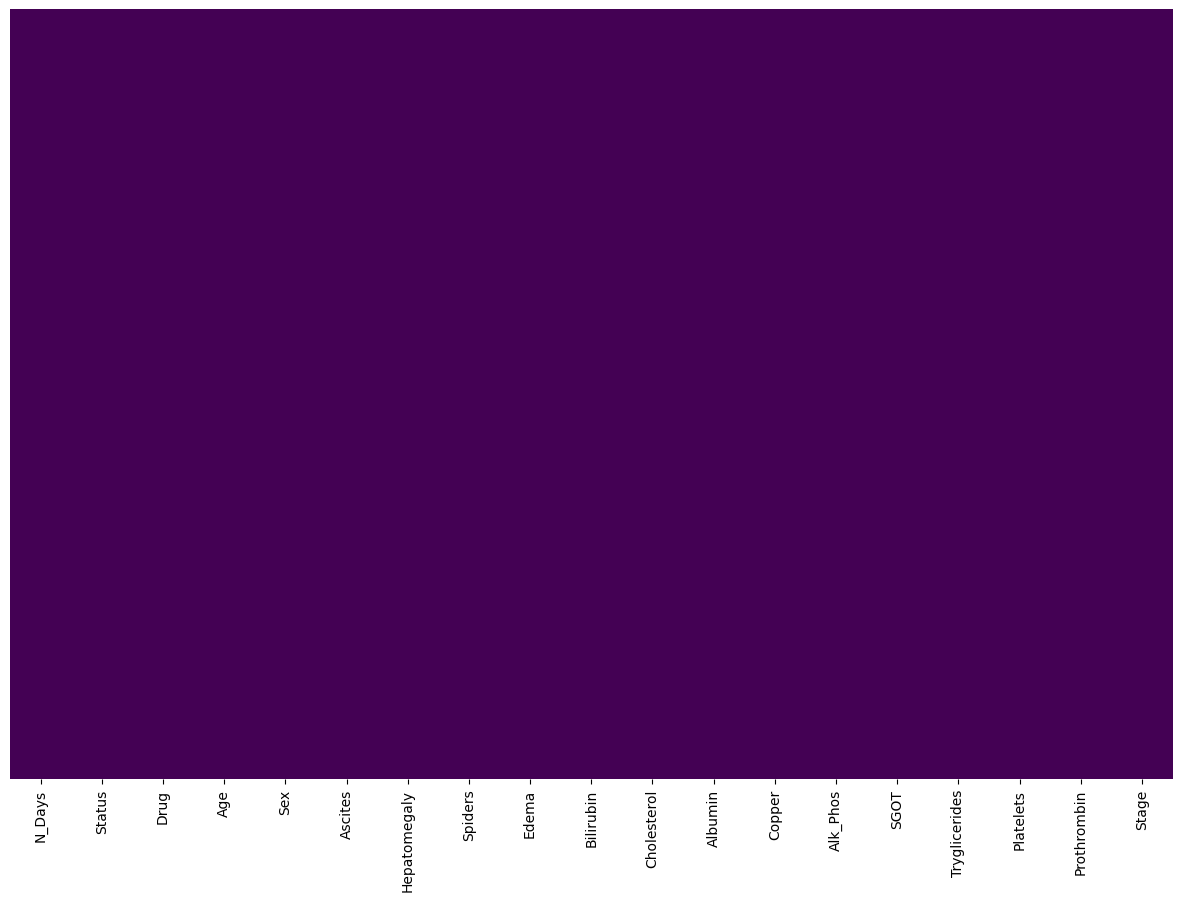

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path or use pd.read_csv for a CSV file
# data = pd.read_csv('your_dataset.csv')

# For demonstration, I'm using a sample dataframe, replace 'data' with your actual dataset
data = balanced_data  # Load your actual dataset

# Set the figure size for the plot
plt.figure(figsize=(15,10))

# Use seaborn heatmap to visualize the missing data (True means data is missing)
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Show the plot
plt.show()


#All model Test without balance


----- Logistic Regression -----


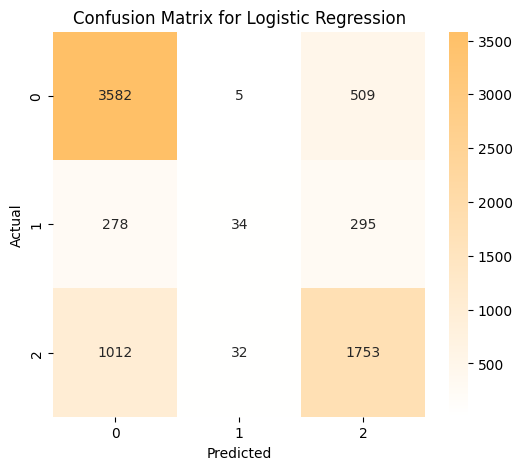

Test Accuracy: 71.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      4096
           1       0.48      0.06      0.10       607
           2       0.69      0.63      0.65      2797

    accuracy                           0.72      7500
   macro avg       0.63      0.52      0.52      7500
weighted avg       0.70      0.72      0.69      7500


Average Metrics:
Average Sensitivity (Recall): 0.5191
Average Specificity: 0.8149
Average False Positive Rate (FPR): 0.1851
Average False Negative Rate (FNR): 0.4809

Additional Metrics:
Hamming Loss: 0.2841
Cohen's Kappa Score: 0.4508
Matthews Correlation Coefficient (MCC): 0.4602

----- Decision Tree -----


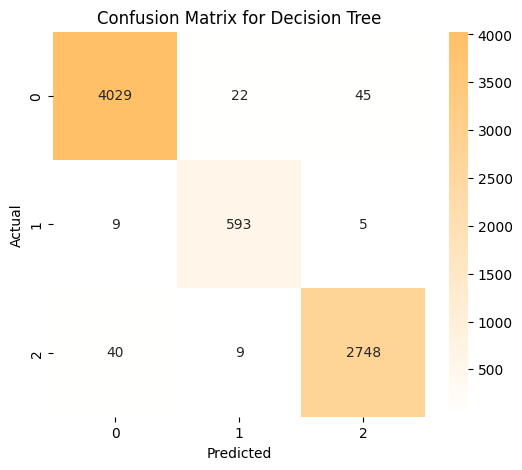

Test Accuracy: 98.27%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4096
           1       0.95      0.98      0.96       607
           2       0.98      0.98      0.98      2797

    accuracy                           0.98      7500
   macro avg       0.97      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500


Average Metrics:
Average Sensitivity (Recall): 0.9810
Average Specificity: 0.9902
Average False Positive Rate (FPR): 0.0098
Average False Negative Rate (FNR): 0.0190

Additional Metrics:
Hamming Loss: 0.0173
Cohen's Kappa Score: 0.9689
Matthews Correlation Coefficient (MCC): 0.9689

----- Random Forest -----


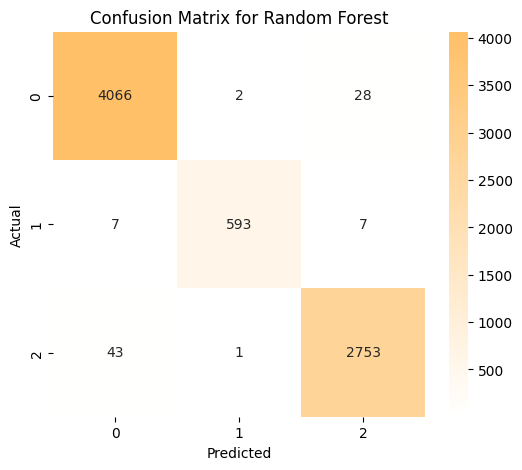

Test Accuracy: 98.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4096
           1       0.99      0.98      0.99       607
           2       0.99      0.98      0.99      2797

    accuracy                           0.99      7500
   macro avg       0.99      0.98      0.99      7500
weighted avg       0.99      0.99      0.99      7500


Average Metrics:
Average Sensitivity (Recall): 0.9846
Average Specificity: 0.9925
Average False Positive Rate (FPR): 0.0075
Average False Negative Rate (FNR): 0.0154

Additional Metrics:
Hamming Loss: 0.0117
Cohen's Kappa Score: 0.9789
Matthews Correlation Coefficient (MCC): 0.9789

----- SVM -----


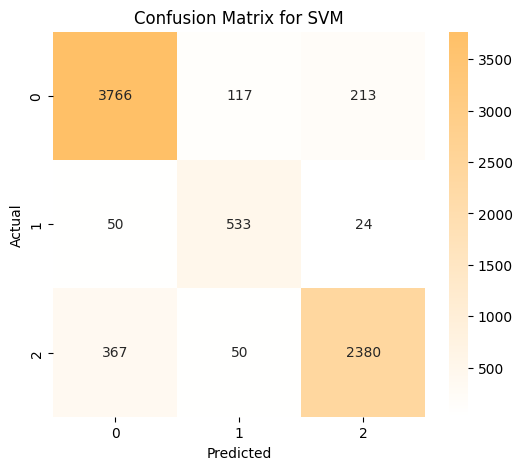

Test Accuracy: 89.05%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4096
           1       0.76      0.88      0.82       607
           2       0.91      0.85      0.88      2797

    accuracy                           0.89      7500
   macro avg       0.86      0.88      0.87      7500
weighted avg       0.89      0.89      0.89      7500


Average Metrics:
Average Sensitivity (Recall): 0.8828
Average Specificity: 0.9343
Average False Positive Rate (FPR): 0.0657
Average False Negative Rate (FNR): 0.1172

Additional Metrics:
Hamming Loss: 0.1095
Cohen's Kappa Score: 0.8037
Matthews Correlation Coefficient (MCC): 0.8043

----- Naive Bayes -----


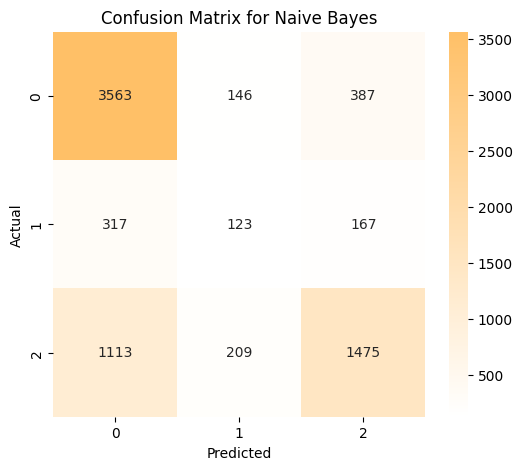

Test Accuracy: 68.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      4096
           1       0.26      0.20      0.23       607
           2       0.73      0.53      0.61      2797

    accuracy                           0.69      7500
   macro avg       0.57      0.53      0.54      7500
weighted avg       0.68      0.69      0.67      7500


Average Metrics:
Average Sensitivity (Recall): 0.5333
Average Specificity: 0.8035
Average False Positive Rate (FPR): 0.1965
Average False Negative Rate (FNR): 0.4667

Additional Metrics:
Hamming Loss: 0.3119
Cohen's Kappa Score: 0.4120
Matthews Correlation Coefficient (MCC): 0.4231

----- Gradient Boosting -----


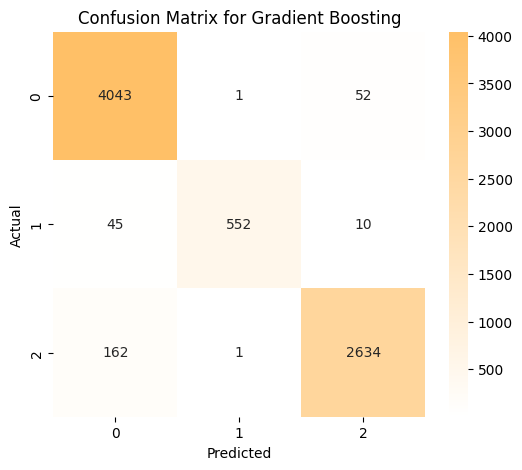

Test Accuracy: 96.39%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4096
           1       1.00      0.91      0.95       607
           2       0.98      0.94      0.96      2797

    accuracy                           0.96      7500
   macro avg       0.97      0.95      0.96      7500
weighted avg       0.96      0.96      0.96      7500


Average Metrics:
Average Sensitivity (Recall): 0.9461
Average Specificity: 0.9752
Average False Positive Rate (FPR): 0.0248
Average False Negative Rate (FNR): 0.0539

Additional Metrics:
Hamming Loss: 0.0361
Cohen's Kappa Score: 0.9344
Matthews Correlation Coefficient (MCC): 0.9350

----- AdaBoost -----


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


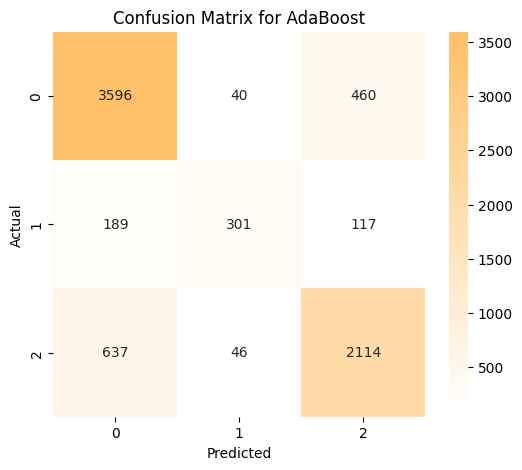

Test Accuracy: 80.15%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      4096
           1       0.78      0.50      0.61       607
           2       0.79      0.76      0.77      2797

    accuracy                           0.80      7500
   macro avg       0.79      0.71      0.74      7500
weighted avg       0.80      0.80      0.80      7500


Average Metrics:
Average Sensitivity (Recall): 0.7099
Average Specificity: 0.8741
Average False Positive Rate (FPR): 0.1259
Average False Negative Rate (FNR): 0.2901

Additional Metrics:
Hamming Loss: 0.1985
Cohen's Kappa Score: 0.6324
Matthews Correlation Coefficient (MCC): 0.6344

----- KNN -----


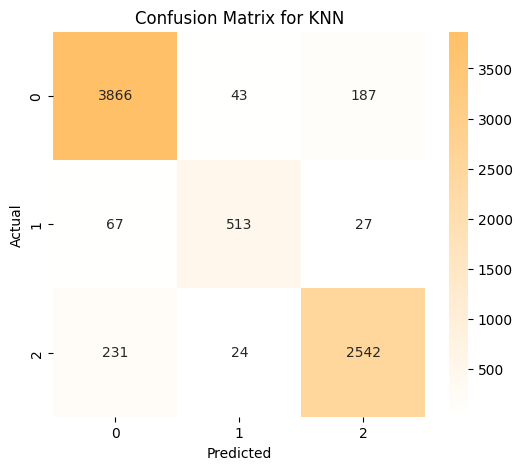

Test Accuracy: 92.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4096
           1       0.88      0.85      0.86       607
           2       0.92      0.91      0.92      2797

    accuracy                           0.92      7500
   macro avg       0.91      0.90      0.91      7500
weighted avg       0.92      0.92      0.92      7500


Average Metrics:
Average Sensitivity (Recall): 0.8993
Average Specificity: 0.9524
Average False Positive Rate (FPR): 0.0476
Average False Negative Rate (FNR): 0.1007

Additional Metrics:
Hamming Loss: 0.0772
Cohen's Kappa Score: 0.8605
Matthews Correlation Coefficient (MCC): 0.8606


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from matplotlib.colors import LinearSegmentedColormap

# Import necessary library for scaling
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/liver_cirrhosis.csv')

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with scaled features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create a custom colormap using #FFC067 color code
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#FFC067"])

# Initialize the models including KNN and SVM with class_weight balanced
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),  # SVM with class weight balanced
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier()  # Add KNN model
}

# Function to calculate sensitivity, specificity, FPR, and FNR from confusion matrix and return averages
def calculate_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        # Accumulate metrics
        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Import additional metrics
from sklearn.metrics import hamming_loss, cohen_kappa_score, matthews_corrcoef

# Evaluate each model
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")

    # Train the model on scaled data
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate average metrics
    metrics = calculate_metrics(conf_matrix)

    # Additional Metrics: Hamming Loss, Kappa Score, MCC
    h_loss = hamming_loss(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Output the results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {metrics['avg_FNR']:.4f}")

    # Print Hamming Loss, Kappa Score, and MCC
    print("\nAdditional Metrics:")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

#With Balanced


----- Logistic Regression -----


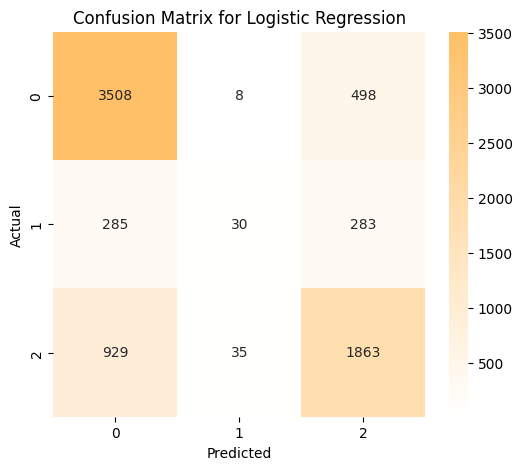

Test Accuracy: 72.60%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      4014
           1       0.41      0.05      0.09       598
           2       0.70      0.66      0.68      2827

    accuracy                           0.73      7439
   macro avg       0.62      0.53      0.52      7439
weighted avg       0.70      0.73      0.70      7439


Average Metrics:
Average Sensitivity (Recall): 0.5277
Average Specificity: 0.8233
Average False Positive Rate (FPR): 0.1767
Average False Negative Rate (FNR): 0.4723

Additional Metrics:
Hamming Loss: 0.2740
Cohen's Kappa Score: 0.4748
Matthews Correlation Coefficient (MCC): 0.4833

----- Decision Tree -----


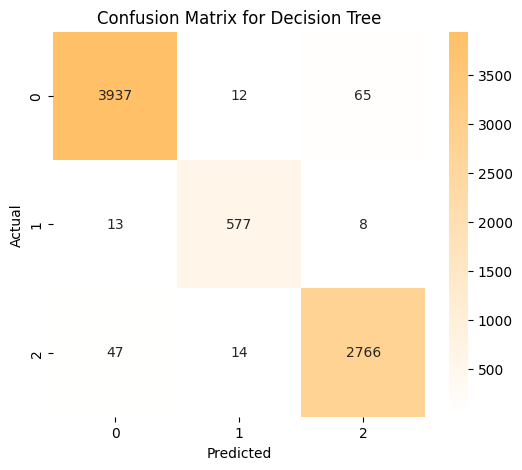

Test Accuracy: 97.86%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4014
           1       0.96      0.96      0.96       598
           2       0.97      0.98      0.98      2827

    accuracy                           0.98      7439
   macro avg       0.97      0.97      0.97      7439
weighted avg       0.98      0.98      0.98      7439


Average Metrics:
Average Sensitivity (Recall): 0.9747
Average Specificity: 0.9876
Average False Positive Rate (FPR): 0.0124
Average False Negative Rate (FNR): 0.0253

Additional Metrics:
Hamming Loss: 0.0214
Cohen's Kappa Score: 0.9617
Matthews Correlation Coefficient (MCC): 0.9617

----- Random Forest -----


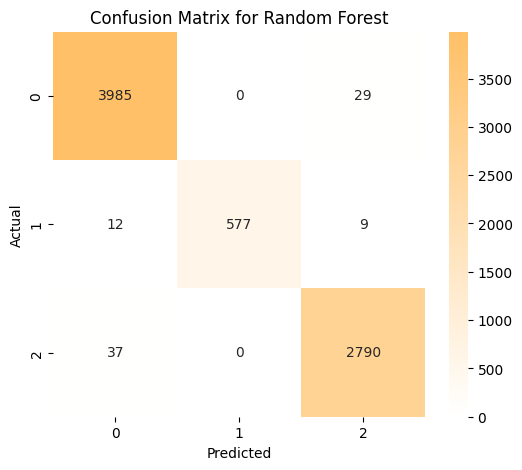

Test Accuracy: 98.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4014
           1       1.00      0.96      0.98       598
           2       0.99      0.99      0.99      2827

    accuracy                           0.99      7439
   macro avg       0.99      0.98      0.99      7439
weighted avg       0.99      0.99      0.99      7439


Average Metrics:
Average Sensitivity (Recall): 0.9815
Average Specificity: 0.9925
Average False Positive Rate (FPR): 0.0075
Average False Negative Rate (FNR): 0.0185

Additional Metrics:
Hamming Loss: 0.0117
Cohen's Kappa Score: 0.9790
Matthews Correlation Coefficient (MCC): 0.9790

----- SVM -----


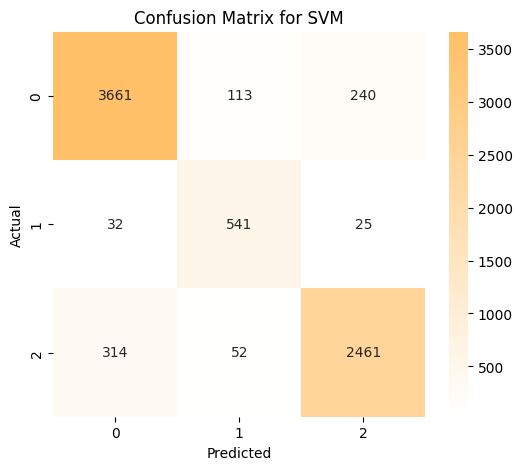

Test Accuracy: 89.57%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4014
           1       0.77      0.90      0.83       598
           2       0.90      0.87      0.89      2827

    accuracy                           0.90      7439
   macro avg       0.86      0.90      0.88      7439
weighted avg       0.90      0.90      0.90      7439


Average Metrics:
Average Sensitivity (Recall): 0.8958
Average Specificity: 0.9391
Average False Positive Rate (FPR): 0.0609
Average False Negative Rate (FNR): 0.1042

Additional Metrics:
Hamming Loss: 0.1043
Cohen's Kappa Score: 0.8145
Matthews Correlation Coefficient (MCC): 0.8148

----- Naive Bayes -----


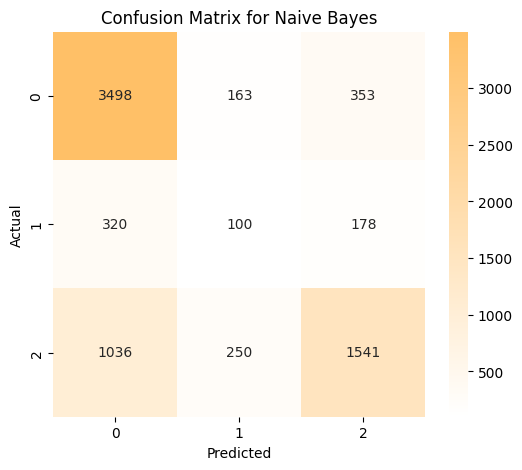

Test Accuracy: 69.08%

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79      4014
           1       0.19      0.17      0.18       598
           2       0.74      0.55      0.63      2827

    accuracy                           0.69      7439
   macro avg       0.55      0.53      0.53      7439
weighted avg       0.69      0.69      0.68      7439


Average Metrics:
Average Sensitivity (Recall): 0.5279
Average Specificity: 0.8095
Average False Positive Rate (FPR): 0.1905
Average False Negative Rate (FNR): 0.4721

Additional Metrics:
Hamming Loss: 0.3092
Cohen's Kappa Score: 0.4237
Matthews Correlation Coefficient (MCC): 0.4339

----- Gradient Boosting -----


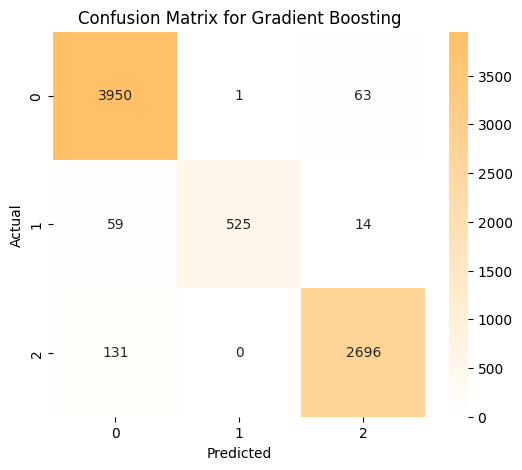

Test Accuracy: 96.40%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4014
           1       1.00      0.88      0.93       598
           2       0.97      0.95      0.96      2827

    accuracy                           0.96      7439
   macro avg       0.97      0.94      0.96      7439
weighted avg       0.96      0.96      0.96      7439


Average Metrics:
Average Sensitivity (Recall): 0.9385
Average Specificity: 0.9759
Average False Positive Rate (FPR): 0.0241
Average False Negative Rate (FNR): 0.0615

Additional Metrics:
Hamming Loss: 0.0360
Cohen's Kappa Score: 0.9348
Matthews Correlation Coefficient (MCC): 0.9352

----- AdaBoost -----


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


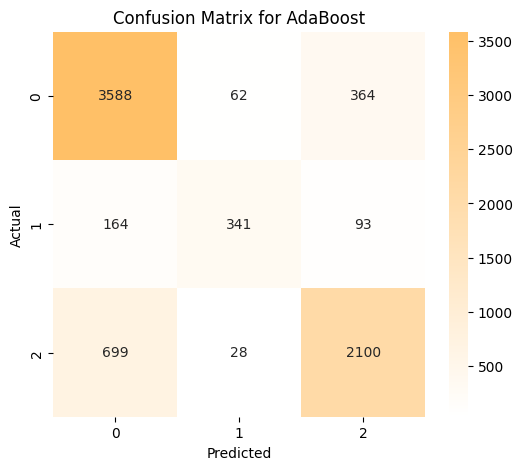

Test Accuracy: 81.05%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4014
           1       0.79      0.57      0.66       598
           2       0.82      0.74      0.78      2827

    accuracy                           0.81      7439
   macro avg       0.81      0.74      0.76      7439
weighted avg       0.81      0.81      0.81      7439


Average Metrics:
Average Sensitivity (Recall): 0.7356
Average Specificity: 0.8786
Average False Positive Rate (FPR): 0.1214
Average False Negative Rate (FNR): 0.2644

Additional Metrics:
Hamming Loss: 0.1895
Cohen's Kappa Score: 0.6502
Matthews Correlation Coefficient (MCC): 0.6538

----- KNN -----


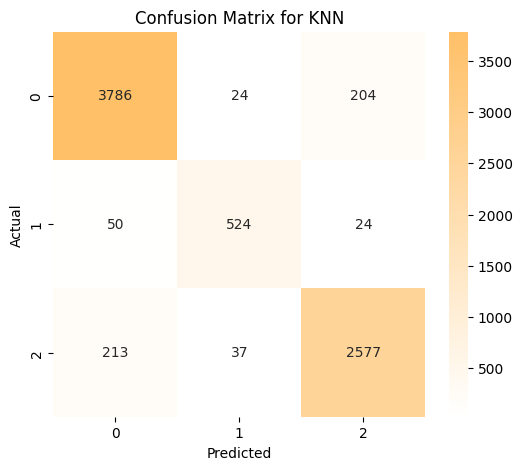

Test Accuracy: 92.58%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4014
           1       0.90      0.88      0.89       598
           2       0.92      0.91      0.92      2827

    accuracy                           0.93      7439
   macro avg       0.92      0.91      0.91      7439
weighted avg       0.93      0.93      0.93      7439


Average Metrics:
Average Sensitivity (Recall): 0.9103
Average Specificity: 0.9550
Average False Positive Rate (FPR): 0.0450
Average False Negative Rate (FNR): 0.0897

Additional Metrics:
Hamming Loss: 0.0742
Cohen's Kappa Score: 0.8667
Matthews Correlation Coefficient (MCC): 0.8667


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from matplotlib.colors import LinearSegmentedColormap

# Import necessary library for scaling
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = balanced_data

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with scaled features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create a custom colormap using #FFC067 color code
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#FFC067"])

# Initialize the models including KNN and SVM with class_weight balanced
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),  # SVM with class weight balanced
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier()  # Add KNN model
}

# Function to calculate sensitivity, specificity, FPR, and FNR from confusion matrix and return averages
def calculate_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        # Accumulate metrics
        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Import additional metrics
from sklearn.metrics import hamming_loss, cohen_kappa_score, matthews_corrcoef

# Evaluate each model
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")

    # Train the model on scaled data
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate average metrics
    metrics = calculate_metrics(conf_matrix)

    # Additional Metrics: Hamming Loss, Kappa Score, MCC
    h_loss = hamming_loss(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Output the results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {metrics['avg_FNR']:.4f}")

    # Print Hamming Loss, Kappa Score, and MCC
    print("\nAdditional Metrics:")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


#RFE feature without balance


----- Logistic Regression -----


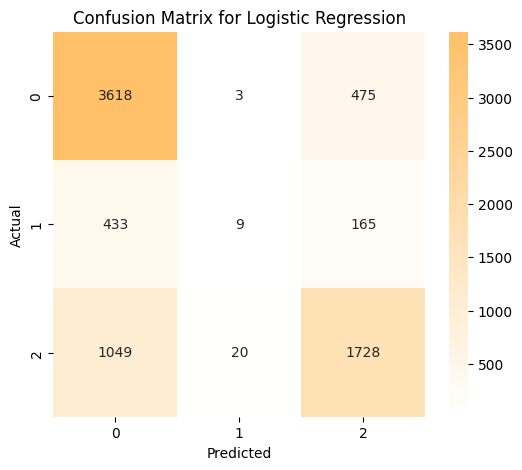

Test Accuracy: 71.40%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.79      4096
           1       0.28      0.01      0.03       607
           2       0.73      0.62      0.67      2797

    accuracy                           0.71      7500
   macro avg       0.57      0.51      0.49      7500
weighted avg       0.68      0.71      0.68      7500


Average Metrics:
Average Sensitivity (Recall): 0.5053
Average Specificity: 0.8084
Average False Positive Rate (FPR): 0.1916
Average False Negative Rate (FNR): 0.4947

Additional Metrics:
Hamming Loss: 0.2860
Cohen's Kappa Score: 0.4398
Matthews Correlation Coefficient (MCC): 0.4550

----- Decision Tree -----


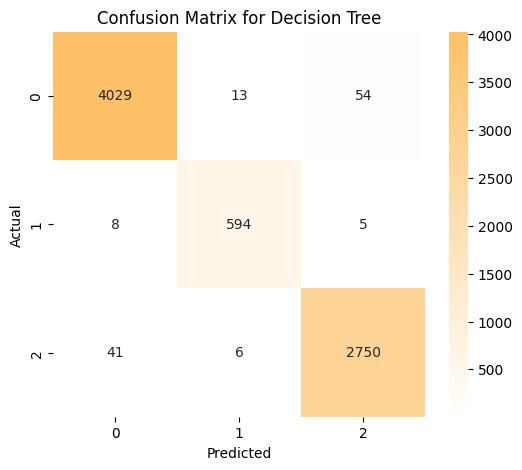

Test Accuracy: 98.31%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4096
           1       0.97      0.98      0.97       607
           2       0.98      0.98      0.98      2797

    accuracy                           0.98      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500


Average Metrics:
Average Sensitivity (Recall): 0.9818
Average Specificity: 0.9901
Average False Positive Rate (FPR): 0.0099
Average False Negative Rate (FNR): 0.0182

Additional Metrics:
Hamming Loss: 0.0169
Cohen's Kappa Score: 0.9696
Matthews Correlation Coefficient (MCC): 0.9696

----- Random Forest -----


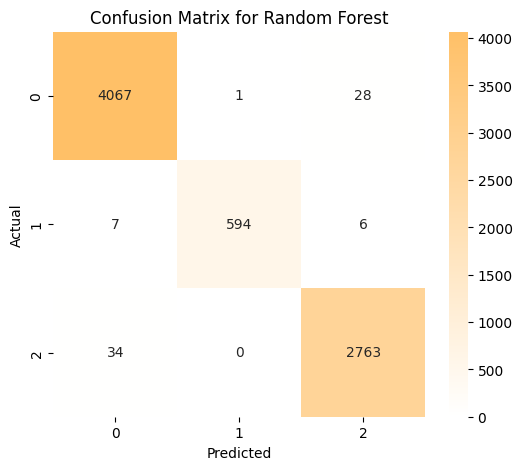

Test Accuracy: 98.99%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4096
           1       1.00      0.98      0.99       607
           2       0.99      0.99      0.99      2797

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500


Average Metrics:
Average Sensitivity (Recall): 0.9864
Average Specificity: 0.9935
Average False Positive Rate (FPR): 0.0065
Average False Negative Rate (FNR): 0.0136

Additional Metrics:
Hamming Loss: 0.0101
Cohen's Kappa Score: 0.9818
Matthews Correlation Coefficient (MCC): 0.9818

----- SVM -----


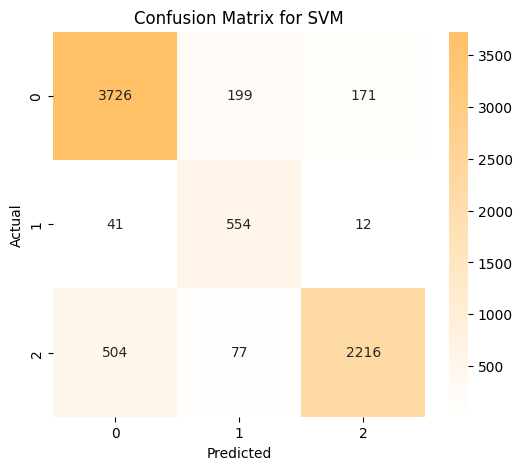

Test Accuracy: 86.61%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4096
           1       0.67      0.91      0.77       607
           2       0.92      0.79      0.85      2797

    accuracy                           0.87      7500
   macro avg       0.82      0.87      0.84      7500
weighted avg       0.87      0.87      0.87      7500


Average Metrics:
Average Sensitivity (Recall): 0.8715
Average Specificity: 0.9203
Average False Positive Rate (FPR): 0.0797
Average False Negative Rate (FNR): 0.1285

Additional Metrics:
Hamming Loss: 0.1339
Cohen's Kappa Score: 0.7613
Matthews Correlation Coefficient (MCC): 0.7642

----- Naive Bayes -----


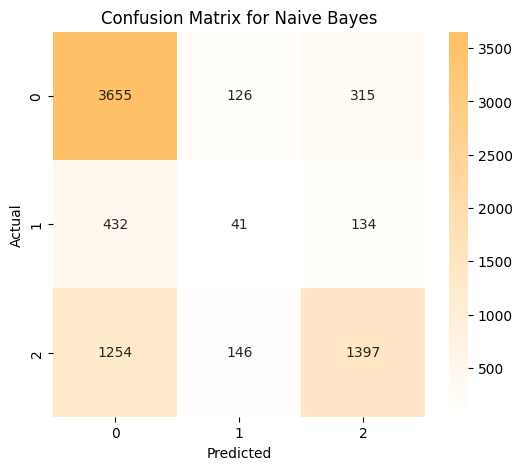

Test Accuracy: 67.91%

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.89      0.77      4096
           1       0.13      0.07      0.09       607
           2       0.76      0.50      0.60      2797

    accuracy                           0.68      7500
   macro avg       0.52      0.49      0.49      7500
weighted avg       0.67      0.68      0.65      7500


Average Metrics:
Average Sensitivity (Recall): 0.4864
Average Specificity: 0.7899
Average False Positive Rate (FPR): 0.2101
Average False Negative Rate (FNR): 0.5136

Additional Metrics:
Hamming Loss: 0.3209
Cohen's Kappa Score: 0.3779
Matthews Correlation Coefficient (MCC): 0.3985

----- Gradient Boosting -----


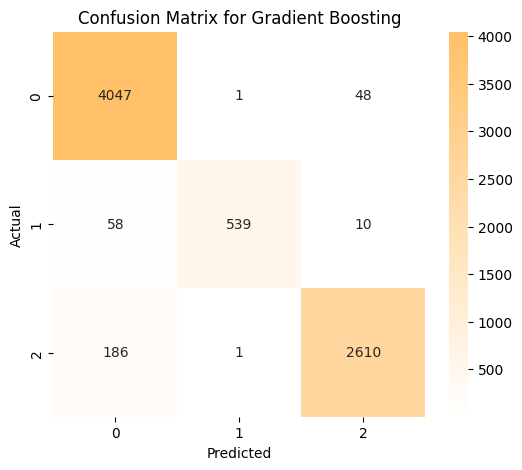

Test Accuracy: 95.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4096
           1       1.00      0.89      0.94       607
           2       0.98      0.93      0.96      2797

    accuracy                           0.96      7500
   macro avg       0.97      0.94      0.95      7500
weighted avg       0.96      0.96      0.96      7500


Average Metrics:
Average Sensitivity (Recall): 0.9364
Average Specificity: 0.9719
Average False Positive Rate (FPR): 0.0281
Average False Negative Rate (FNR): 0.0636

Additional Metrics:
Hamming Loss: 0.0405
Cohen's Kappa Score: 0.9262
Matthews Correlation Coefficient (MCC): 0.9271

----- AdaBoost -----


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


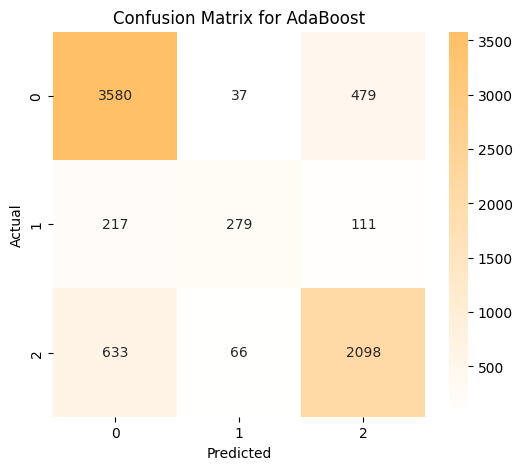

Test Accuracy: 79.43%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      4096
           1       0.73      0.46      0.56       607
           2       0.78      0.75      0.76      2797

    accuracy                           0.79      7500
   macro avg       0.77      0.69      0.72      7500
weighted avg       0.79      0.79      0.79      7500


Average Metrics:
Average Sensitivity (Recall): 0.6946
Average Specificity: 0.8700
Average False Positive Rate (FPR): 0.1300
Average False Negative Rate (FNR): 0.3054

Additional Metrics:
Hamming Loss: 0.2057
Cohen's Kappa Score: 0.6188
Matthews Correlation Coefficient (MCC): 0.6209

----- KNN -----


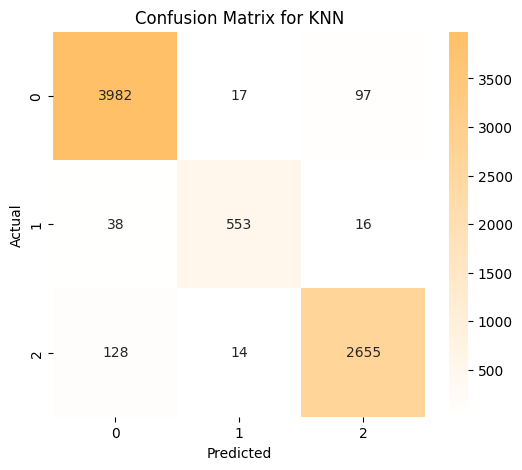

Test Accuracy: 95.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4096
           1       0.95      0.91      0.93       607
           2       0.96      0.95      0.95      2797

    accuracy                           0.96      7500
   macro avg       0.96      0.94      0.95      7500
weighted avg       0.96      0.96      0.96      7500


Average Metrics:
Average Sensitivity (Recall): 0.9441
Average Specificity: 0.9742
Average False Positive Rate (FPR): 0.0258
Average False Negative Rate (FNR): 0.0559

Additional Metrics:
Hamming Loss: 0.0413
Cohen's Kappa Score: 0.9254
Matthews Correlation Coefficient (MCC): 0.9255


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.feature_selection import RFE
from matplotlib.colors import LinearSegmentedColormap

# Import necessary libraries for scaling
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/liver_cirrhosis.csv')

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply RFE (Recursive Feature Elimination) to reduce the number of features
rfe_model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rfe_model, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Create a custom colormap using #FFC067 color code
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#FFC067"])

# Initialize the models including KNN
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),  # Adjust class weights for SVM
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier()  # Add KNN model
}

# Function to calculate average sensitivity, specificity, FPR, and FNR from confusion matrix
def calculate_avg_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Import additional metrics
from sklearn.metrics import hamming_loss, cohen_kappa_score, matthews_corrcoef

# Evaluate each model
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")

    # Train the model on the RFE-selected features
    model.fit(X_train_rfe, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_rfe)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate average metrics
    metrics = calculate_avg_metrics(conf_matrix)

    # Additional Metrics: Hamming Loss, Kappa Score, MCC
    h_loss = hamming_loss(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Output the results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {metrics['avg_FNR']:.4f}")

    # Print Hamming Loss, Kappa Score, and MCC
    print("\nAdditional Metrics:")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


#RFE with balance


----- Logistic Regression -----


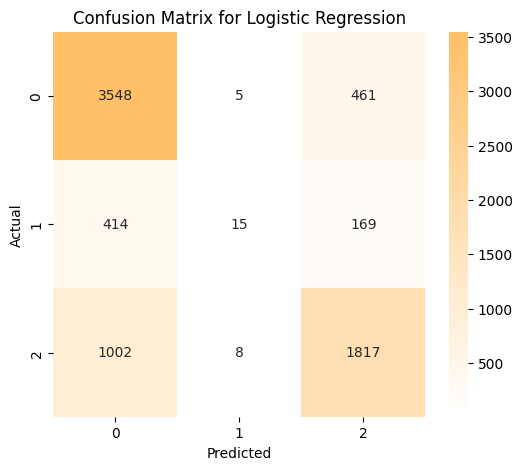

Test Accuracy: 72.32%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.79      4014
           1       0.54      0.03      0.05       598
           2       0.74      0.64      0.69      2827

    accuracy                           0.72      7439
   macro avg       0.66      0.52      0.51      7439
weighted avg       0.71      0.72      0.69      7439


Average Metrics:
Average Sensitivity (Recall): 0.5172
Average Specificity: 0.8160
Average False Positive Rate (FPR): 0.1840
Average False Negative Rate (FNR): 0.4828

Additional Metrics:
Hamming Loss: 0.2768
Cohen's Kappa Score: 0.4622
Matthews Correlation Coefficient (MCC): 0.4765

----- Decision Tree -----


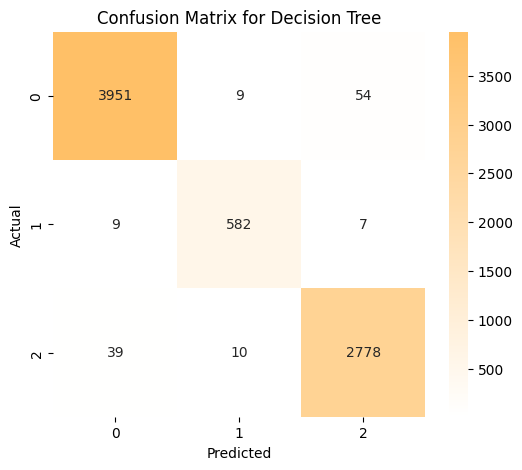

Test Accuracy: 98.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4014
           1       0.97      0.97      0.97       598
           2       0.98      0.98      0.98      2827

    accuracy                           0.98      7439
   macro avg       0.98      0.98      0.98      7439
weighted avg       0.98      0.98      0.98      7439


Average Metrics:
Average Sensitivity (Recall): 0.9801
Average Specificity: 0.9900
Average False Positive Rate (FPR): 0.0100
Average False Negative Rate (FNR): 0.0199

Additional Metrics:
Hamming Loss: 0.0172
Cohen's Kappa Score: 0.9692
Matthews Correlation Coefficient (MCC): 0.9692

----- Random Forest -----


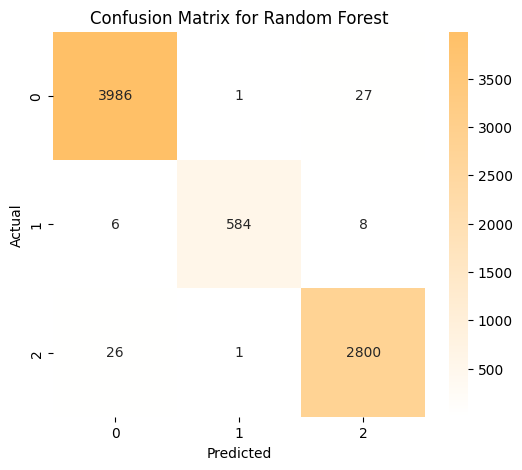

Test Accuracy: 99.07%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4014
           1       1.00      0.98      0.99       598
           2       0.99      0.99      0.99      2827

    accuracy                           0.99      7439
   macro avg       0.99      0.99      0.99      7439
weighted avg       0.99      0.99      0.99      7439


Average Metrics:
Average Sensitivity (Recall): 0.9867
Average Specificity: 0.9943
Average False Positive Rate (FPR): 0.0057
Average False Negative Rate (FNR): 0.0133

Additional Metrics:
Hamming Loss: 0.0093
Cohen's Kappa Score: 0.9834
Matthews Correlation Coefficient (MCC): 0.9834

----- SVM -----


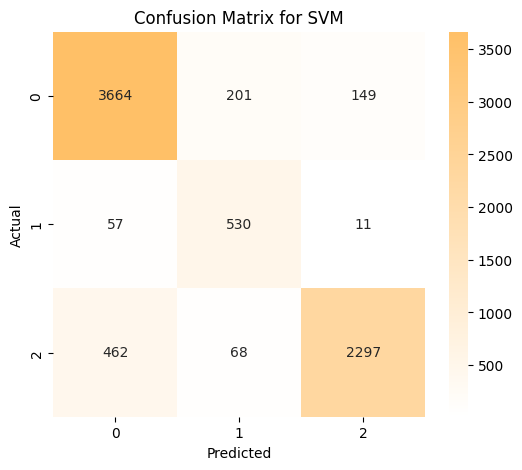

Test Accuracy: 87.26%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4014
           1       0.66      0.89      0.76       598
           2       0.93      0.81      0.87      2827

    accuracy                           0.87      7439
   macro avg       0.82      0.87      0.84      7439
weighted avg       0.88      0.87      0.87      7439


Average Metrics:
Average Sensitivity (Recall): 0.8705
Average Specificity: 0.9248
Average False Positive Rate (FPR): 0.0752
Average False Negative Rate (FNR): 0.1295

Additional Metrics:
Hamming Loss: 0.1274
Cohen's Kappa Score: 0.7734
Matthews Correlation Coefficient (MCC): 0.7760

----- Naive Bayes -----


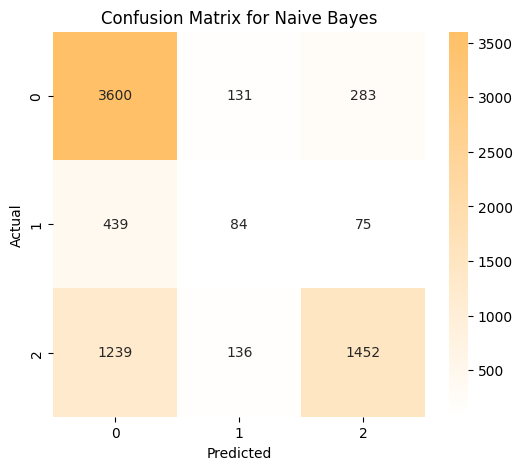

Test Accuracy: 69.04%

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.90      0.77      4014
           1       0.24      0.14      0.18       598
           2       0.80      0.51      0.63      2827

    accuracy                           0.69      7439
   macro avg       0.57      0.52      0.53      7439
weighted avg       0.69      0.69      0.67      7439


Average Metrics:
Average Sensitivity (Recall): 0.5170
Average Specificity: 0.7978
Average False Positive Rate (FPR): 0.2022
Average False Negative Rate (FNR): 0.4830

Additional Metrics:
Hamming Loss: 0.3096
Cohen's Kappa Score: 0.4057
Matthews Correlation Coefficient (MCC): 0.4288

----- Gradient Boosting -----


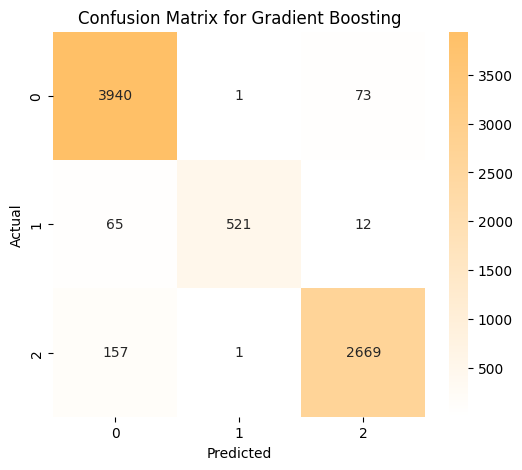

Test Accuracy: 95.85%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4014
           1       1.00      0.87      0.93       598
           2       0.97      0.94      0.96      2827

    accuracy                           0.96      7439
   macro avg       0.97      0.93      0.95      7439
weighted avg       0.96      0.96      0.96      7439


Average Metrics:
Average Sensitivity (Recall): 0.9323
Average Specificity: 0.9722
Average False Positive Rate (FPR): 0.0278
Average False Negative Rate (FNR): 0.0677

Additional Metrics:
Hamming Loss: 0.0415
Cohen's Kappa Score: 0.9247
Matthews Correlation Coefficient (MCC): 0.9253

----- AdaBoost -----


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


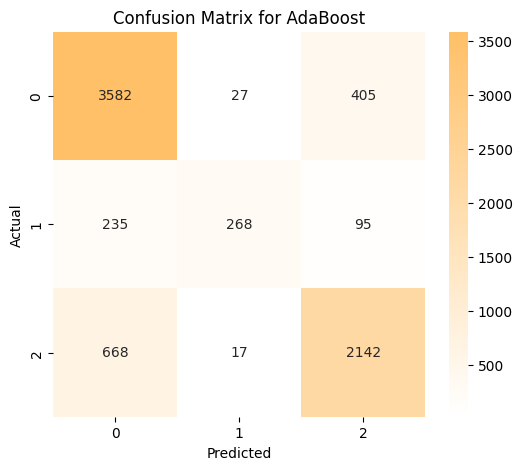

Test Accuracy: 80.55%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      4014
           1       0.86      0.45      0.59       598
           2       0.81      0.76      0.78      2827

    accuracy                           0.81      7439
   macro avg       0.82      0.70      0.74      7439
weighted avg       0.81      0.81      0.80      7439


Average Metrics:
Average Sensitivity (Recall): 0.6994
Average Specificity: 0.8738
Average False Positive Rate (FPR): 0.1262
Average False Negative Rate (FNR): 0.3006

Additional Metrics:
Hamming Loss: 0.1945
Cohen's Kappa Score: 0.6373
Matthews Correlation Coefficient (MCC): 0.6417

----- KNN -----


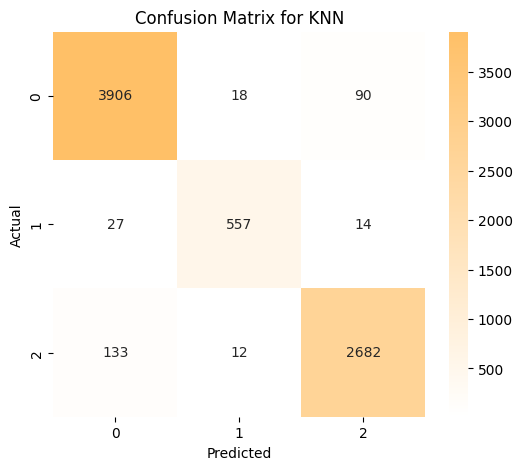

Test Accuracy: 96.05%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4014
           1       0.95      0.93      0.94       598
           2       0.96      0.95      0.96      2827

    accuracy                           0.96      7439
   macro avg       0.96      0.95      0.95      7439
weighted avg       0.96      0.96      0.96      7439


Average Metrics:
Average Sensitivity (Recall): 0.9511
Average Specificity: 0.9754
Average False Positive Rate (FPR): 0.0246
Average False Negative Rate (FNR): 0.0489

Additional Metrics:
Hamming Loss: 0.0395
Cohen's Kappa Score: 0.9290
Matthews Correlation Coefficient (MCC): 0.9290


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.feature_selection import RFE
from matplotlib.colors import LinearSegmentedColormap

# Import necessary libraries for scaling
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = balanced_data

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply RFE (Recursive Feature Elimination) to reduce the number of features
rfe_model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rfe_model, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Create a custom colormap using #FFC067 color code
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#FFC067"])

# Initialize the models including KNN
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),  # Adjust class weights for SVM
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier()  # Add KNN model
}

# Function to calculate average sensitivity, specificity, FPR, and FNR from confusion matrix
def calculate_avg_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Import additional metrics
from sklearn.metrics import hamming_loss, cohen_kappa_score, matthews_corrcoef

# Evaluate each model
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")

    # Train the model on the RFE-selected features
    model.fit(X_train_rfe, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_rfe)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate average metrics
    metrics = calculate_avg_metrics(conf_matrix)

    # Additional Metrics: Hamming Loss, Kappa Score, MCC
    h_loss = hamming_loss(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Output the results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {metrics['avg_FNR']:.4f}")

    # Print Hamming Loss, Kappa Score, and MCC
    print("\nAdditional Metrics:")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


#LASSO Feature without balance

Selected features by LASSO:
Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

----- Logistic Regression -----


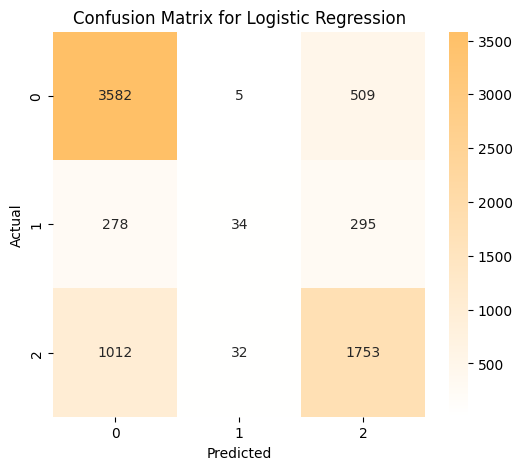

Test Accuracy: 71.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      4096
           1       0.48      0.06      0.10       607
           2       0.69      0.63      0.65      2797

    accuracy                           0.72      7500
   macro avg       0.63      0.52      0.52      7500
weighted avg       0.70      0.72      0.69      7500


Average Metrics:
Average Sensitivity (Recall): 0.5191
Average Specificity: 0.8149
Average False Positive Rate (FPR): 0.1851
Average False Negative Rate (FNR): 0.4809

Additional Metrics:
Hamming Loss: 0.2841
Cohen's Kappa Score: 0.4508
Matthews Correlation Coefficient (MCC): 0.4602

----- Decision Tree -----


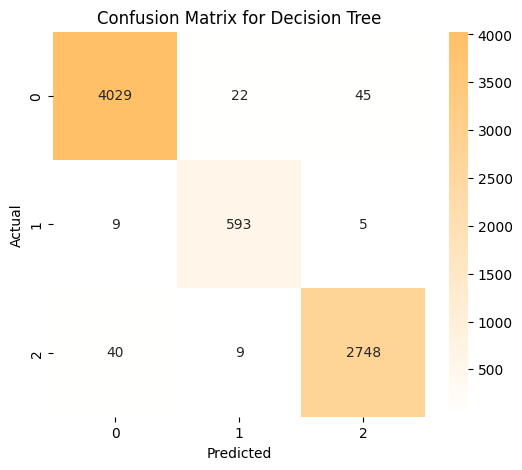

Test Accuracy: 98.27%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4096
           1       0.95      0.98      0.96       607
           2       0.98      0.98      0.98      2797

    accuracy                           0.98      7500
   macro avg       0.97      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500


Average Metrics:
Average Sensitivity (Recall): 0.9810
Average Specificity: 0.9902
Average False Positive Rate (FPR): 0.0098
Average False Negative Rate (FNR): 0.0190

Additional Metrics:
Hamming Loss: 0.0173
Cohen's Kappa Score: 0.9689
Matthews Correlation Coefficient (MCC): 0.9689

----- Random Forest -----


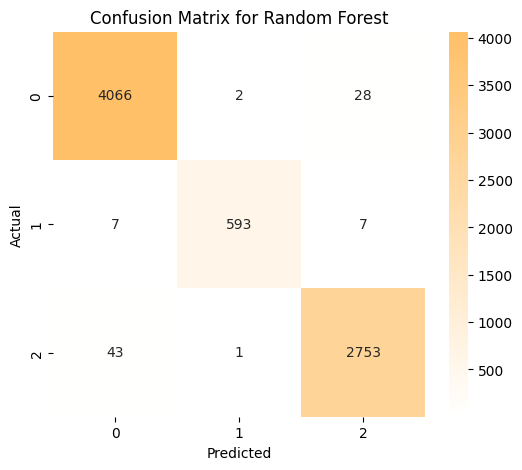

Test Accuracy: 98.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4096
           1       0.99      0.98      0.99       607
           2       0.99      0.98      0.99      2797

    accuracy                           0.99      7500
   macro avg       0.99      0.98      0.99      7500
weighted avg       0.99      0.99      0.99      7500


Average Metrics:
Average Sensitivity (Recall): 0.9846
Average Specificity: 0.9925
Average False Positive Rate (FPR): 0.0075
Average False Negative Rate (FNR): 0.0154

Additional Metrics:
Hamming Loss: 0.0117
Cohen's Kappa Score: 0.9789
Matthews Correlation Coefficient (MCC): 0.9789

----- SVM -----


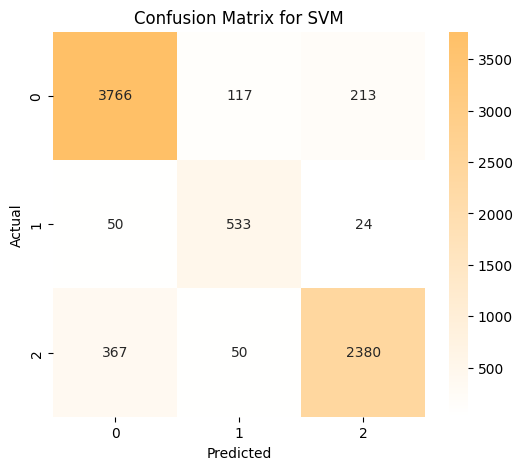

Test Accuracy: 89.05%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4096
           1       0.76      0.88      0.82       607
           2       0.91      0.85      0.88      2797

    accuracy                           0.89      7500
   macro avg       0.86      0.88      0.87      7500
weighted avg       0.89      0.89      0.89      7500


Average Metrics:
Average Sensitivity (Recall): 0.8828
Average Specificity: 0.9343
Average False Positive Rate (FPR): 0.0657
Average False Negative Rate (FNR): 0.1172

Additional Metrics:
Hamming Loss: 0.1095
Cohen's Kappa Score: 0.8037
Matthews Correlation Coefficient (MCC): 0.8043

----- Naive Bayes -----


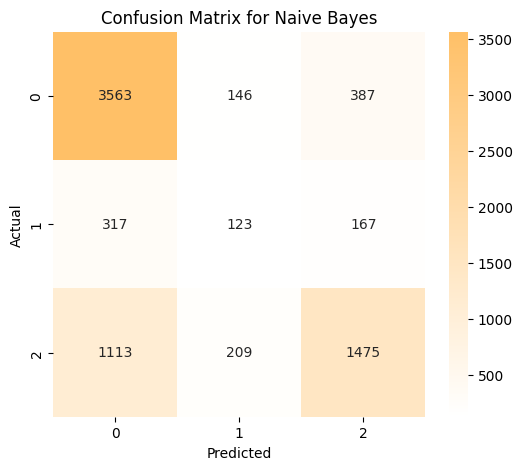

Test Accuracy: 68.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      4096
           1       0.26      0.20      0.23       607
           2       0.73      0.53      0.61      2797

    accuracy                           0.69      7500
   macro avg       0.57      0.53      0.54      7500
weighted avg       0.68      0.69      0.67      7500


Average Metrics:
Average Sensitivity (Recall): 0.5333
Average Specificity: 0.8035
Average False Positive Rate (FPR): 0.1965
Average False Negative Rate (FNR): 0.4667

Additional Metrics:
Hamming Loss: 0.3119
Cohen's Kappa Score: 0.4120
Matthews Correlation Coefficient (MCC): 0.4231

----- Gradient Boosting -----


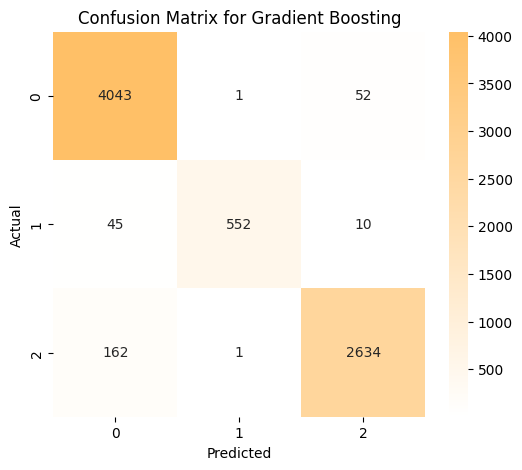

Test Accuracy: 96.39%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4096
           1       1.00      0.91      0.95       607
           2       0.98      0.94      0.96      2797

    accuracy                           0.96      7500
   macro avg       0.97      0.95      0.96      7500
weighted avg       0.96      0.96      0.96      7500


Average Metrics:
Average Sensitivity (Recall): 0.9461
Average Specificity: 0.9752
Average False Positive Rate (FPR): 0.0248
Average False Negative Rate (FNR): 0.0539

Additional Metrics:
Hamming Loss: 0.0361
Cohen's Kappa Score: 0.9344
Matthews Correlation Coefficient (MCC): 0.9350

----- AdaBoost -----


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


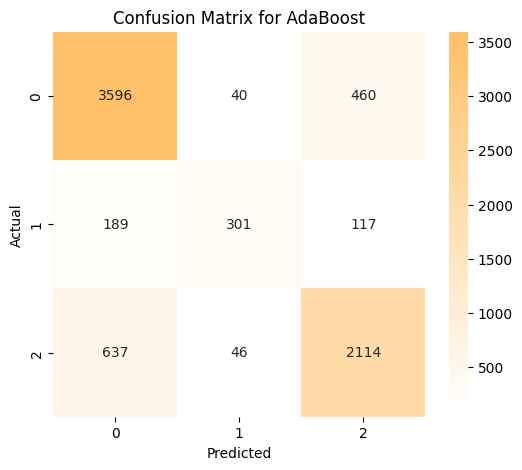

Test Accuracy: 80.15%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      4096
           1       0.78      0.50      0.61       607
           2       0.79      0.76      0.77      2797

    accuracy                           0.80      7500
   macro avg       0.79      0.71      0.74      7500
weighted avg       0.80      0.80      0.80      7500


Average Metrics:
Average Sensitivity (Recall): 0.7099
Average Specificity: 0.8741
Average False Positive Rate (FPR): 0.1259
Average False Negative Rate (FNR): 0.2901

Additional Metrics:
Hamming Loss: 0.1985
Cohen's Kappa Score: 0.6324
Matthews Correlation Coefficient (MCC): 0.6344

----- KNN -----


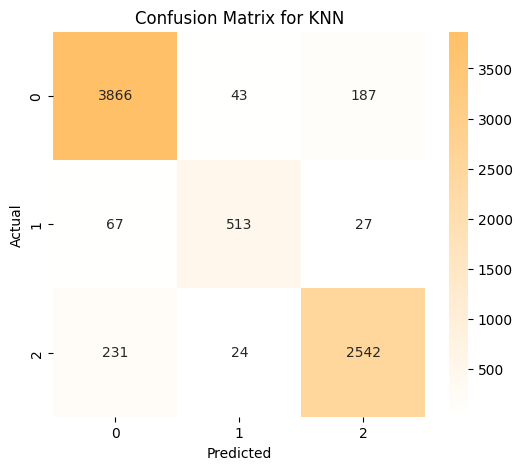

Test Accuracy: 92.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4096
           1       0.88      0.85      0.86       607
           2       0.92      0.91      0.92      2797

    accuracy                           0.92      7500
   macro avg       0.91      0.90      0.91      7500
weighted avg       0.92      0.92      0.92      7500


Average Metrics:
Average Sensitivity (Recall): 0.8993
Average Specificity: 0.9524
Average False Positive Rate (FPR): 0.0476
Average False Negative Rate (FNR): 0.1007

Additional Metrics:
Hamming Loss: 0.0772
Cohen's Kappa Score: 0.8605
Matthews Correlation Coefficient (MCC): 0.8606


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Load the dataset
data = pd.read_csv('/content/liver_cirrhosis.csv')

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LASSO for feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

# Get the mask of selected features (non-zero coefficients)
lasso_selected_features = lasso.coef_ != 0
selected_feature_names = X.columns[lasso_selected_features]

# Print selected features
print("Selected features by LASSO:")
print(selected_feature_names)

# Reduce the dataset to the selected features
X_selected = X_scaled[:, lasso_selected_features]

# Train-test split with selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize the models including KNN
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),  # Adjust class weights for SVM
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier()  # Add KNN model
}

# Create a custom colormap using #FFC067 color code
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#FFC067"])

# Function to calculate average sensitivity, specificity, FPR, and FNR from confusion matrix
def calculate_avg_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Import additional metrics
from sklearn.metrics import hamming_loss, cohen_kappa_score, matthews_corrcoef

# Evaluate each model
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")

    # Train the model on the LASSO-selected features
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate average metrics
    metrics = calculate_avg_metrics(conf_matrix)

    # Additional Metrics: Hamming Loss, Kappa Score, MCC
    h_loss = hamming_loss(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Output the results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {metrics['avg_FNR']:.4f}")

    # Print Hamming Loss, Kappa Score, and MCC
    print("\nAdditional Metrics:")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


In [ ]:
# Apply LASSO for feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

# Get the mask of selected features (non-zero coefficients)
lasso_selected_features = lasso.coef_ != 0
selected_feature_names = X.columns[lasso_selected_features]

# Print selected features
print("Selected features by LASSO:")
print(selected_feature_names)


Selected features by LASSO:
Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')


#LASSO feature with balance

Selected features by LASSO:
Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

----- Logistic Regression -----


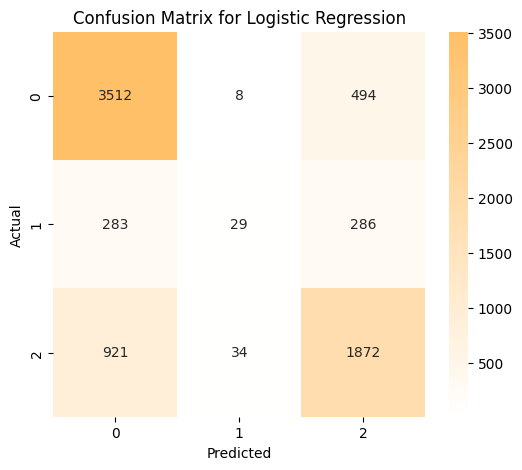

Test Accuracy: 72.77%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      4014
           1       0.41      0.05      0.09       598
           2       0.71      0.66      0.68      2827

    accuracy                           0.73      7439
   macro avg       0.62      0.53      0.52      7439
weighted avg       0.70      0.73      0.70      7439


Average Metrics:
Average Sensitivity (Recall): 0.5285
Average Specificity: 0.8244
Average False Positive Rate (FPR): 0.1756
Average False Negative Rate (FNR): 0.4715

Additional Metrics:
Hamming Loss: 0.2723
Cohen's Kappa Score: 0.4779
Matthews Correlation Coefficient (MCC): 0.4864

----- Decision Tree -----


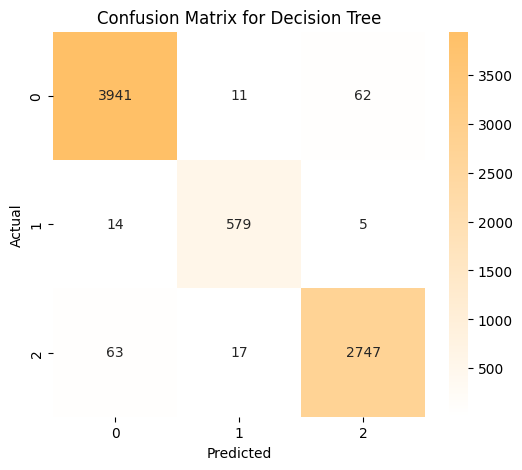

Test Accuracy: 97.69%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4014
           1       0.95      0.97      0.96       598
           2       0.98      0.97      0.97      2827

    accuracy                           0.98      7439
   macro avg       0.97      0.97      0.97      7439
weighted avg       0.98      0.98      0.98      7439


Average Metrics:
Average Sensitivity (Recall): 0.9739
Average Specificity: 0.9863
Average False Positive Rate (FPR): 0.0137
Average False Negative Rate (FNR): 0.0261

Additional Metrics:
Hamming Loss: 0.0231
Cohen's Kappa Score: 0.9586
Matthews Correlation Coefficient (MCC): 0.9586

----- Random Forest -----


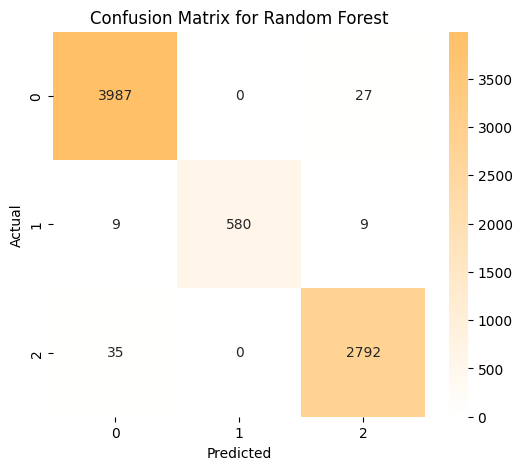

Test Accuracy: 98.92%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4014
           1       1.00      0.97      0.98       598
           2       0.99      0.99      0.99      2827

    accuracy                           0.99      7439
   macro avg       0.99      0.98      0.99      7439
weighted avg       0.99      0.99      0.99      7439


Average Metrics:
Average Sensitivity (Recall): 0.9836
Average Specificity: 0.9931
Average False Positive Rate (FPR): 0.0069
Average False Negative Rate (FNR): 0.0164

Additional Metrics:
Hamming Loss: 0.0108
Cohen's Kappa Score: 0.9807
Matthews Correlation Coefficient (MCC): 0.9807

----- SVM -----


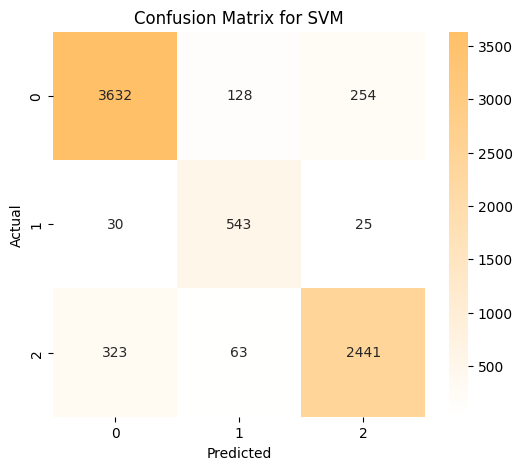

Test Accuracy: 88.94%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      4014
           1       0.74      0.91      0.82       598
           2       0.90      0.86      0.88      2827

    accuracy                           0.89      7439
   macro avg       0.85      0.89      0.87      7439
weighted avg       0.89      0.89      0.89      7439


Average Metrics:
Average Sensitivity (Recall): 0.8921
Average Specificity: 0.9362
Average False Positive Rate (FPR): 0.0638
Average False Negative Rate (FNR): 0.1079

Additional Metrics:
Hamming Loss: 0.1106
Cohen's Kappa Score: 0.8039
Matthews Correlation Coefficient (MCC): 0.8043

----- Naive Bayes -----


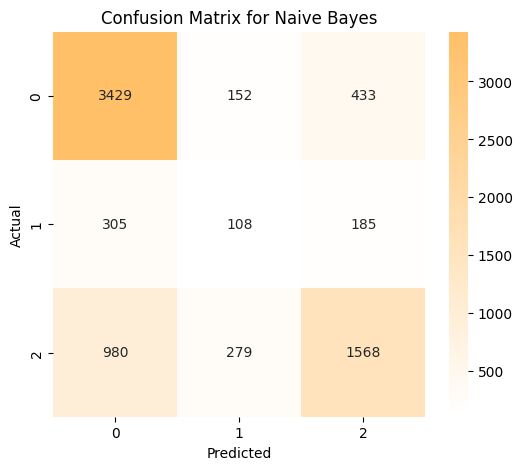

Test Accuracy: 68.62%

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      4014
           1       0.20      0.18      0.19       598
           2       0.72      0.55      0.63      2827

    accuracy                           0.69      7439
   macro avg       0.55      0.53      0.53      7439
weighted avg       0.68      0.69      0.68      7439


Average Metrics:
Average Sensitivity (Recall): 0.5298
Average Specificity: 0.8093
Average False Positive Rate (FPR): 0.1907
Average False Negative Rate (FNR): 0.4702

Additional Metrics:
Hamming Loss: 0.3138
Cohen's Kappa Score: 0.4196
Matthews Correlation Coefficient (MCC): 0.4265

----- Gradient Boosting -----


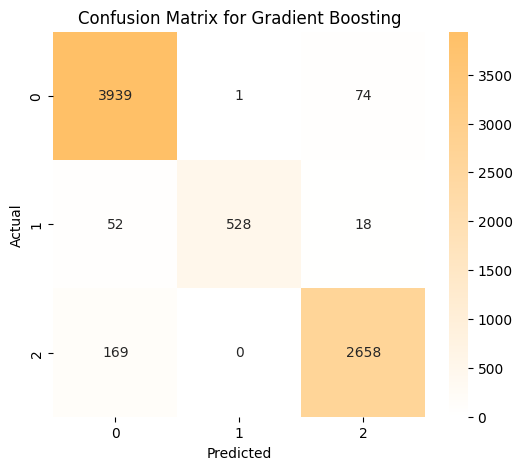

Test Accuracy: 95.78%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4014
           1       1.00      0.88      0.94       598
           2       0.97      0.94      0.95      2827

    accuracy                           0.96      7439
   macro avg       0.97      0.93      0.95      7439
weighted avg       0.96      0.96      0.96      7439


Average Metrics:
Average Sensitivity (Recall): 0.9348
Average Specificity: 0.9718
Average False Positive Rate (FPR): 0.0282
Average False Negative Rate (FNR): 0.0652

Additional Metrics:
Hamming Loss: 0.0422
Cohen's Kappa Score: 0.9235
Matthews Correlation Coefficient (MCC): 0.9241

----- AdaBoost -----


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


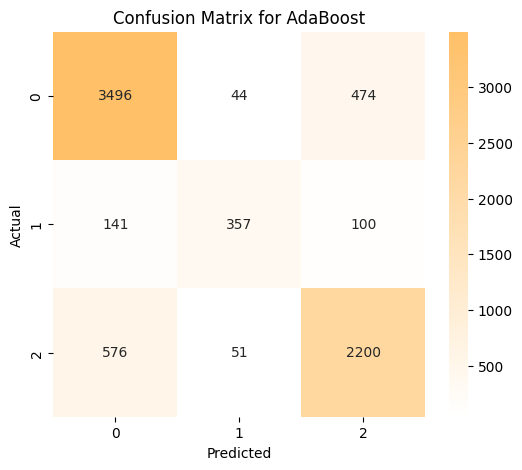

Test Accuracy: 81.37%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4014
           1       0.79      0.60      0.68       598
           2       0.79      0.78      0.79      2827

    accuracy                           0.81      7439
   macro avg       0.80      0.75      0.77      7439
weighted avg       0.81      0.81      0.81      7439


Average Metrics:
Average Sensitivity (Recall): 0.7487
Average Specificity: 0.8841
Average False Positive Rate (FPR): 0.1159
Average False Negative Rate (FNR): 0.2513

Additional Metrics:
Hamming Loss: 0.1863
Cohen's Kappa Score: 0.6599
Matthews Correlation Coefficient (MCC): 0.6607

----- KNN -----


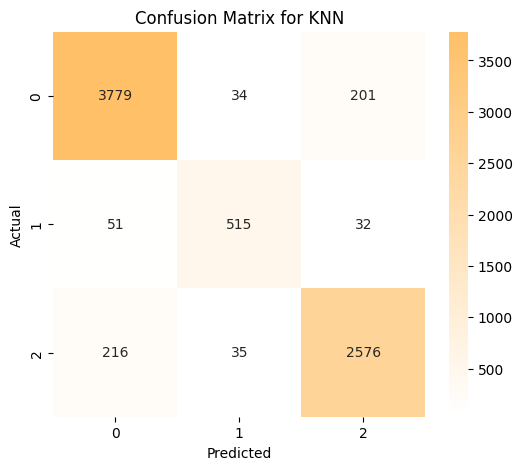

Test Accuracy: 92.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4014
           1       0.88      0.86      0.87       598
           2       0.92      0.91      0.91      2827

    accuracy                           0.92      7439
   macro avg       0.91      0.90      0.91      7439
weighted avg       0.92      0.92      0.92      7439


Average Metrics:
Average Sensitivity (Recall): 0.9046
Average Specificity: 0.9538
Average False Positive Rate (FPR): 0.0462
Average False Negative Rate (FNR): 0.0954

Additional Metrics:
Hamming Loss: 0.0765
Cohen's Kappa Score: 0.8626
Matthews Correlation Coefficient (MCC): 0.8626


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Load the dataset
data = balanced_data

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LASSO for feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

# Get the mask of selected features (non-zero coefficients)
lasso_selected_features = lasso.coef_ != 0
selected_feature_names = X.columns[lasso_selected_features]

# Print selected features
print("Selected features by LASSO:")
print(selected_feature_names)

# Reduce the dataset to the selected features
X_selected = X_scaled[:, lasso_selected_features]

# Train-test split with selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize the models including KNN
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),  # Adjust class weights for SVM
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier()  # Add KNN model
}

# Create a custom colormap using #FFC067 color code
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#FFC067"])

# Function to calculate average sensitivity, specificity, FPR, and FNR from confusion matrix
def calculate_avg_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Import additional metrics
from sklearn.metrics import hamming_loss, cohen_kappa_score, matthews_corrcoef

# Evaluate each model
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")

    # Train the model on the LASSO-selected features
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate average metrics
    metrics = calculate_avg_metrics(conf_matrix)

    # Additional Metrics: Hamming Loss, Kappa Score, MCC
    h_loss = hamming_loss(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Output the results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {metrics['avg_FNR']:.4f}")

    # Print Hamming Loss, Kappa Score, and MCC
    print("\nAdditional Metrics:")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


#Chi Square without balance


----- Logistic Regression -----


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


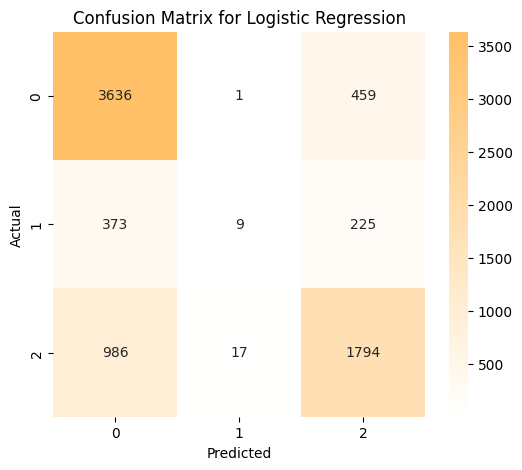

Test Accuracy: 72.52%

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      4096
           1       0.33      0.01      0.03       607
           2       0.72      0.64      0.68      2797

    accuracy                           0.73      7500
   macro avg       0.60      0.51      0.50      7500
weighted avg       0.69      0.73      0.69      7500


Average Metrics:
Average Sensitivity (Recall): 0.5146
Average Specificity: 0.8176
Average False Positive Rate (FPR): 0.1824
Average False Negative Rate (FNR): 0.4854

Additional Metrics:
Hamming Loss: 0.2748
Cohen's Kappa Score: 0.4641
Matthews Correlation Coefficient (MCC): 0.4771

----- Decision Tree -----


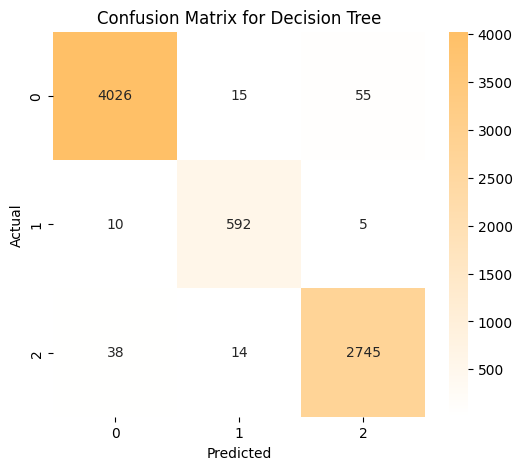

Test Accuracy: 98.17%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4096
           1       0.95      0.98      0.96       607
           2       0.98      0.98      0.98      2797

    accuracy                           0.98      7500
   macro avg       0.97      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500


Average Metrics:
Average Sensitivity (Recall): 0.9799
Average Specificity: 0.9896
Average False Positive Rate (FPR): 0.0104
Average False Negative Rate (FNR): 0.0201

Additional Metrics:
Hamming Loss: 0.0183
Cohen's Kappa Score: 0.9672
Matthews Correlation Coefficient (MCC): 0.9672

----- Random Forest -----


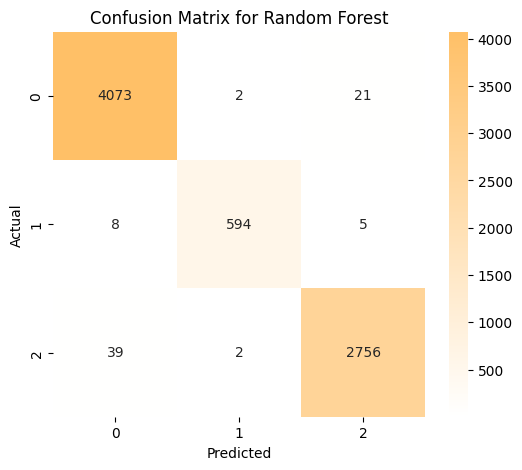

Test Accuracy: 98.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4096
           1       0.99      0.98      0.99       607
           2       0.99      0.99      0.99      2797

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500


Average Metrics:
Average Sensitivity (Recall): 0.9861
Average Specificity: 0.9934
Average False Positive Rate (FPR): 0.0066
Average False Negative Rate (FNR): 0.0139

Additional Metrics:
Hamming Loss: 0.0103
Cohen's Kappa Score: 0.9815
Matthews Correlation Coefficient (MCC): 0.9815

----- SVM -----


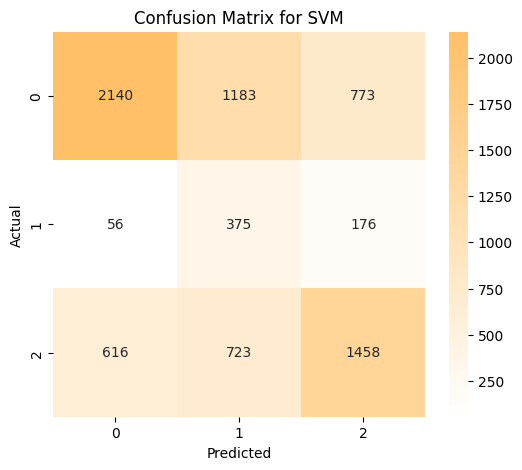

Test Accuracy: 52.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.52      0.62      4096
           1       0.16      0.62      0.26       607
           2       0.61      0.52      0.56      2797

    accuracy                           0.53      7500
   macro avg       0.51      0.55      0.48      7500
weighted avg       0.65      0.53      0.57      7500


Average Metrics:
Average Sensitivity (Recall): 0.5538
Average Specificity: 0.7748
Average False Positive Rate (FPR): 0.2252
Average False Negative Rate (FNR): 0.4462

Additional Metrics:
Hamming Loss: 0.4703
Cohen's Kappa Score: 0.2776
Matthews Correlation Coefficient (MCC): 0.2973

----- Naive Bayes -----


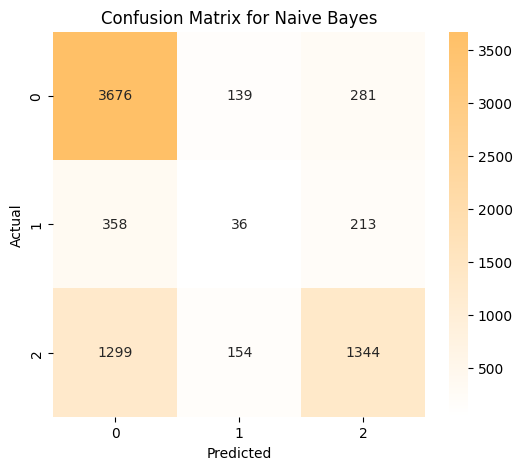

Test Accuracy: 67.41%

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78      4096
           1       0.11      0.06      0.08       607
           2       0.73      0.48      0.58      2797

    accuracy                           0.67      7500
   macro avg       0.51      0.48      0.48      7500
weighted avg       0.66      0.67      0.65      7500


Average Metrics:
Average Sensitivity (Recall): 0.4791
Average Specificity: 0.7886
Average False Positive Rate (FPR): 0.2114
Average False Negative Rate (FNR): 0.5209

Additional Metrics:
Hamming Loss: 0.3259
Cohen's Kappa Score: 0.3694
Matthews Correlation Coefficient (MCC): 0.3892

----- Gradient Boosting -----


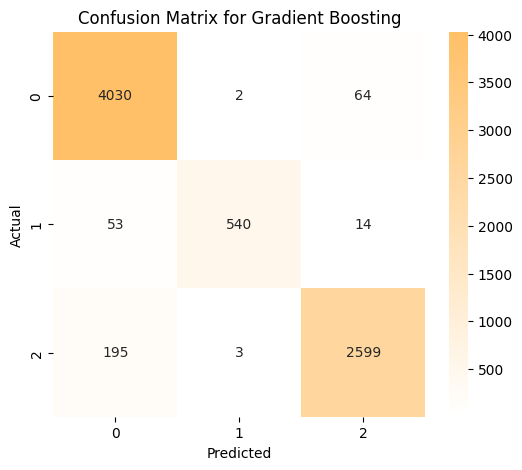

Test Accuracy: 95.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4096
           1       0.99      0.89      0.94       607
           2       0.97      0.93      0.95      2797

    accuracy                           0.96      7500
   macro avg       0.97      0.93      0.95      7500
weighted avg       0.96      0.96      0.96      7500


Average Metrics:
Average Sensitivity (Recall): 0.9342
Average Specificity: 0.9699
Average False Positive Rate (FPR): 0.0301
Average False Negative Rate (FNR): 0.0658

Additional Metrics:
Hamming Loss: 0.0441
Cohen's Kappa Score: 0.9197
Matthews Correlation Coefficient (MCC): 0.9205

----- AdaBoost -----


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


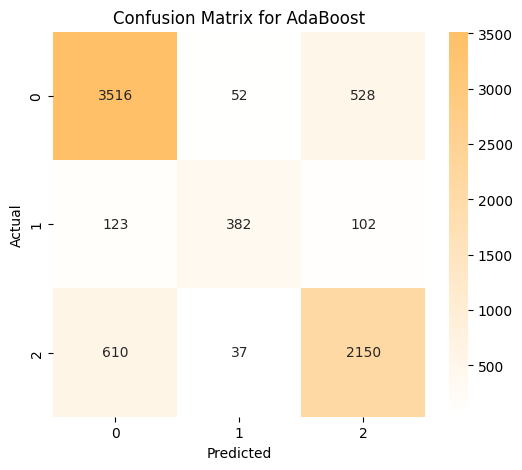

Test Accuracy: 80.64%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      4096
           1       0.81      0.63      0.71       607
           2       0.77      0.77      0.77      2797

    accuracy                           0.81      7500
   macro avg       0.80      0.75      0.77      7500
weighted avg       0.81      0.81      0.81      7500


Average Metrics:
Average Sensitivity (Recall): 0.7521
Average Specificity: 0.8793
Average False Positive Rate (FPR): 0.1207
Average False Negative Rate (FNR): 0.2479

Additional Metrics:
Hamming Loss: 0.1936
Cohen's Kappa Score: 0.6463
Matthews Correlation Coefficient (MCC): 0.6468

----- KNN -----


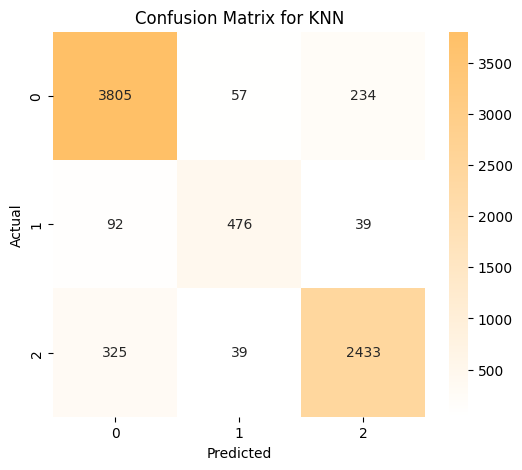

Test Accuracy: 89.52%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4096
           1       0.83      0.78      0.81       607
           2       0.90      0.87      0.88      2797

    accuracy                           0.90      7500
   macro avg       0.88      0.86      0.87      7500
weighted avg       0.89      0.90      0.89      7500


Average Metrics:
Average Sensitivity (Recall): 0.8610
Average Specificity: 0.9352
Average False Positive Rate (FPR): 0.0648
Average False Negative Rate (FNR): 0.1390

Additional Metrics:
Hamming Loss: 0.1048
Cohen's Kappa Score: 0.8101
Matthews Correlation Coefficient (MCC): 0.8104


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.feature_selection import SelectKBest, chi2
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Load the dataset
data = pd.read_csv('/content/liver_cirrhosis.csv')

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Chi-Square feature selection
chi2_selector = SelectKBest(chi2, k=10)  # Select the top 10 features based on Chi-Square test
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Create a custom colormap using #475c6c color code
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#FFC067"])

# Initialize the models including KNN
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),  # SVM with class weight balanced
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier()  # Add KNN model
}

# Function to calculate average sensitivity, specificity, FPR, and FNR from confusion matrix
def calculate_avg_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Import additional metrics
from sklearn.metrics import hamming_loss, cohen_kappa_score, matthews_corrcoef

# Evaluate each model
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")

    # Train the model using the Chi-Square selected features
    model.fit(X_train_chi2, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_chi2)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate average metrics
    avg_metrics = calculate_avg_metrics(conf_matrix)

    # Additional Metrics: Hamming Loss, Kappa Score, MCC
    h_loss = hamming_loss(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Output the results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {avg_metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {avg_metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {avg_metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {avg_metrics['avg_FNR']:.4f}")

    # Print Hamming Loss, Kappa Score, and MCC
    print("\nAdditional Metrics:")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


#Chi Square with balance


----- Logistic Regression -----


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


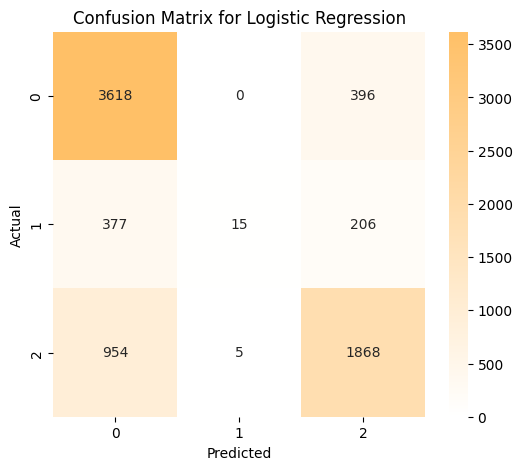

Test Accuracy: 73.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      4014
           1       0.75      0.03      0.05       598
           2       0.76      0.66      0.71      2827

    accuracy                           0.74      7439
   macro avg       0.75      0.53      0.52      7439
weighted avg       0.74      0.74      0.71      7439


Average Metrics:
Average Sensitivity (Recall): 0.5291
Average Specificity: 0.8267
Average False Positive Rate (FPR): 0.1733
Average False Negative Rate (FNR): 0.4709

Additional Metrics:
Hamming Loss: 0.2605
Cohen's Kappa Score: 0.4938
Matthews Correlation Coefficient (MCC): 0.5087

----- Decision Tree -----


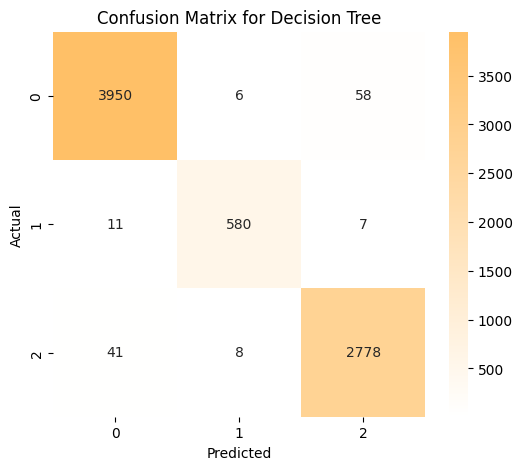

Test Accuracy: 98.24%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4014
           1       0.98      0.97      0.97       598
           2       0.98      0.98      0.98      2827

    accuracy                           0.98      7439
   macro avg       0.98      0.98      0.98      7439
weighted avg       0.98      0.98      0.98      7439


Average Metrics:
Average Sensitivity (Recall): 0.9789
Average Specificity: 0.9896
Average False Positive Rate (FPR): 0.0104
Average False Negative Rate (FNR): 0.0211

Additional Metrics:
Hamming Loss: 0.0176
Cohen's Kappa Score: 0.9684
Matthews Correlation Coefficient (MCC): 0.9685

----- Random Forest -----


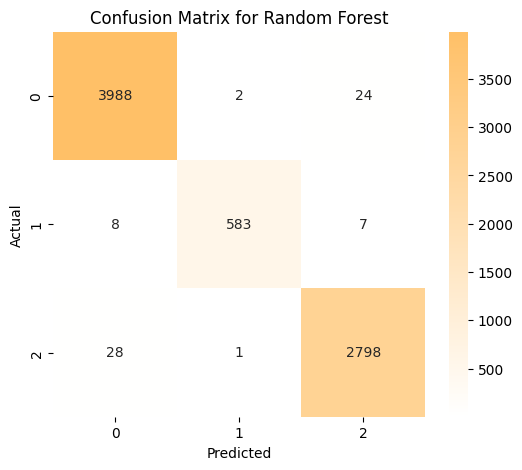

Test Accuracy: 99.06%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4014
           1       0.99      0.97      0.98       598
           2       0.99      0.99      0.99      2827

    accuracy                           0.99      7439
   macro avg       0.99      0.99      0.99      7439
weighted avg       0.99      0.99      0.99      7439


Average Metrics:
Average Sensitivity (Recall): 0.9861
Average Specificity: 0.9941
Average False Positive Rate (FPR): 0.0059
Average False Negative Rate (FNR): 0.0139

Additional Metrics:
Hamming Loss: 0.0094
Cohen's Kappa Score: 0.9831
Matthews Correlation Coefficient (MCC): 0.9831

----- SVM -----


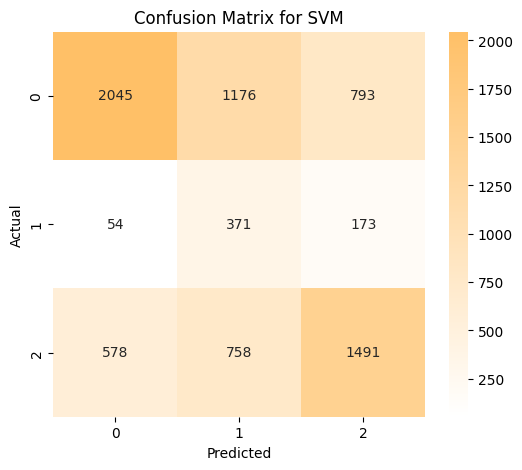

Test Accuracy: 52.52%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.51      0.61      4014
           1       0.16      0.62      0.26       598
           2       0.61      0.53      0.56      2827

    accuracy                           0.53      7439
   macro avg       0.51      0.55      0.48      7439
weighted avg       0.66      0.53      0.56      7439


Average Metrics:
Average Sensitivity (Recall): 0.5524
Average Specificity: 0.7744
Average False Positive Rate (FPR): 0.2256
Average False Negative Rate (FNR): 0.4476

Additional Metrics:
Hamming Loss: 0.4748
Cohen's Kappa Score: 0.2756
Matthews Correlation Coefficient (MCC): 0.2964

----- Naive Bayes -----


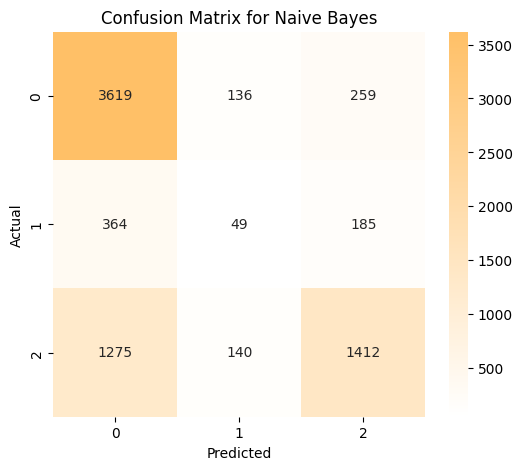

Test Accuracy: 68.29%

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78      4014
           1       0.15      0.08      0.11       598
           2       0.76      0.50      0.60      2827

    accuracy                           0.68      7439
   macro avg       0.53      0.49      0.50      7439
weighted avg       0.67      0.68      0.66      7439


Average Metrics:
Average Sensitivity (Recall): 0.4943
Average Specificity: 0.7949
Average False Positive Rate (FPR): 0.2051
Average False Negative Rate (FNR): 0.5057

Additional Metrics:
Hamming Loss: 0.3171
Cohen's Kappa Score: 0.3905
Matthews Correlation Coefficient (MCC): 0.4118

----- Gradient Boosting -----


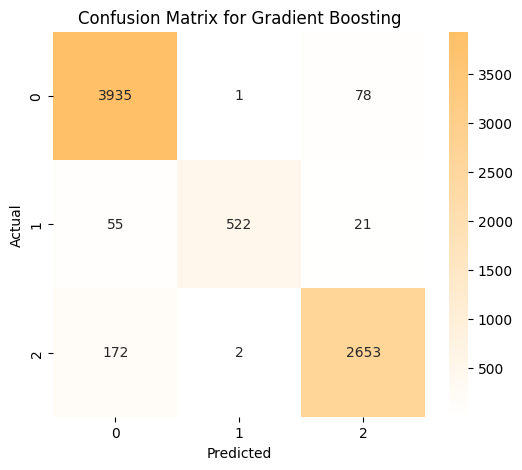

Test Accuracy: 95.58%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4014
           1       0.99      0.87      0.93       598
           2       0.96      0.94      0.95      2827

    accuracy                           0.96      7439
   macro avg       0.97      0.93      0.95      7439
weighted avg       0.96      0.96      0.96      7439


Average Metrics:
Average Sensitivity (Recall): 0.9306
Average Specificity: 0.9706
Average False Positive Rate (FPR): 0.0294
Average False Negative Rate (FNR): 0.0694

Additional Metrics:
Hamming Loss: 0.0442
Cohen's Kappa Score: 0.9199
Matthews Correlation Coefficient (MCC): 0.9204

----- AdaBoost -----


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


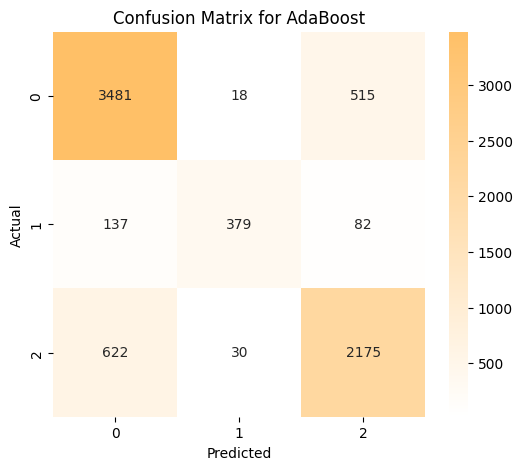

Test Accuracy: 81.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      4014
           1       0.89      0.63      0.74       598
           2       0.78      0.77      0.78      2827

    accuracy                           0.81      7439
   macro avg       0.83      0.76      0.79      7439
weighted avg       0.81      0.81      0.81      7439


Average Metrics:
Average Sensitivity (Recall): 0.7568
Average Specificity: 0.8806
Average False Positive Rate (FPR): 0.1194
Average False Negative Rate (FNR): 0.2432

Additional Metrics:
Hamming Loss: 0.1887
Cohen's Kappa Score: 0.6545
Matthews Correlation Coefficient (MCC): 0.6556

----- KNN -----


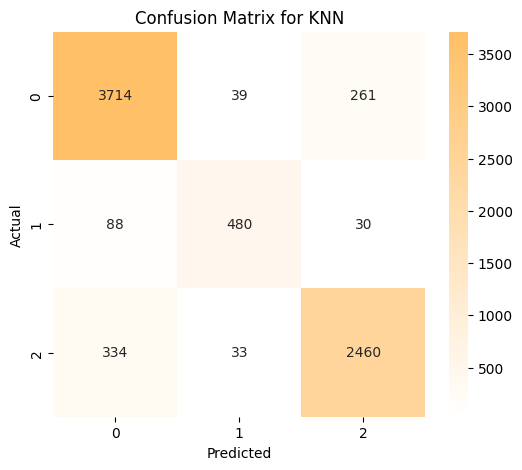

Test Accuracy: 89.45%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4014
           1       0.87      0.80      0.83       598
           2       0.89      0.87      0.88      2827

    accuracy                           0.89      7439
   macro avg       0.89      0.87      0.88      7439
weighted avg       0.89      0.89      0.89      7439


Average Metrics:
Average Sensitivity (Recall): 0.8660
Average Specificity: 0.9344
Average False Positive Rate (FPR): 0.0656
Average False Negative Rate (FNR): 0.1340

Additional Metrics:
Hamming Loss: 0.1055
Cohen's Kappa Score: 0.8093
Matthews Correlation Coefficient (MCC): 0.8097


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.feature_selection import SelectKBest, chi2
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Load the dataset
data = balanced_data

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Chi-Square feature selection
chi2_selector = SelectKBest(chi2, k=10)  # Select the top 10 features based on Chi-Square test
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Create a custom colormap using #475c6c color code
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#FFC067"])

# Initialize the models including KNN
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),  # SVM with class weight balanced
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier()  # Add KNN model
}

# Function to calculate average sensitivity, specificity, FPR, and FNR from confusion matrix
def calculate_avg_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Import additional metrics
from sklearn.metrics import hamming_loss, cohen_kappa_score, matthews_corrcoef

# Evaluate each model
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")

    # Train the model using the Chi-Square selected features
    model.fit(X_train_chi2, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_chi2)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate average metrics
    avg_metrics = calculate_avg_metrics(conf_matrix)

    # Additional Metrics: Hamming Loss, Kappa Score, MCC
    h_loss = hamming_loss(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Output the results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {avg_metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {avg_metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {avg_metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {avg_metrics['avg_FNR']:.4f}")

    # Print Hamming Loss, Kappa Score, and MCC
    print("\nAdditional Metrics:")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


#ANOVA feature without balance


----- Logistic Regression -----


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


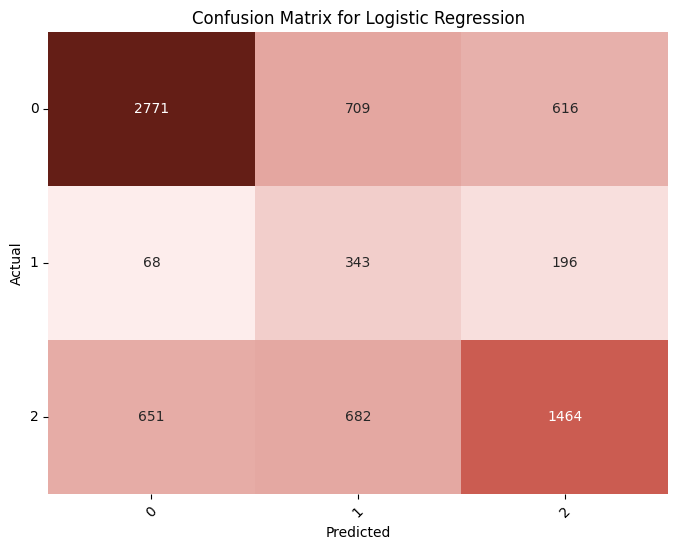

Test Accuracy: 61.04%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      4096
           1       0.20      0.57      0.29       607
           2       0.64      0.52      0.58      2797

    accuracy                           0.61      7500
   macro avg       0.55      0.59      0.53      7500
weighted avg       0.69      0.61      0.64      7500


Average Metrics:
Average Sensitivity (Recall): 0.5883
Average Specificity: 0.8048
Average False Positive Rate (FPR): 0.1952
Average False Negative Rate (FNR): 0.4117

Additional Metrics:
Hamming Loss: 0.3896
Cohen's Kappa Score: 0.3655
Matthews Correlation Coefficient (MCC): 0.3767

----- Decision Tree -----


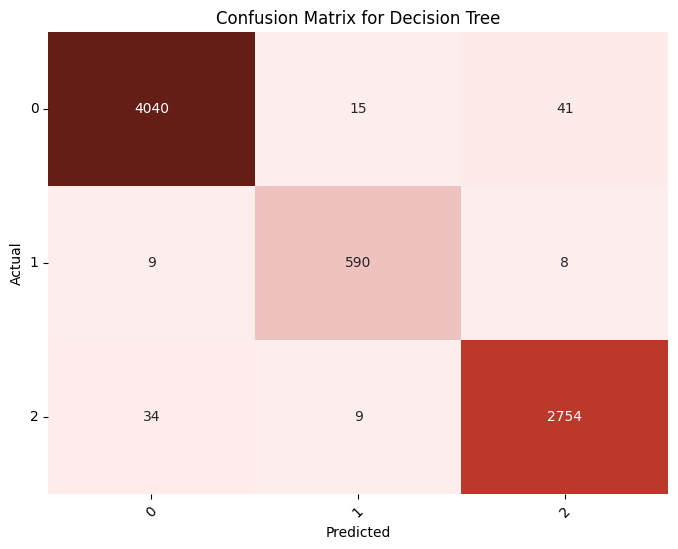

Test Accuracy: 98.45%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4096
           1       0.96      0.97      0.97       607
           2       0.98      0.98      0.98      2797

    accuracy                           0.98      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500


Average Metrics:
Average Sensitivity (Recall): 0.9810
Average Specificity: 0.9912
Average False Positive Rate (FPR): 0.0088
Average False Negative Rate (FNR): 0.0190

Additional Metrics:
Hamming Loss: 0.0155
Cohen's Kappa Score: 0.9722
Matthews Correlation Coefficient (MCC): 0.9722

----- Random Forest -----


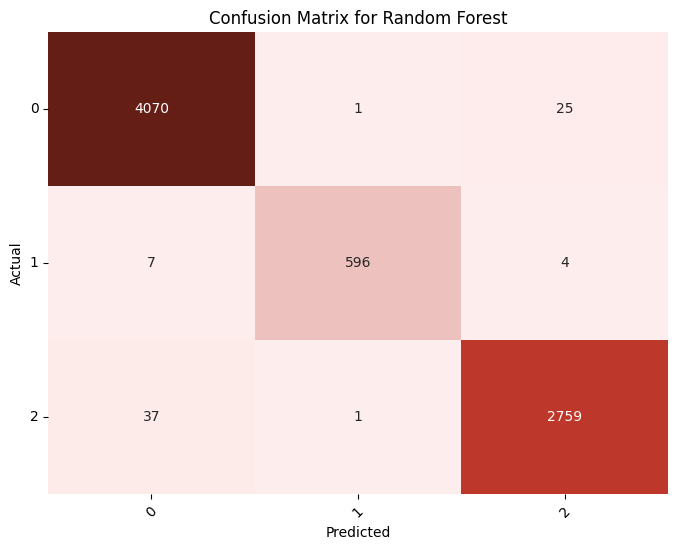

Test Accuracy: 99.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4096
           1       1.00      0.98      0.99       607
           2       0.99      0.99      0.99      2797

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500


Average Metrics:
Average Sensitivity (Recall): 0.9873
Average Specificity: 0.9935
Average False Positive Rate (FPR): 0.0065
Average False Negative Rate (FNR): 0.0127

Additional Metrics:
Hamming Loss: 0.0100
Cohen's Kappa Score: 0.9820
Matthews Correlation Coefficient (MCC): 0.9820

----- SVM -----


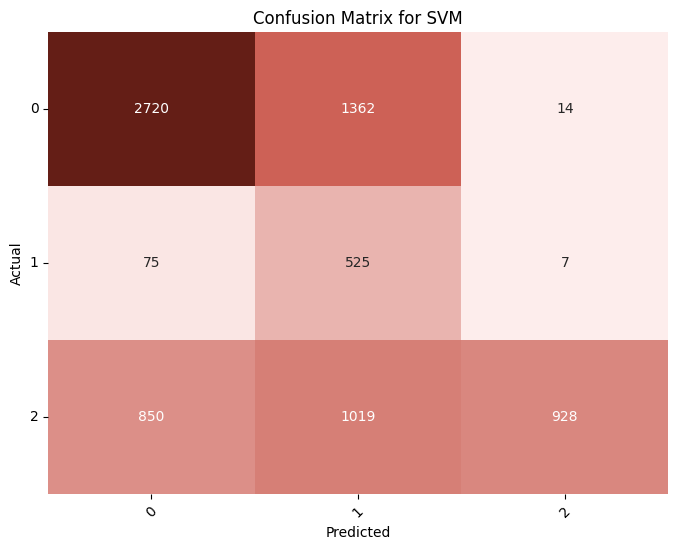

Test Accuracy: 55.64%

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      4096
           1       0.18      0.86      0.30       607
           2       0.98      0.33      0.50      2797

    accuracy                           0.56      7500
   macro avg       0.63      0.62      0.50      7500
weighted avg       0.79      0.56      0.59      7500


Average Metrics:
Average Sensitivity (Recall): 0.6203
Average Specificity: 0.7928
Average False Positive Rate (FPR): 0.2072
Average False Negative Rate (FNR): 0.3797

Additional Metrics:
Hamming Loss: 0.4436
Cohen's Kappa Score: 0.3238
Matthews Correlation Coefficient (MCC): 0.3685

----- Naive Bayes -----


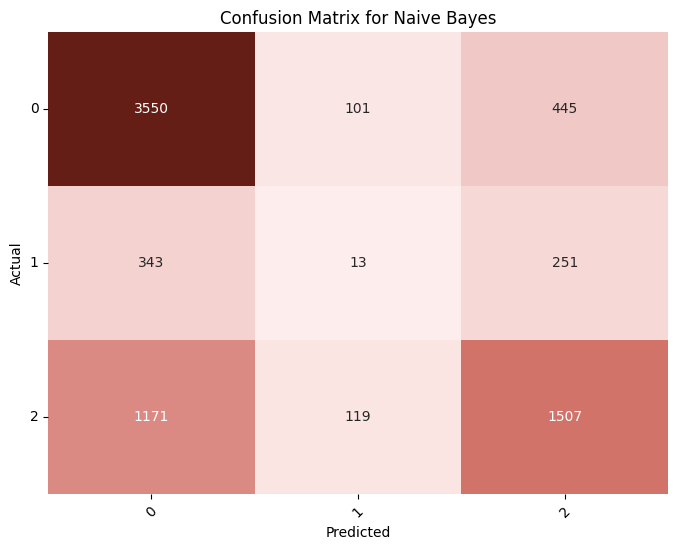

Test Accuracy: 67.60%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78      4096
           1       0.06      0.02      0.03       607
           2       0.68      0.54      0.60      2797

    accuracy                           0.68      7500
   macro avg       0.48      0.48      0.47      7500
weighted avg       0.64      0.68      0.65      7500


Average Metrics:
Average Sensitivity (Recall): 0.4756
Average Specificity: 0.7918
Average False Positive Rate (FPR): 0.2082
Average False Negative Rate (FNR): 0.5244

Additional Metrics:
Hamming Loss: 0.3240
Cohen's Kappa Score: 0.3760
Matthews Correlation Coefficient (MCC): 0.3873

----- KNN -----


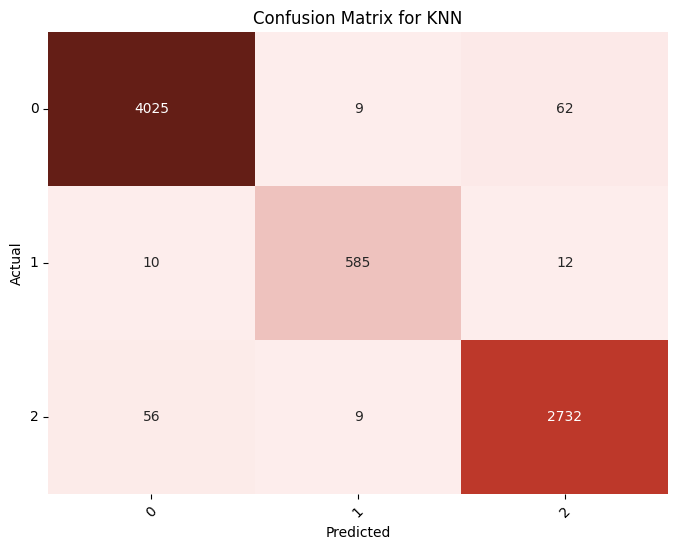

Test Accuracy: 97.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4096
           1       0.97      0.96      0.97       607
           2       0.97      0.98      0.98      2797

    accuracy                           0.98      7500
   macro avg       0.98      0.97      0.98      7500
weighted avg       0.98      0.98      0.98      7500


Average Metrics:
Average Sensitivity (Recall): 0.9744
Average Specificity: 0.9874
Average False Positive Rate (FPR): 0.0126
Average False Negative Rate (FNR): 0.0256

Additional Metrics:
Hamming Loss: 0.0211
Cohen's Kappa Score: 0.9621
Matthews Correlation Coefficient (MCC): 0.9621


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.feature_selection import SelectKBest, f_classif  # Import ANOVA
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/liver_cirrhosis.csv')

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ANOVA feature selection
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create a custom colormap using shades of red similar to the uploaded image
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#FDEDEC", "#D98880", "#C0392B", "#641E16"])

# Update Logistic Regression with class_weight='balanced' and adjust regularization parameter
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', C=0.1),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Function to calculate average sensitivity, specificity, FPR, and FNR from confusion matrix
def calculate_avg_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix with the custom colormap
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))  # Increase size for better visibility
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    plt.show()

# Import additional metrics
from sklearn.metrics import hamming_loss, cohen_kappa_score, matthews_corrcoef

# Evaluate each model
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")

    # Train the model on the ANOVA-selected features
    model.fit(X_train_selected, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_selected)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix with the custom colormap
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate average metrics
    avg_metrics = calculate_avg_metrics(conf_matrix)

    # Additional Metrics: Hamming Loss, Kappa Score, MCC
    h_loss = hamming_loss(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Output the results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {avg_metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {avg_metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {avg_metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {avg_metrics['avg_FNR']:.4f}")

    # Print Hamming Loss, Kappa Score, and MCC
    print("\nAdditional Metrics:")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")



#With time complexity and runtime


----- Logistic Regression -----


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


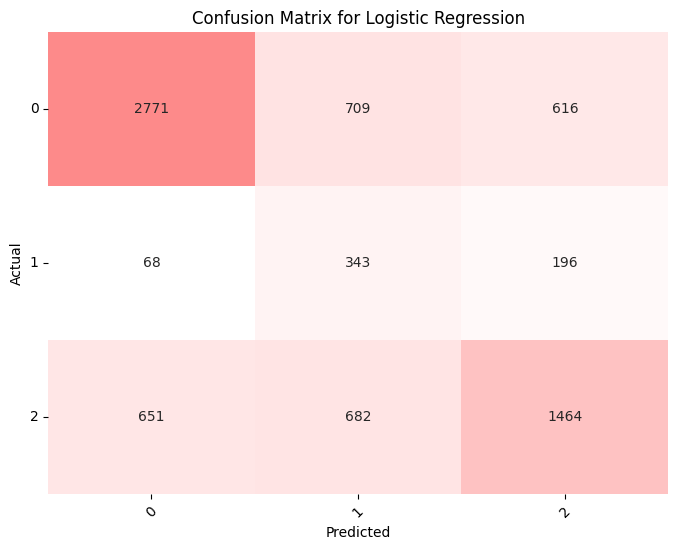

Test Accuracy: 61.04%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      4096
           1       0.20      0.57      0.29       607
           2       0.64      0.52      0.58      2797

    accuracy                           0.61      7500
   macro avg       0.55      0.59      0.53      7500
weighted avg       0.69      0.61      0.64      7500


Average Metrics:
Average Sensitivity (Recall): 0.5883
Average Specificity: 0.8048
Average False Positive Rate (FPR): 0.1952
Average False Negative Rate (FNR): 0.4117

Additional Metrics:
Hamming Loss: 0.3896
Cohen's Kappa Score: 0.3655
Matthews Correlation Coefficient (MCC): 0.3767

----- Decision Tree -----


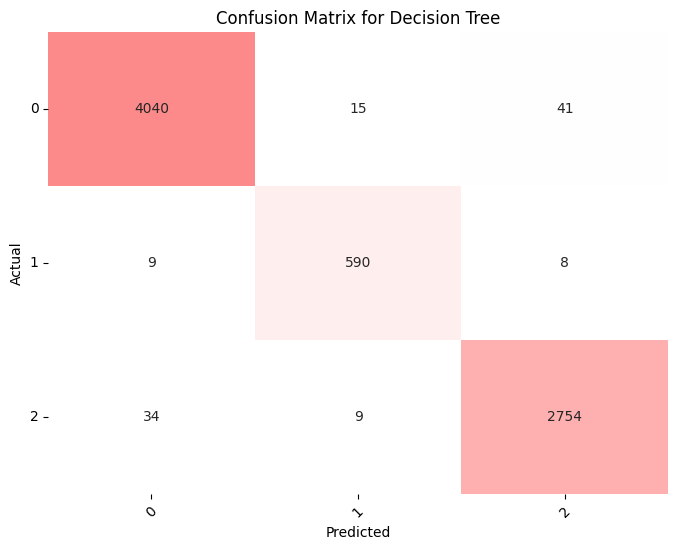

Test Accuracy: 98.45%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4096
           1       0.96      0.97      0.97       607
           2       0.98      0.98      0.98      2797

    accuracy                           0.98      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500


Average Metrics:
Average Sensitivity (Recall): 0.9810
Average Specificity: 0.9912
Average False Positive Rate (FPR): 0.0088
Average False Negative Rate (FNR): 0.0190

Additional Metrics:
Hamming Loss: 0.0155
Cohen's Kappa Score: 0.9722
Matthews Correlation Coefficient (MCC): 0.9722

----- Random Forest -----


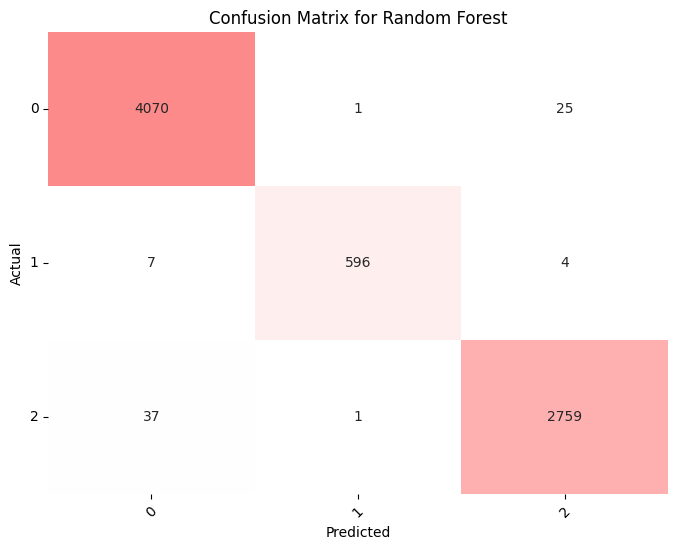

Test Accuracy: 99.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4096
           1       1.00      0.98      0.99       607
           2       0.99      0.99      0.99      2797

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500


Average Metrics:
Average Sensitivity (Recall): 0.9873
Average Specificity: 0.9935
Average False Positive Rate (FPR): 0.0065
Average False Negative Rate (FNR): 0.0127

Additional Metrics:
Hamming Loss: 0.0100
Cohen's Kappa Score: 0.9820
Matthews Correlation Coefficient (MCC): 0.9820

----- SVM -----


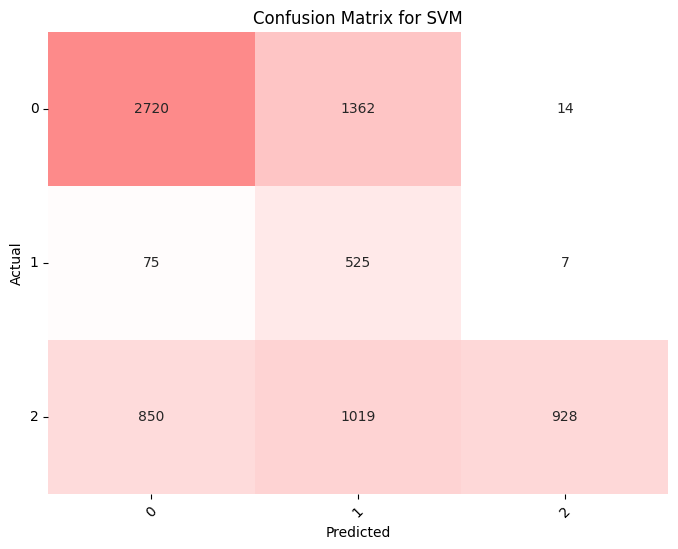

Test Accuracy: 55.64%

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      4096
           1       0.18      0.86      0.30       607
           2       0.98      0.33      0.50      2797

    accuracy                           0.56      7500
   macro avg       0.63      0.62      0.50      7500
weighted avg       0.79      0.56      0.59      7500


Average Metrics:
Average Sensitivity (Recall): 0.6203
Average Specificity: 0.7928
Average False Positive Rate (FPR): 0.2072
Average False Negative Rate (FNR): 0.3797

Additional Metrics:
Hamming Loss: 0.4436
Cohen's Kappa Score: 0.3238
Matthews Correlation Coefficient (MCC): 0.3685

----- Naive Bayes -----


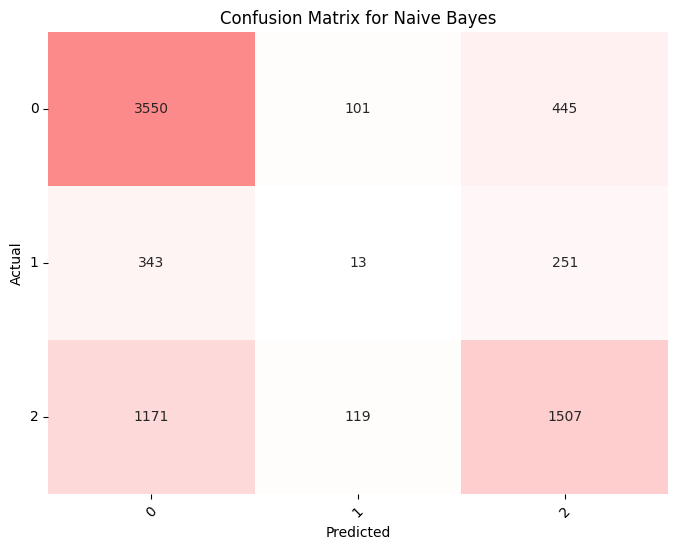

Test Accuracy: 67.60%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78      4096
           1       0.06      0.02      0.03       607
           2       0.68      0.54      0.60      2797

    accuracy                           0.68      7500
   macro avg       0.48      0.48      0.47      7500
weighted avg       0.64      0.68      0.65      7500


Average Metrics:
Average Sensitivity (Recall): 0.4756
Average Specificity: 0.7918
Average False Positive Rate (FPR): 0.2082
Average False Negative Rate (FNR): 0.5244

Additional Metrics:
Hamming Loss: 0.3240
Cohen's Kappa Score: 0.3760
Matthews Correlation Coefficient (MCC): 0.3873

----- KNN -----


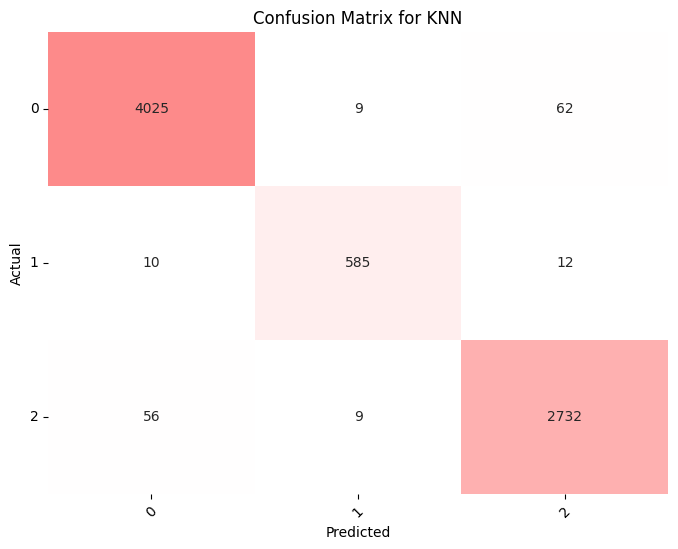

Test Accuracy: 97.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4096
           1       0.97      0.96      0.97       607
           2       0.97      0.98      0.98      2797

    accuracy                           0.98      7500
   macro avg       0.98      0.97      0.98      7500
weighted avg       0.98      0.98      0.98      7500


Average Metrics:
Average Sensitivity (Recall): 0.9744
Average Specificity: 0.9874
Average False Positive Rate (FPR): 0.0126
Average False Negative Rate (FNR): 0.0256

Additional Metrics:
Hamming Loss: 0.0211
Cohen's Kappa Score: 0.9621
Matthews Correlation Coefficient (MCC): 0.9621


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib.colors import LinearSegmentedColormap
import time  # Import for time measurement

# Load the dataset
data = pd.read_csv('/content/liver_cirrhosis.csv')

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ANOVA feature selection
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create a custom colormap using #475c6c color code
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#FD8A8A"])

# Update Logistic Regression with class_weight='balanced' and adjust regularization parameter
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', C=0.1),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Time complexity info for each model
time_complexities = {
    'Logistic Regression': 'O(n * m)',
    'Decision Tree': 'O(n * m * log(n))',
    'Random Forest': 'O(k * n * m * log(n))',
    'SVM': 'O(n^2 * m) (non-linear)',
    'Naive Bayes': 'O(n * m)',
    'KNN': 'O(n * m)'
}

# Function to calculate average sensitivity, specificity, FPR, and FNR from confusion matrix
def calculate_avg_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))  # Increase size for better visibility
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    plt.show()

# Import additional metrics
from sklearn.metrics import hamming_loss, cohen_kappa_score, matthews_corrcoef

# Evaluate each model
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")

    # Train the model on the ANOVA-selected features
    model.fit(X_train_selected, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_selected)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix with the custom colormap
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate average metrics
    avg_metrics = calculate_avg_metrics(conf_matrix)

    # Additional Metrics: Hamming Loss, Kappa Score, MCC
    h_loss = hamming_loss(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Output the results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {avg_metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {avg_metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {avg_metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {avg_metrics['avg_FNR']:.4f}")

    # Print Hamming Loss, Kappa Score, and MCC
    print("\nAdditional Metrics:")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")



#ANOVA with balance


----- Logistic Regression -----


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


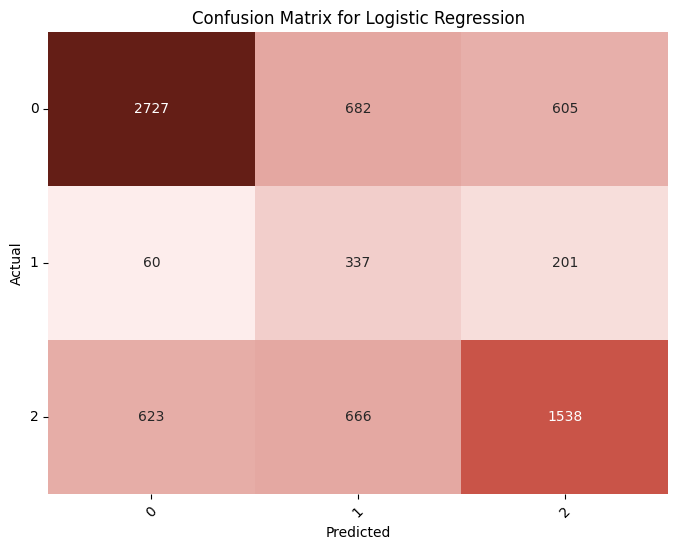

Test Accuracy: 61.86%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73      4014
           1       0.20      0.56      0.30       598
           2       0.66      0.54      0.59      2827

    accuracy                           0.62      7439
   macro avg       0.55      0.60      0.54      7439
weighted avg       0.70      0.62      0.65      7439


Average Metrics:
Average Sensitivity (Recall): 0.5957
Average Specificity: 0.8096
Average False Positive Rate (FPR): 0.1904
Average False Negative Rate (FNR): 0.4043

Additional Metrics:
Hamming Loss: 0.3814
Cohen's Kappa Score: 0.3796
Matthews Correlation Coefficient (MCC): 0.3907

----- Decision Tree -----


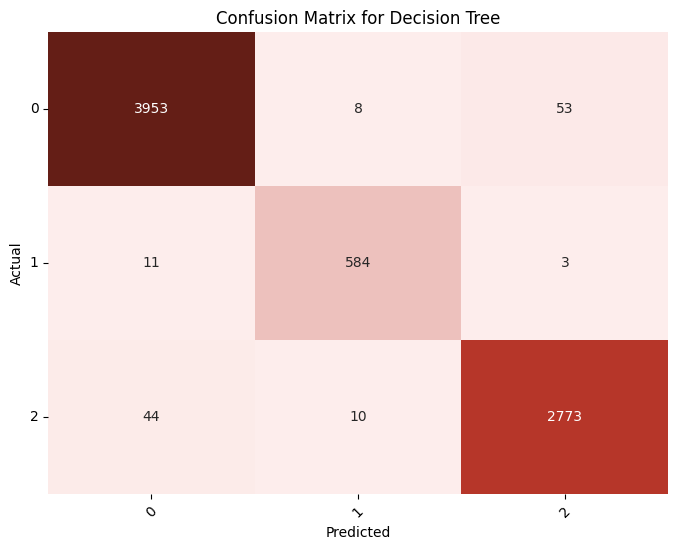

Test Accuracy: 98.27%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4014
           1       0.97      0.98      0.97       598
           2       0.98      0.98      0.98      2827

    accuracy                           0.98      7439
   macro avg       0.98      0.98      0.98      7439
weighted avg       0.98      0.98      0.98      7439


Average Metrics:
Average Sensitivity (Recall): 0.9808
Average Specificity: 0.9897
Average False Positive Rate (FPR): 0.0103
Average False Negative Rate (FNR): 0.0192

Additional Metrics:
Hamming Loss: 0.0173
Cohen's Kappa Score: 0.9689
Matthews Correlation Coefficient (MCC): 0.9689

----- Random Forest -----


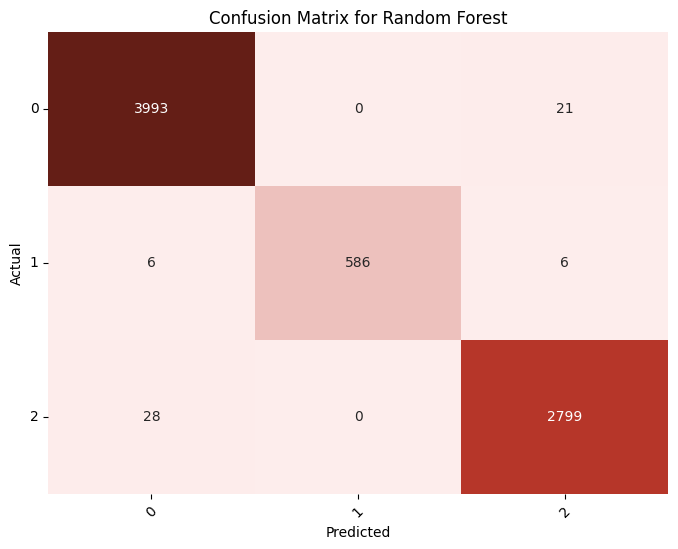

Test Accuracy: 99.18%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4014
           1       1.00      0.98      0.99       598
           2       0.99      0.99      0.99      2827

    accuracy                           0.99      7439
   macro avg       0.99      0.99      0.99      7439
weighted avg       0.99      0.99      0.99      7439


Average Metrics:
Average Sensitivity (Recall): 0.9883
Average Specificity: 0.9947
Average False Positive Rate (FPR): 0.0053
Average False Negative Rate (FNR): 0.0117

Additional Metrics:
Hamming Loss: 0.0082
Cohen's Kappa Score: 0.9853
Matthews Correlation Coefficient (MCC): 0.9853

----- SVM -----


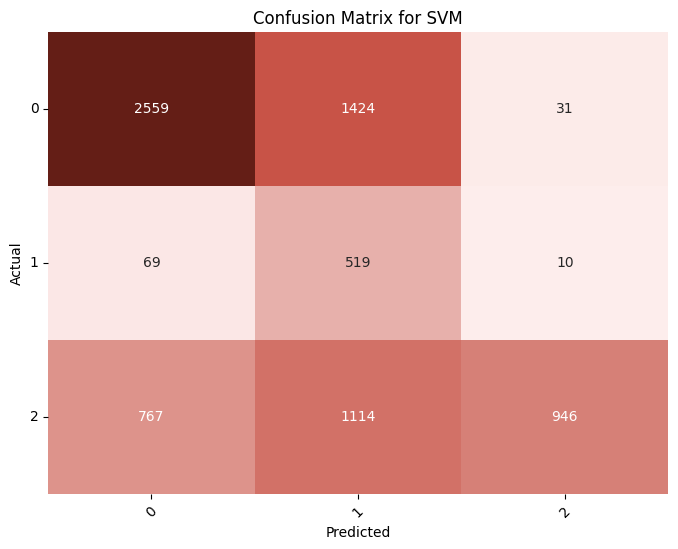

Test Accuracy: 54.09%

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      4014
           1       0.17      0.87      0.28       598
           2       0.96      0.33      0.50      2827

    accuracy                           0.54      7439
   macro avg       0.63      0.61      0.49      7439
weighted avg       0.78      0.54      0.58      7439


Average Metrics:
Average Sensitivity (Recall): 0.6133
Average Specificity: 0.7920
Average False Positive Rate (FPR): 0.2080
Average False Negative Rate (FNR): 0.3867

Additional Metrics:
Hamming Loss: 0.4591
Cohen's Kappa Score: 0.3151
Matthews Correlation Coefficient (MCC): 0.3635

----- Naive Bayes -----


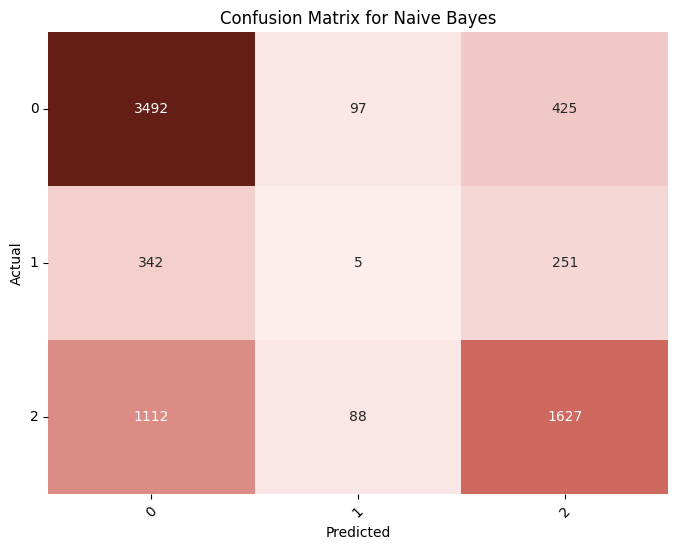

Test Accuracy: 68.88%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      4014
           1       0.03      0.01      0.01       598
           2       0.71      0.58      0.63      2827

    accuracy                           0.69      7439
   macro avg       0.48      0.48      0.48      7439
weighted avg       0.65      0.69      0.66      7439


Average Metrics:
Average Sensitivity (Recall): 0.4846
Average Specificity: 0.8006
Average False Positive Rate (FPR): 0.1994
Average False Negative Rate (FNR): 0.5154

Additional Metrics:
Hamming Loss: 0.3112
Cohen's Kappa Score: 0.4033
Matthews Correlation Coefficient (MCC): 0.4145

----- KNN -----


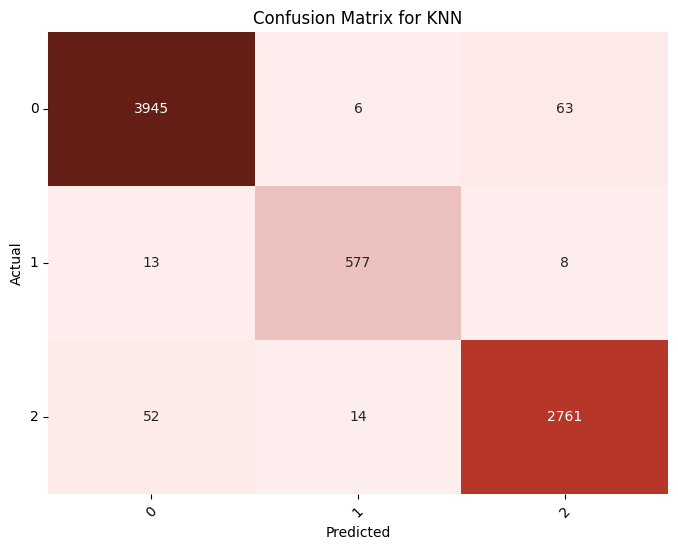

Test Accuracy: 97.90%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4014
           1       0.97      0.96      0.97       598
           2       0.97      0.98      0.98      2827

    accuracy                           0.98      7439
   macro avg       0.98      0.97      0.97      7439
weighted avg       0.98      0.98      0.98      7439


Average Metrics:
Average Sensitivity (Recall): 0.9748
Average Specificity: 0.9876
Average False Positive Rate (FPR): 0.0124
Average False Negative Rate (FNR): 0.0252

Additional Metrics:
Hamming Loss: 0.0210
Cohen's Kappa Score: 0.9624
Matthews Correlation Coefficient (MCC): 0.9624


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.feature_selection import SelectKBest, f_classif  # Import ANOVA
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = balanced_data

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ANOVA feature selection
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create a custom colormap using shades of red similar to the uploaded image
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#FDEDEC", "#D98880", "#C0392B", "#641E16"])

# Update Logistic Regression with class_weight='balanced' and adjust regularization parameter
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', C=0.1),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Function to calculate average sensitivity, specificity, FPR, and FNR from confusion matrix
def calculate_avg_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix with the custom colormap
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))  # Increase size for better visibility
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    plt.show()

# Import additional metrics
from sklearn.metrics import hamming_loss, cohen_kappa_score, matthews_corrcoef

# Evaluate each model
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")

    # Train the model on the ANOVA-selected features
    model.fit(X_train_selected, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_selected)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix with the custom colormap
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate average metrics
    avg_metrics = calculate_avg_metrics(conf_matrix)

    # Additional Metrics: Hamming Loss, Kappa Score, MCC
    h_loss = hamming_loss(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Output the results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {avg_metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {avg_metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {avg_metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {avg_metrics['avg_FNR']:.4f}")

    # Print Hamming Loss, Kappa Score, and MCC
    print("\nAdditional Metrics:")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")



----- Logistic Regression -----


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


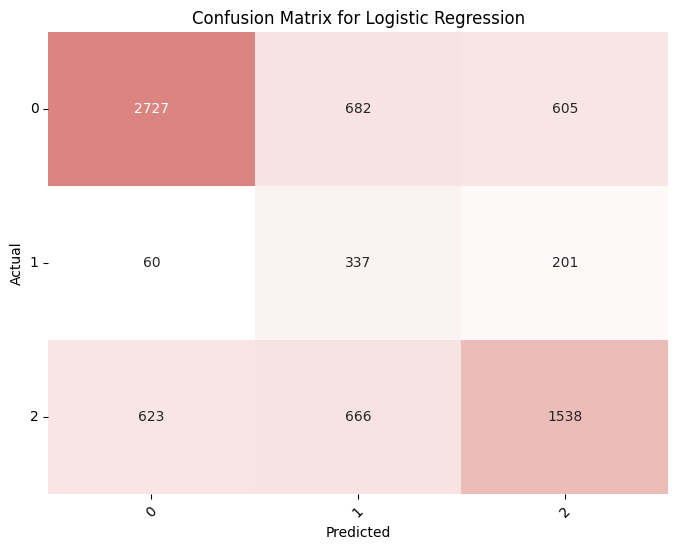

Test Accuracy: 61.86%
Runtime for Logistic Regression: 4.3624 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73      4014
           1       0.20      0.56      0.30       598
           2       0.66      0.54      0.59      2827

    accuracy                           0.62      7439
   macro avg       0.55      0.60      0.54      7439
weighted avg       0.70      0.62      0.65      7439


Average Metrics:
Average Sensitivity (Recall): 0.5957
Average Specificity: 0.8096
Average False Positive Rate (FPR): 0.1904
Average False Negative Rate (FNR): 0.4043

----- Decision Tree -----


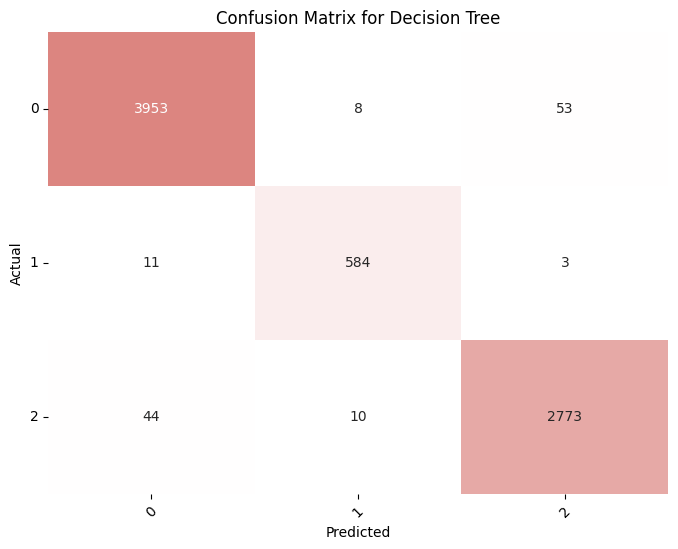

Test Accuracy: 98.27%
Runtime for Decision Tree: 0.0578 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4014
           1       0.97      0.98      0.97       598
           2       0.98      0.98      0.98      2827

    accuracy                           0.98      7439
   macro avg       0.98      0.98      0.98      7439
weighted avg       0.98      0.98      0.98      7439


Average Metrics:
Average Sensitivity (Recall): 0.9808
Average Specificity: 0.9897
Average False Positive Rate (FPR): 0.0103
Average False Negative Rate (FNR): 0.0192

----- Random Forest -----


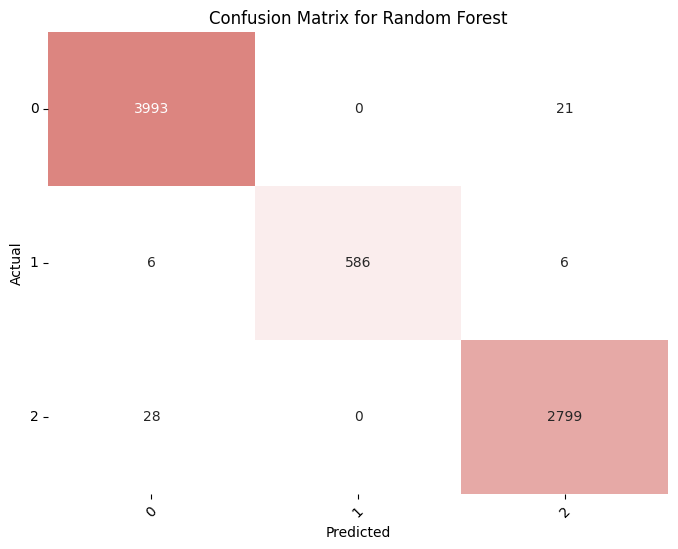

Test Accuracy: 99.18%
Runtime for Random Forest: 2.1560 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4014
           1       1.00      0.98      0.99       598
           2       0.99      0.99      0.99      2827

    accuracy                           0.99      7439
   macro avg       0.99      0.99      0.99      7439
weighted avg       0.99      0.99      0.99      7439


Average Metrics:
Average Sensitivity (Recall): 0.9883
Average Specificity: 0.9947
Average False Positive Rate (FPR): 0.0053
Average False Negative Rate (FNR): 0.0117

----- SVM -----


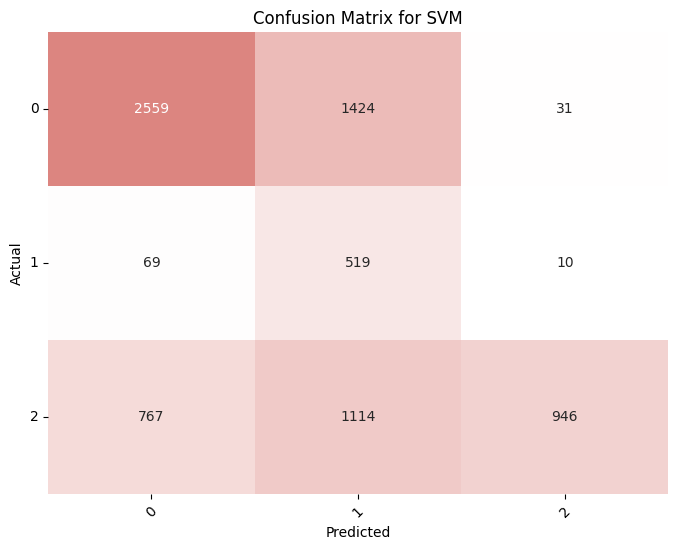

Test Accuracy: 54.09%
Runtime for SVM: 134.9743 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      4014
           1       0.17      0.87      0.28       598
           2       0.96      0.33      0.50      2827

    accuracy                           0.54      7439
   macro avg       0.63      0.61      0.49      7439
weighted avg       0.78      0.54      0.58      7439


Average Metrics:
Average Sensitivity (Recall): 0.6133
Average Specificity: 0.7920
Average False Positive Rate (FPR): 0.2080
Average False Negative Rate (FNR): 0.3867

----- Naive Bayes -----


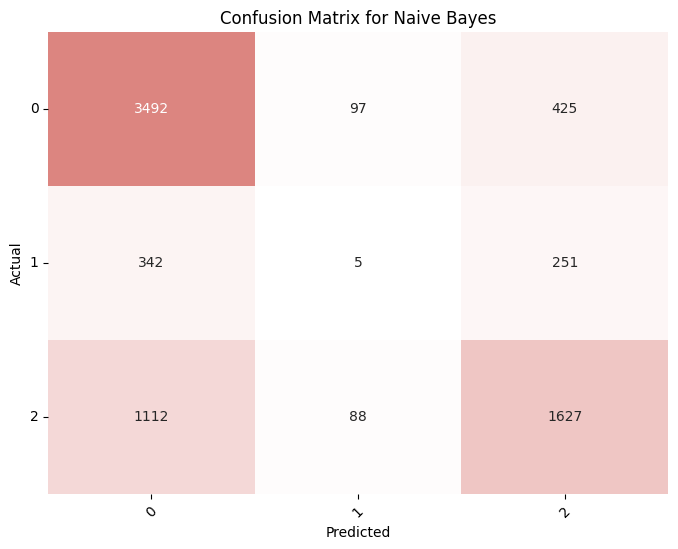

Test Accuracy: 68.88%
Runtime for Naive Bayes: 0.0119 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      4014
           1       0.03      0.01      0.01       598
           2       0.71      0.58      0.63      2827

    accuracy                           0.69      7439
   macro avg       0.48      0.48      0.48      7439
weighted avg       0.65      0.69      0.66      7439


Average Metrics:
Average Sensitivity (Recall): 0.4846
Average Specificity: 0.8006
Average False Positive Rate (FPR): 0.1994
Average False Negative Rate (FNR): 0.5154

----- KNN -----


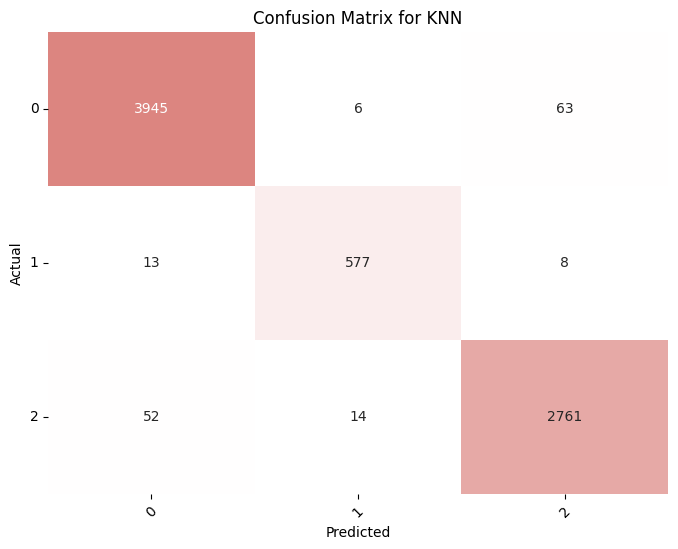

Test Accuracy: 97.90%
Runtime for KNN: 0.7000 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4014
           1       0.97      0.96      0.97       598
           2       0.97      0.98      0.98      2827

    accuracy                           0.98      7439
   macro avg       0.98      0.97      0.97      7439
weighted avg       0.98      0.98      0.98      7439


Average Metrics:
Average Sensitivity (Recall): 0.9748
Average Specificity: 0.9876
Average False Positive Rate (FPR): 0.0124
Average False Negative Rate (FNR): 0.0252


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


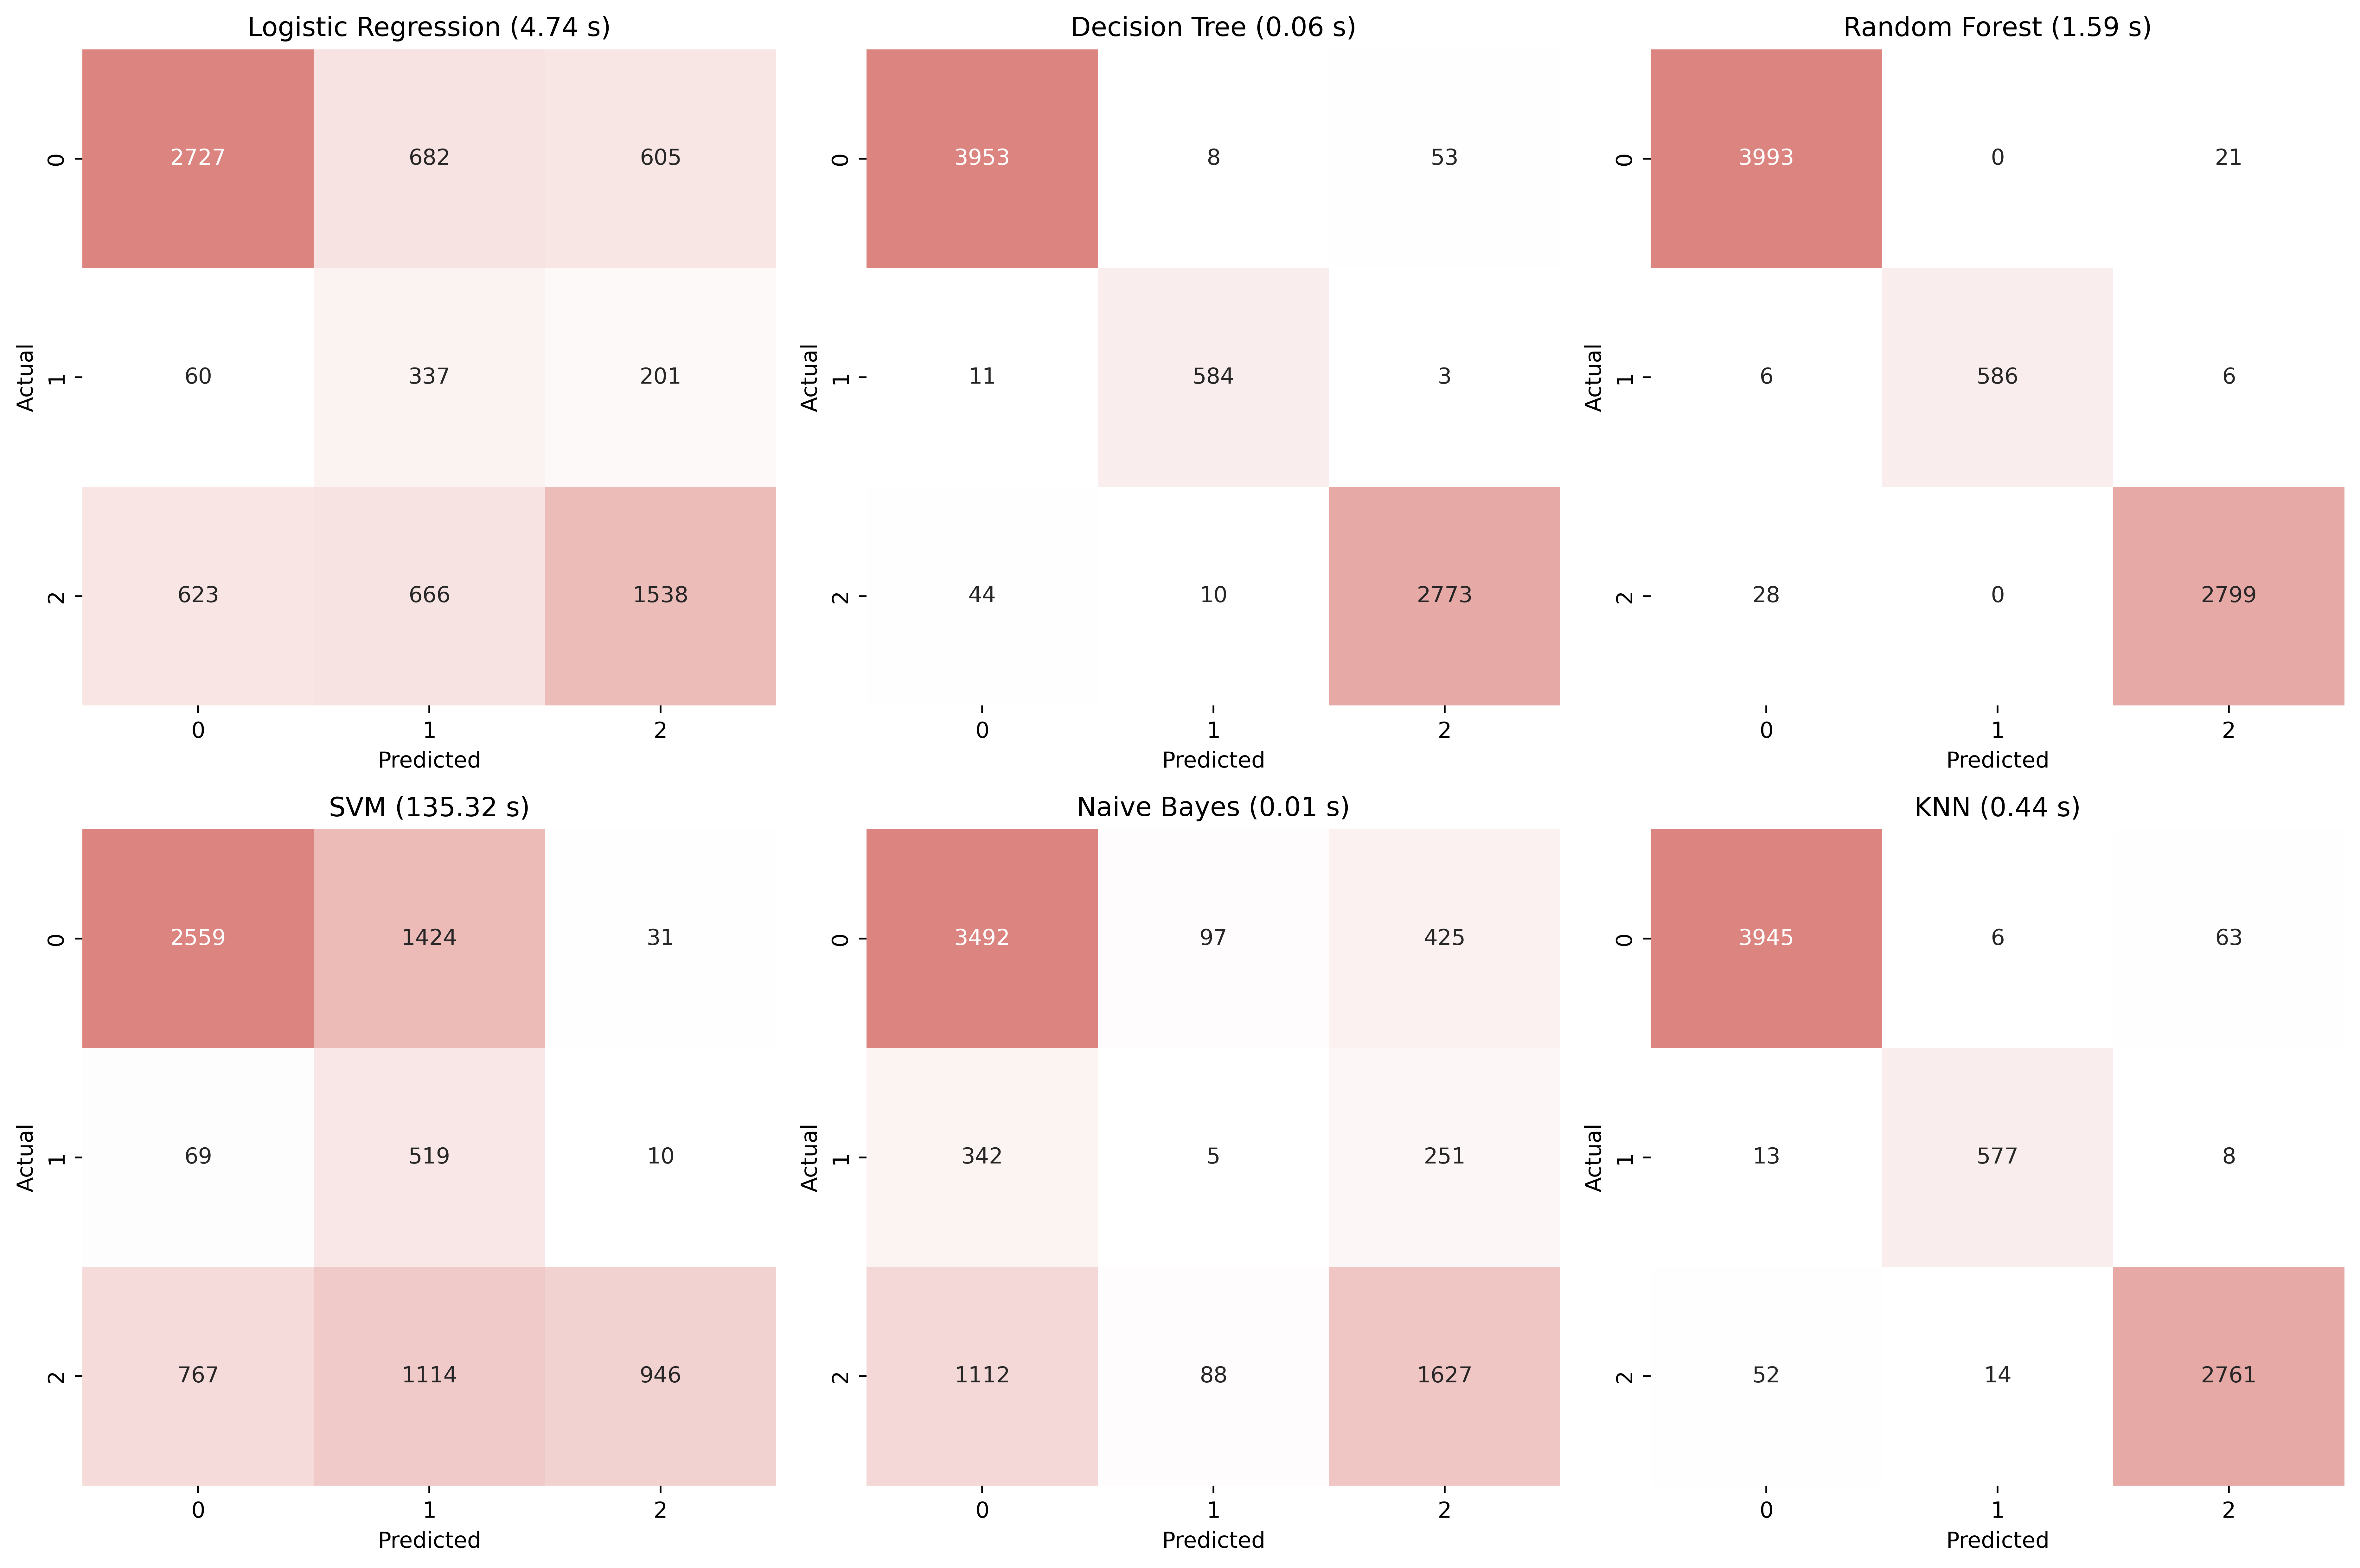

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import LinearSegmentedColormap

# Load the dataset
data = balanced_data

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with scaled features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#FFC067"])

# Initialize the models including KNN and SVM with class_weight balanced
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Function to calculate sensitivity, specificity, FPR, and FNR from confusion matrix and return averages
def calculate_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        # Accumulate metrics
        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Evaluate each model
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")

    # Train the model on scaled data
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate average metrics
    metrics = calculate_metrics(conf_matrix)

    # Output the results
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {metrics['avg_FNR']:.4f}")

# Stacking model configuration
base_models = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42, class_weight='balanced')),
    ('nb', GaussianNB()),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42)),
    ('knn', KNeighborsClassifier())
]

# Meta-model for stacking
meta_model = LogisticRegression(random_state=42)

# Initialize the stacking model with base models and meta-model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred_stack = stacking_model.predict(X_test)

# Calculate accuracy for stacking model
accuracy_stack = accuracy_score(y_test, y_pred_stack)

# Confusion matrix for stacking model
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)

# Plot confusion matrix for stacking model
plot_confusion_matrix(conf_matrix_stack, "Stacking Model")

# Calculate average metrics for stacking model
metrics_stack = calculate_metrics(conf_matrix_stack)

# Output the results for stacking model
print("\n----- Stacking Model -----")
print(f"Test Accuracy: {accuracy_stack * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_stack))

# Print average sensitivity, specificity, FPR, and FNR for stacking model
print("\nAverage Metrics:")
print(f"Average Sensitivity (Recall): {metrics_stack['avg_sensitivity']:.4f}")
print(f"Average Specificity: {metrics_stack['avg_specificity']:.4f}")
print(f"Average False Positive Rate (FPR): {metrics_stack['avg_FPR']:.4f}")
print(f"Average False Negative Rate (FNR): {metrics_stack['avg_FNR']:.4f}")


#CV5 for balance ANOVA


----- Logistic Regression -----


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

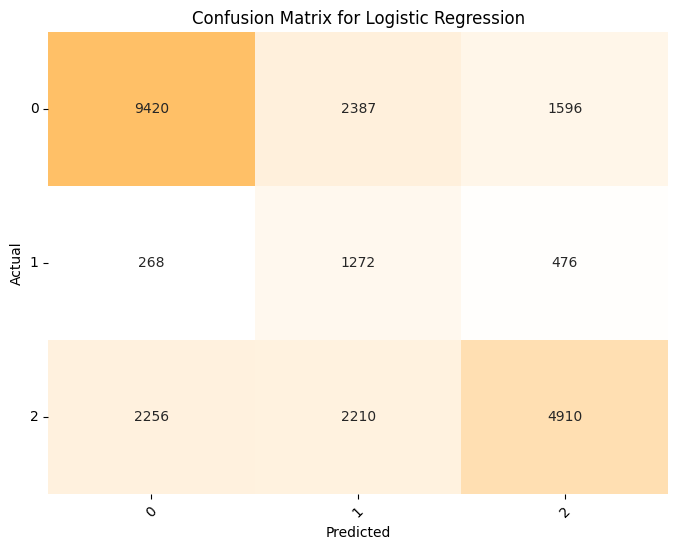

CV Accuracy: 62.92%
Total Time for CV (training + prediction for all 5 folds): 40.5314 seconds
Time Complexity: O(n * m)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74     13403
           1       0.22      0.63      0.32      2016
           2       0.70      0.52      0.60      9376

    accuracy                           0.63     24795
   macro avg       0.57      0.62      0.56     24795
weighted avg       0.71      0.63      0.66     24795


Average Metrics:
Average Sensitivity (Recall): 0.6192
Average Specificity: 0.8141
Average False Positive Rate (FPR): 0.1859
Average False Negative Rate (FNR): 0.3808

----- Decision Tree -----


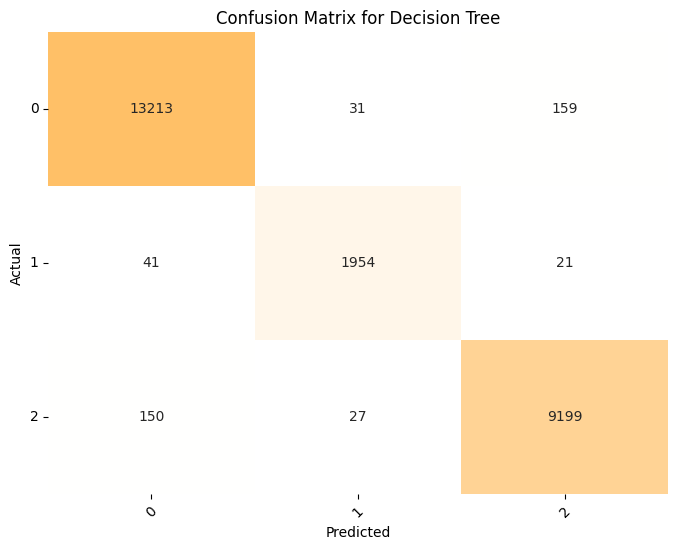

CV Accuracy: 98.27%
Total Time for CV (training + prediction for all 5 folds): 0.5376 seconds
Time Complexity: O(n * m * log(n))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13403
           1       0.97      0.97      0.97      2016
           2       0.98      0.98      0.98      9376

    accuracy                           0.98     24795
   macro avg       0.98      0.98      0.98     24795
weighted avg       0.98      0.98      0.98     24795


Average Metrics:
Average Sensitivity (Recall): 0.9787
Average Specificity: 0.9897
Average False Positive Rate (FPR): 0.0103
Average False Negative Rate (FNR): 0.0213

----- Random Forest -----


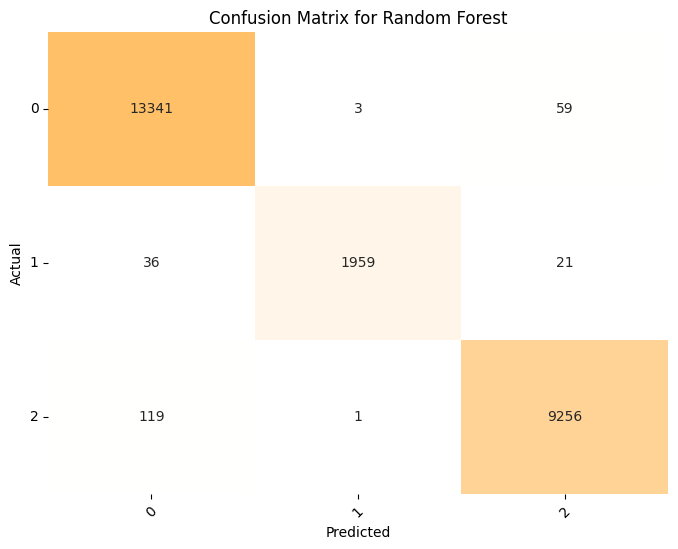

CV Accuracy: 99.04%
Total Time for CV (training + prediction for all 5 folds): 9.4276 seconds
Time Complexity: O(k * n * m * log(n))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13403
           1       1.00      0.97      0.98      2016
           2       0.99      0.99      0.99      9376

    accuracy                           0.99     24795
   macro avg       0.99      0.98      0.99     24795
weighted avg       0.99      0.99      0.99     24795


Average Metrics:
Average Sensitivity (Recall): 0.9848
Average Specificity: 0.9937
Average False Positive Rate (FPR): 0.0063
Average False Negative Rate (FNR): 0.0152

----- SVM -----


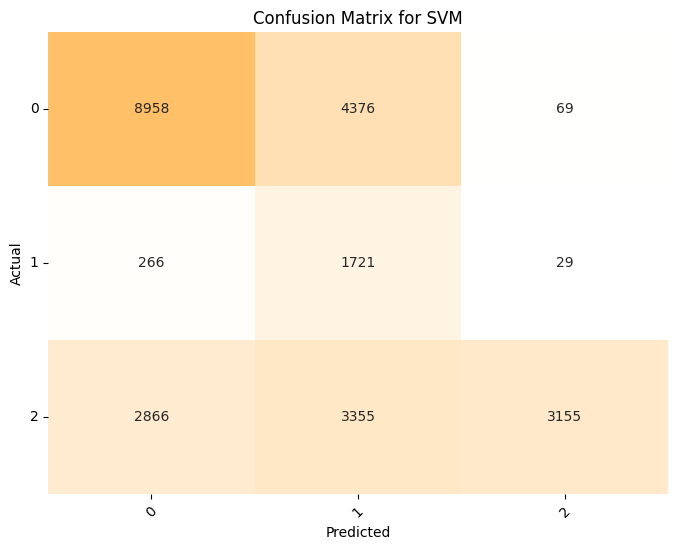

CV Accuracy: 55.79%
Total Time for CV (training + prediction for all 5 folds): 877.1809 seconds
Time Complexity: O(n^2 * m) (non-linear)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70     13403
           1       0.18      0.85      0.30      2016
           2       0.97      0.34      0.50      9376

    accuracy                           0.56     24795
   macro avg       0.63      0.62      0.50     24795
weighted avg       0.78      0.56      0.59     24795


Average Metrics:
Average Sensitivity (Recall): 0.6195
Average Specificity: 0.7931
Average False Positive Rate (FPR): 0.2069
Average False Negative Rate (FNR): 0.3805

----- Naive Bayes -----


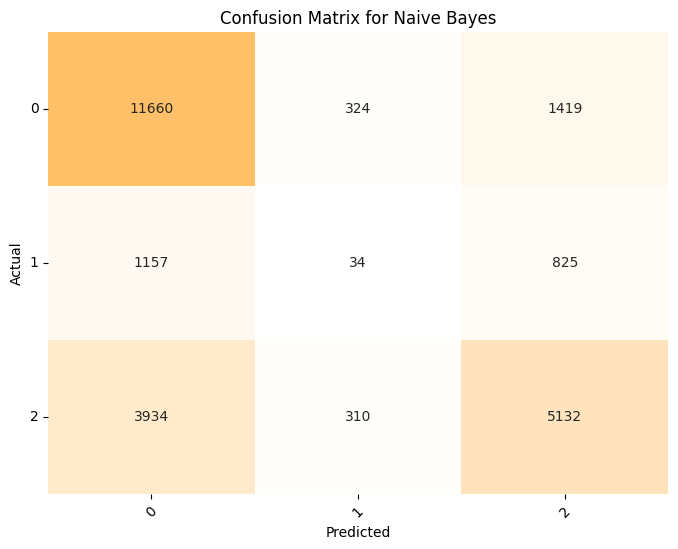

CV Accuracy: 67.86%
Total Time for CV (training + prediction for all 5 folds): 0.0733 seconds
Time Complexity: O(n * m)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.77     13403
           1       0.05      0.02      0.03      2016
           2       0.70      0.55      0.61      9376

    accuracy                           0.68     24795
   macro avg       0.48      0.48      0.47     24795
weighted avg       0.64      0.68      0.65     24795


Average Metrics:
Average Sensitivity (Recall): 0.4781
Average Specificity: 0.7932
Average False Positive Rate (FPR): 0.2068
Average False Negative Rate (FNR): 0.5219

----- KNN -----


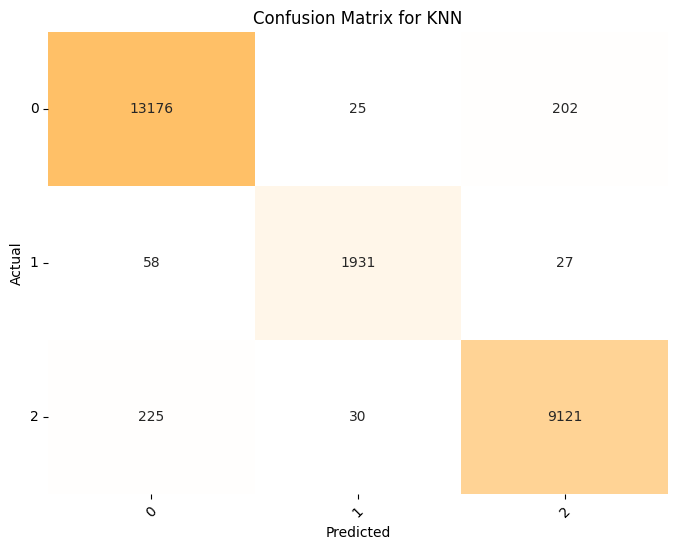

CV Accuracy: 97.71%
Total Time for CV (training + prediction for all 5 folds): 1.7637 seconds
Time Complexity: O(n * m)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13403
           1       0.97      0.96      0.97      2016
           2       0.98      0.97      0.97      9376

    accuracy                           0.98     24795
   macro avg       0.98      0.97      0.97     24795
weighted avg       0.98      0.98      0.98     24795


Average Metrics:
Average Sensitivity (Recall): 0.9712
Average Specificity: 0.9860
Average False Positive Rate (FPR): 0.0140
Average False Negative Rate (FNR): 0.0288


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import time

# Load the dataset
data = balanced_data

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# ANOVA feature selection
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

# Create a custom colormap using #475c6c color code
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#FFC067"])

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', C=0.1),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Time complexity info for each model
time_complexities = {
    'Logistic Regression': 'O(n * m)',
    'Decision Tree': 'O(n * m * log(n))',
    'Random Forest': 'O(k * n * m * log(n))',
    'SVM': 'O(n^2 * m) (non-linear)',
    'Naive Bayes': 'O(n * m)',
    'KNN': 'O(n * m)'
}

# Function to calculate average sensitivity, specificity, FPR, and FNR from confusion matrix
def calculate_avg_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))  # Increase size for better visibility
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    plt.show()

# Evaluate each model using 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\n----- {model_name} -----")

    # Measure cross-validation predictions
    start_time = time.time()
    y_pred_cv = cross_val_predict(model, X_selected, y, cv=kf)
    total_time = time.time() - start_time

    # Confusion matrix
    conf_matrix = confusion_matrix(y, y_pred_cv)

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate average metrics
    avg_metrics = calculate_avg_metrics(conf_matrix)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred_cv)

    # Output the results
    print(f"CV Accuracy: {accuracy * 100:.2f}%")
    print(f"Total Time for CV (training + prediction for all 5 folds): {total_time:.4f} seconds")
    print(f"Time Complexity: {time_complexities[model_name]}")  # Print time complexity

    print("\nClassification Report:")
    print(classification_report(y, y_pred_cv))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {avg_metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {avg_metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {avg_metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {avg_metrics['avg_FNR']:.4f}")



#ANOVA Balance cv10


----- Logistic Regression with 10-fold CV -----


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

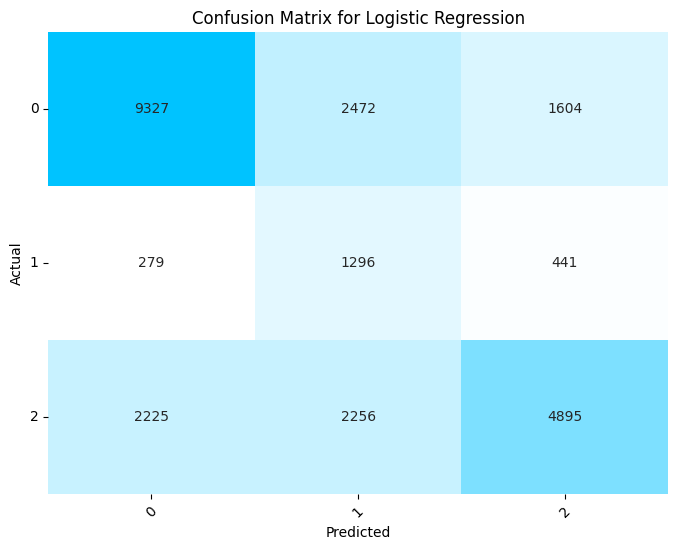

Cross-Validated Accuracy: 62.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74     13403
           1       0.22      0.64      0.32      2016
           2       0.71      0.52      0.60      9376

    accuracy                           0.63     24795
   macro avg       0.57      0.62      0.55     24795
weighted avg       0.71      0.63      0.65     24795


Average Metrics:
Average Sensitivity (Recall): 0.6203
Average Specificity: 0.8133
Average False Positive Rate (FPR): 0.1867
Average False Negative Rate (FNR): 0.3797

----- Decision Tree with 10-fold CV -----


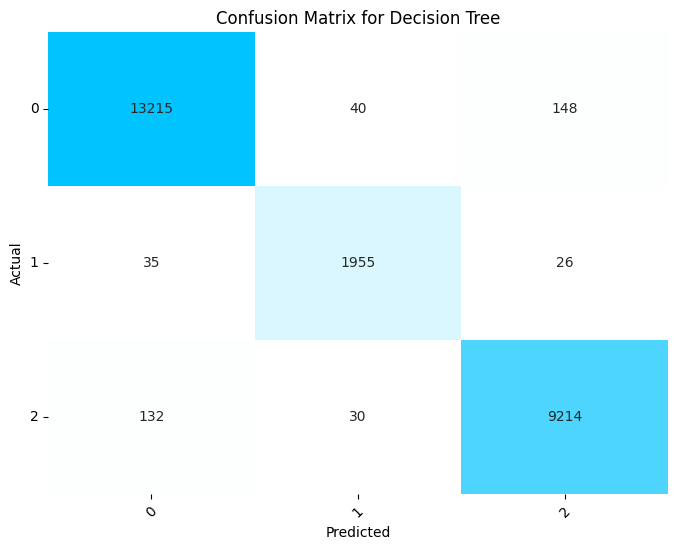

Cross-Validated Accuracy: 98.34%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13403
           1       0.97      0.97      0.97      2016
           2       0.98      0.98      0.98      9376

    accuracy                           0.98     24795
   macro avg       0.98      0.98      0.98     24795
weighted avg       0.98      0.98      0.98     24795


Average Metrics:
Average Sensitivity (Recall): 0.9795
Average Specificity: 0.9903
Average False Positive Rate (FPR): 0.0097
Average False Negative Rate (FNR): 0.0205

----- Random Forest with 10-fold CV -----


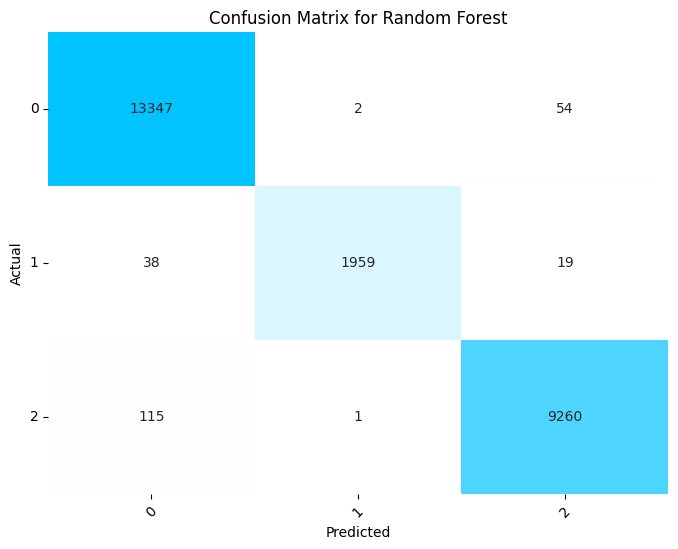

Cross-Validated Accuracy: 99.08%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13403
           1       1.00      0.97      0.98      2016
           2       0.99      0.99      0.99      9376

    accuracy                           0.99     24795
   macro avg       0.99      0.99      0.99     24795
weighted avg       0.99      0.99      0.99     24795


Average Metrics:
Average Sensitivity (Recall): 0.9851
Average Specificity: 0.9939
Average False Positive Rate (FPR): 0.0061
Average False Negative Rate (FNR): 0.0149

----- SVM with 10-fold CV -----


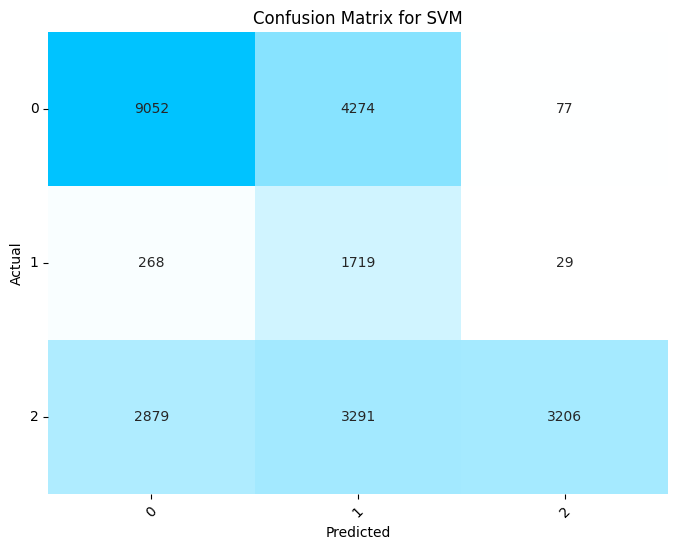

Cross-Validated Accuracy: 56.37%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71     13403
           1       0.19      0.85      0.30      2016
           2       0.97      0.34      0.51      9376

    accuracy                           0.56     24795
   macro avg       0.63      0.62      0.51     24795
weighted avg       0.78      0.56      0.60     24795


Average Metrics:
Average Sensitivity (Recall): 0.6233
Average Specificity: 0.7949
Average False Positive Rate (FPR): 0.2051
Average False Negative Rate (FNR): 0.3767

----- Naive Bayes with 10-fold CV -----


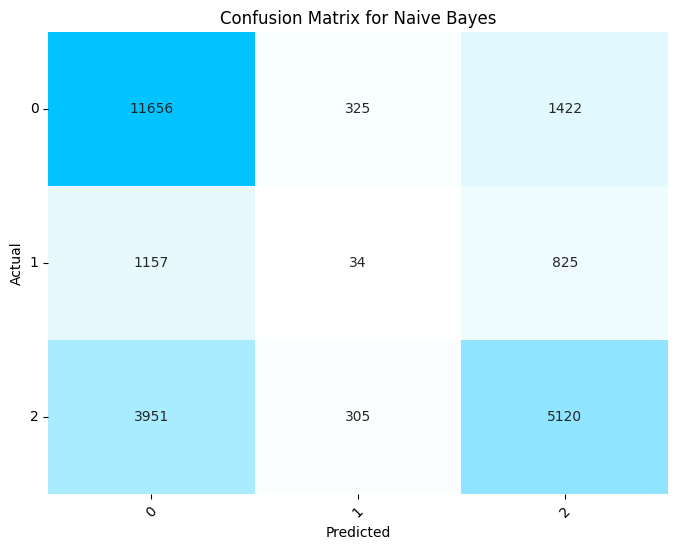

Cross-Validated Accuracy: 67.80%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.77     13403
           1       0.05      0.02      0.03      2016
           2       0.69      0.55      0.61      9376

    accuracy                           0.68     24795
   macro avg       0.48      0.48      0.47     24795
weighted avg       0.64      0.68      0.65     24795


Average Metrics:
Average Sensitivity (Recall): 0.4775
Average Specificity: 0.7927
Average False Positive Rate (FPR): 0.2073
Average False Negative Rate (FNR): 0.5225

----- KNN with 10-fold CV -----


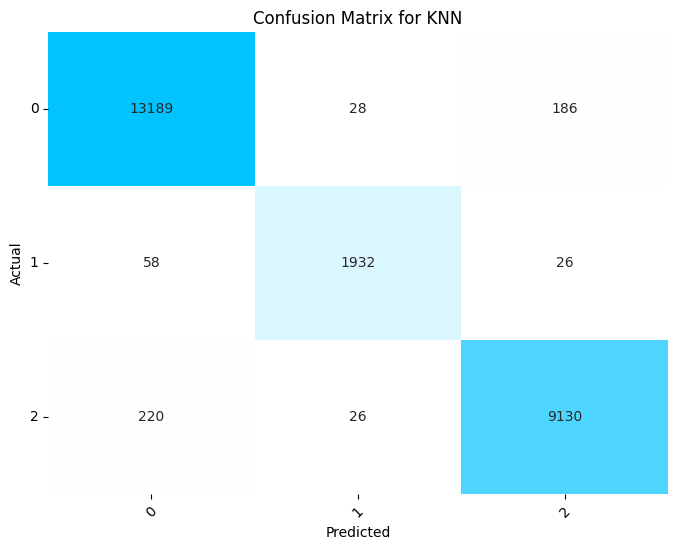

Cross-Validated Accuracy: 97.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13403
           1       0.97      0.96      0.97      2016
           2       0.98      0.97      0.98      9376

    accuracy                           0.98     24795
   macro avg       0.98      0.97      0.97     24795
weighted avg       0.98      0.98      0.98     24795


Average Metrics:
Average Sensitivity (Recall): 0.9720
Average Specificity: 0.9865
Average False Positive Rate (FPR): 0.0135
Average False Negative Rate (FNR): 0.0280


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

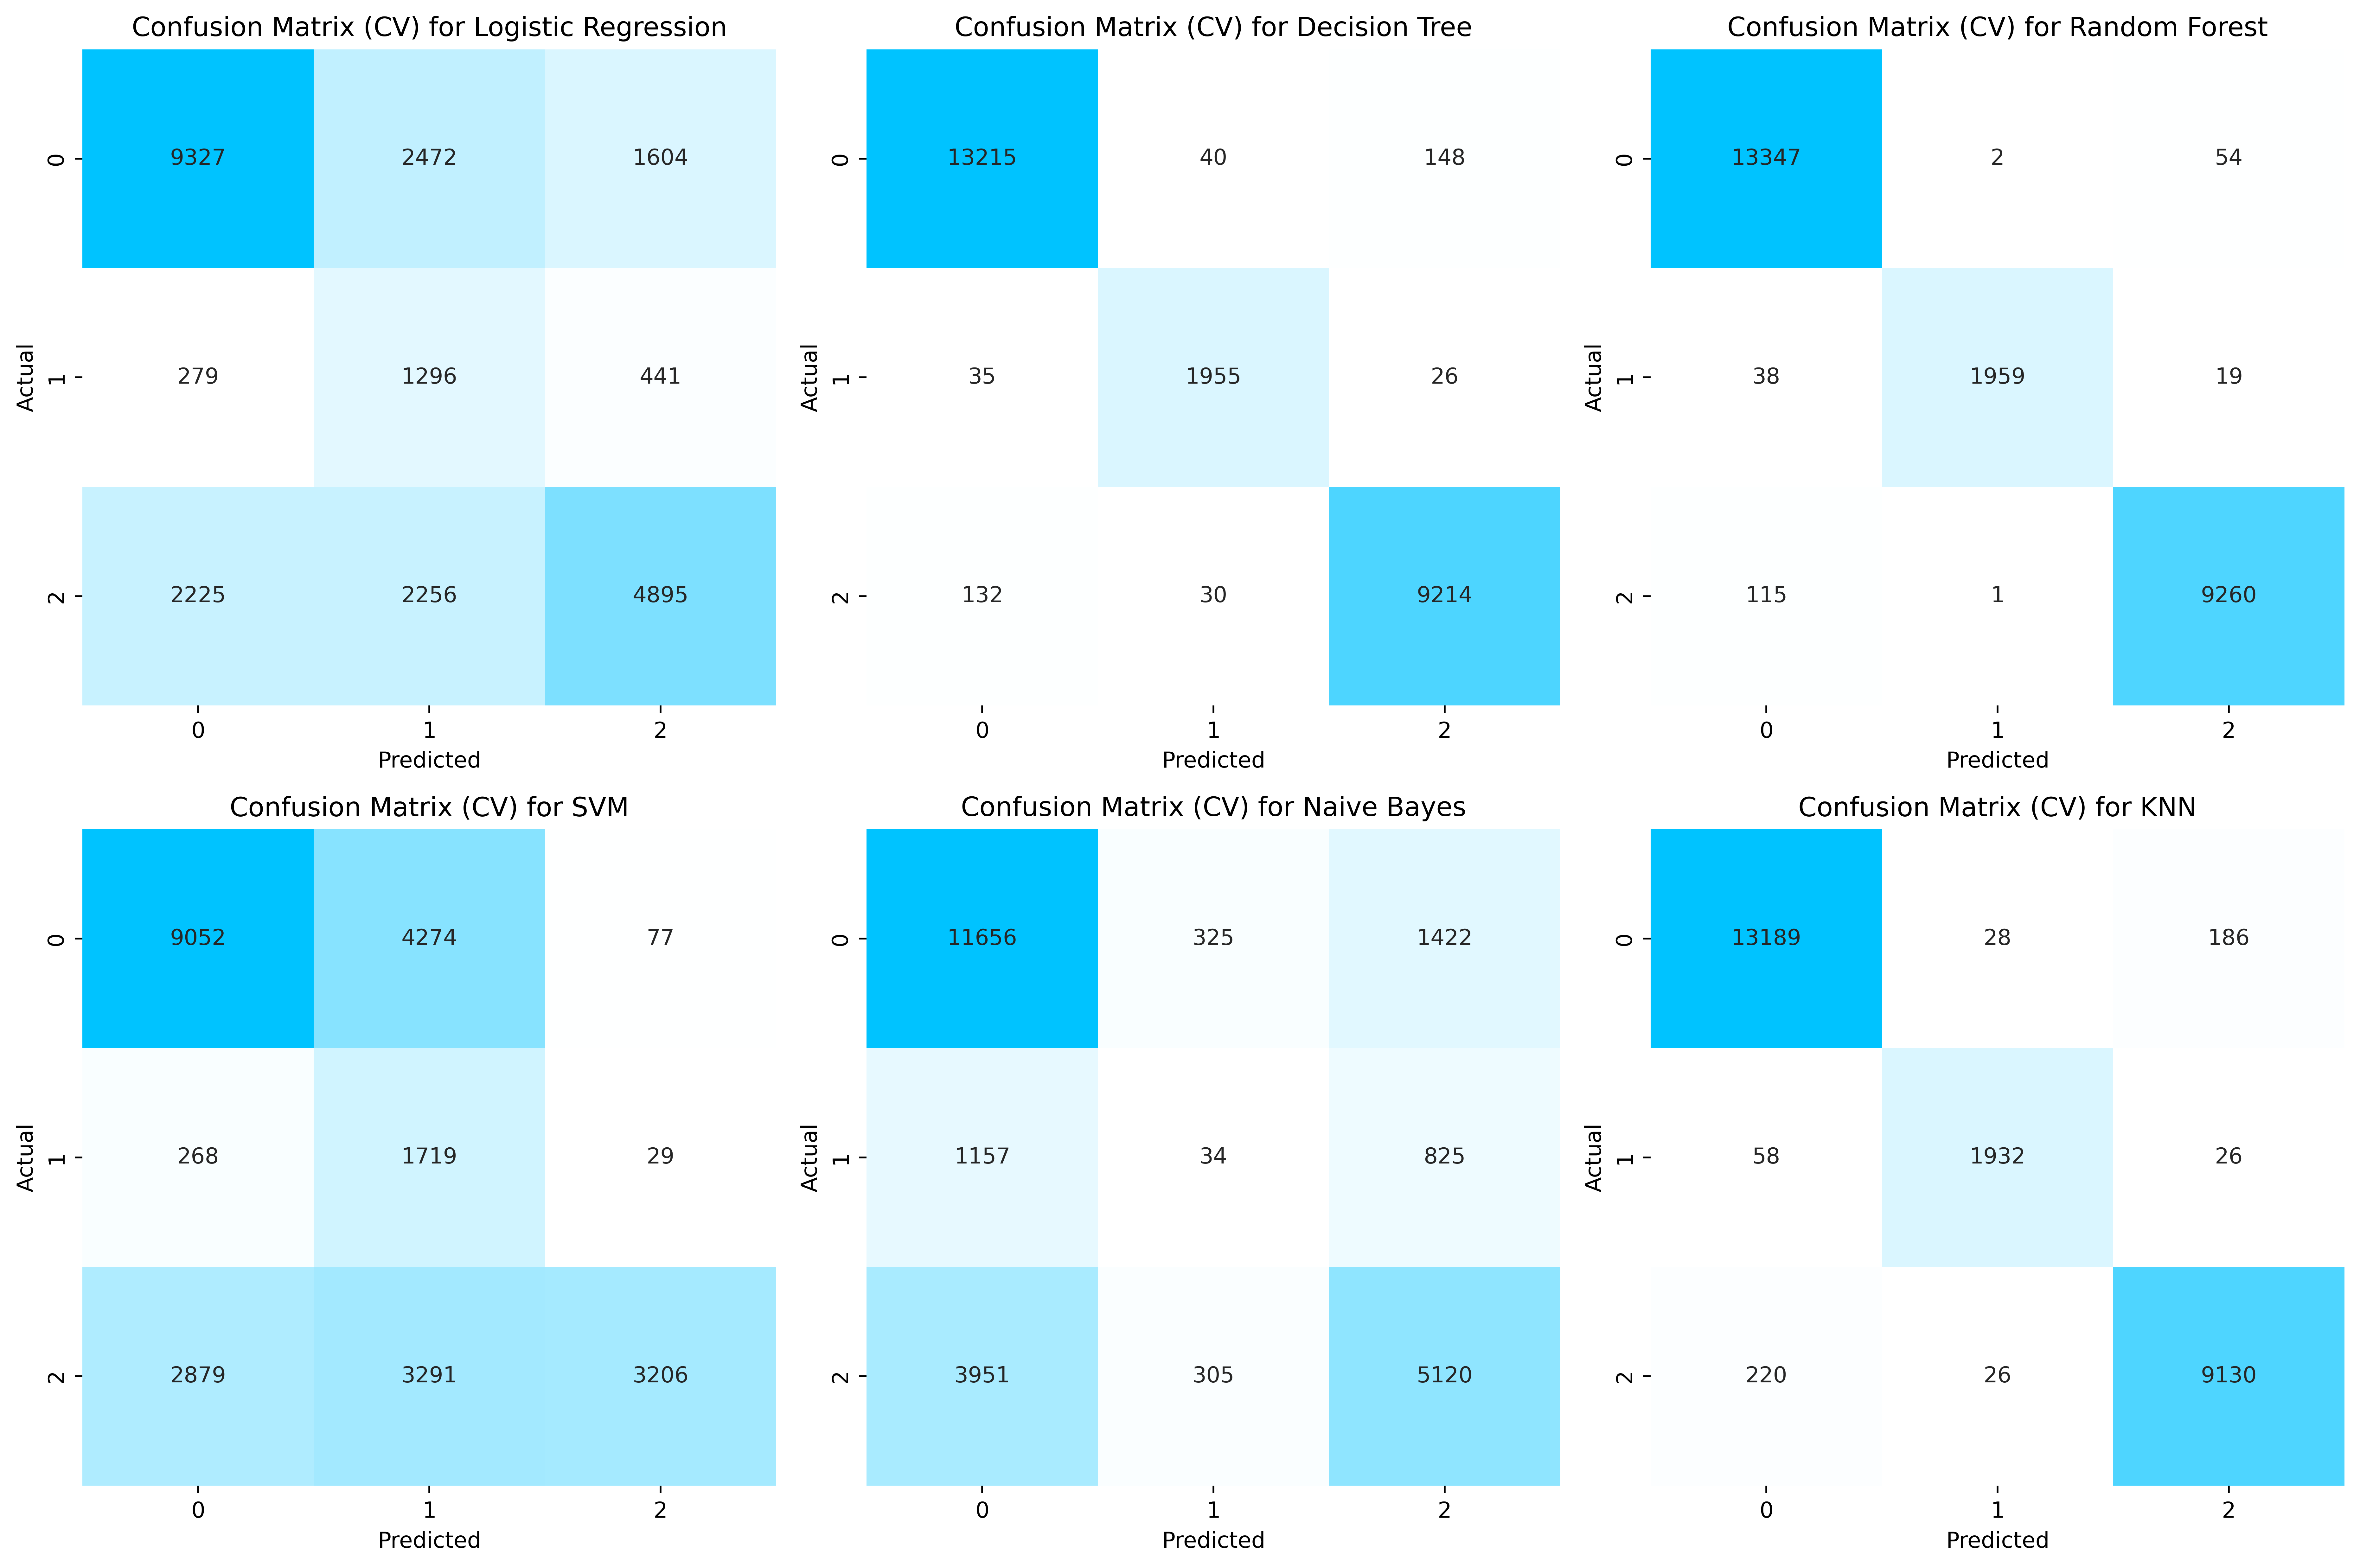

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.feature_selection import SelectKBest, f_classif  # Import ANOVA
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = balanced_data

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# ANOVA feature selection
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

# Create a custom colormap using shades of blue
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#00C3FF"])

# Update Logistic Regression with class_weight='balanced' and adjust regularization parameter
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', C=0.1),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Function to calculate average sensitivity, specificity, FPR, and FNR from confusion matrix
def calculate_avg_metrics(conf_matrix):
    total_sensitivity = 0
    total_specificity = 0
    total_FPR = 0
    total_FNR = 0

    for i in range(len(conf_matrix)):
        TP = conf_matrix[i, i]  # True Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
        FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate

        total_sensitivity += sensitivity
        total_specificity += specificity
        total_FPR += FPR
        total_FNR += FNR

    # Compute averages
    num_classes = len(conf_matrix)
    avg_sensitivity = total_sensitivity / num_classes
    avg_specificity = total_specificity / num_classes
    avg_FPR = total_FPR / num_classes
    avg_FNR = total_FNR / num_classes

    return {
        'avg_sensitivity': avg_sensitivity,
        'avg_specificity': avg_specificity,
        'avg_FPR': avg_FPR,
        'avg_FNR': avg_FNR
    }

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))  # Increase size for better visibility
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    plt.show()

# Evaluate each model using 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\n----- {model_name} with 10-fold CV -----")

    # Get cross-validated predictions
    y_pred_cv = cross_val_predict(model, X_selected, y, cv=kf)

    # Confusion matrix
    conf_matrix = confusion_matrix(y, y_pred_cv)

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, model_name)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred_cv)

    # Calculate average metrics
    avg_metrics = calculate_avg_metrics(conf_matrix)

    # Output the results
    print(f"Cross-Validated Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y, y_pred_cv))

    # Print average sensitivity, specificity, FPR, and FNR
    print("\nAverage Metrics:")
    print(f"Average Sensitivity (Recall): {avg_metrics['avg_sensitivity']:.4f}")
    print(f"Average Specificity: {avg_metrics['avg_specificity']:.4f}")
    print(f"Average False Positive Rate (FPR): {avg_metrics['avg_FPR']:.4f}")
    print(f"Average False Negative Rate (FNR): {avg_metrics['avg_FNR']:.4f}")

# Function to plot and save all confusion matrices for all models using CV
def plot_all_cv_confusion_matrices(models, X_selected, y):
    num_models = len(models)
    cols = 3  # Number of columns for the subplot
    rows = (num_models + cols - 1) // cols  # Calculate number of rows needed

    plt.figure(figsize=(15, 10), dpi=500)  # Set high resolution with dpi=500

    for i, (model_name, model) in enumerate(models.items()):
        # Get cross-validated predictions
        y_pred_cv = cross_val_predict(model, X_selected, y, cv=kf)

        # Confusion matrix
        conf_matrix = confusion_matrix(y, y_pred_cv)

        # Plot each confusion matrix in a subplot
        plt.subplot(rows, cols, i + 1)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
        plt.title(f'Confusion Matrix (CV) for {model_name}')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')

    plt.tight_layout()  # Adjust layout to prevent overlap

    # Save the figure with high resolution
    plt.savefig("merged_cv_confusion_matrices.png", dpi=500)

    # Show the plot
    plt.show()

# Call the function to plot and save all confusion matrices using CV
plot_all_cv_confusion_matrices(models, X_selected, y)


#Bar chart Anova without balance

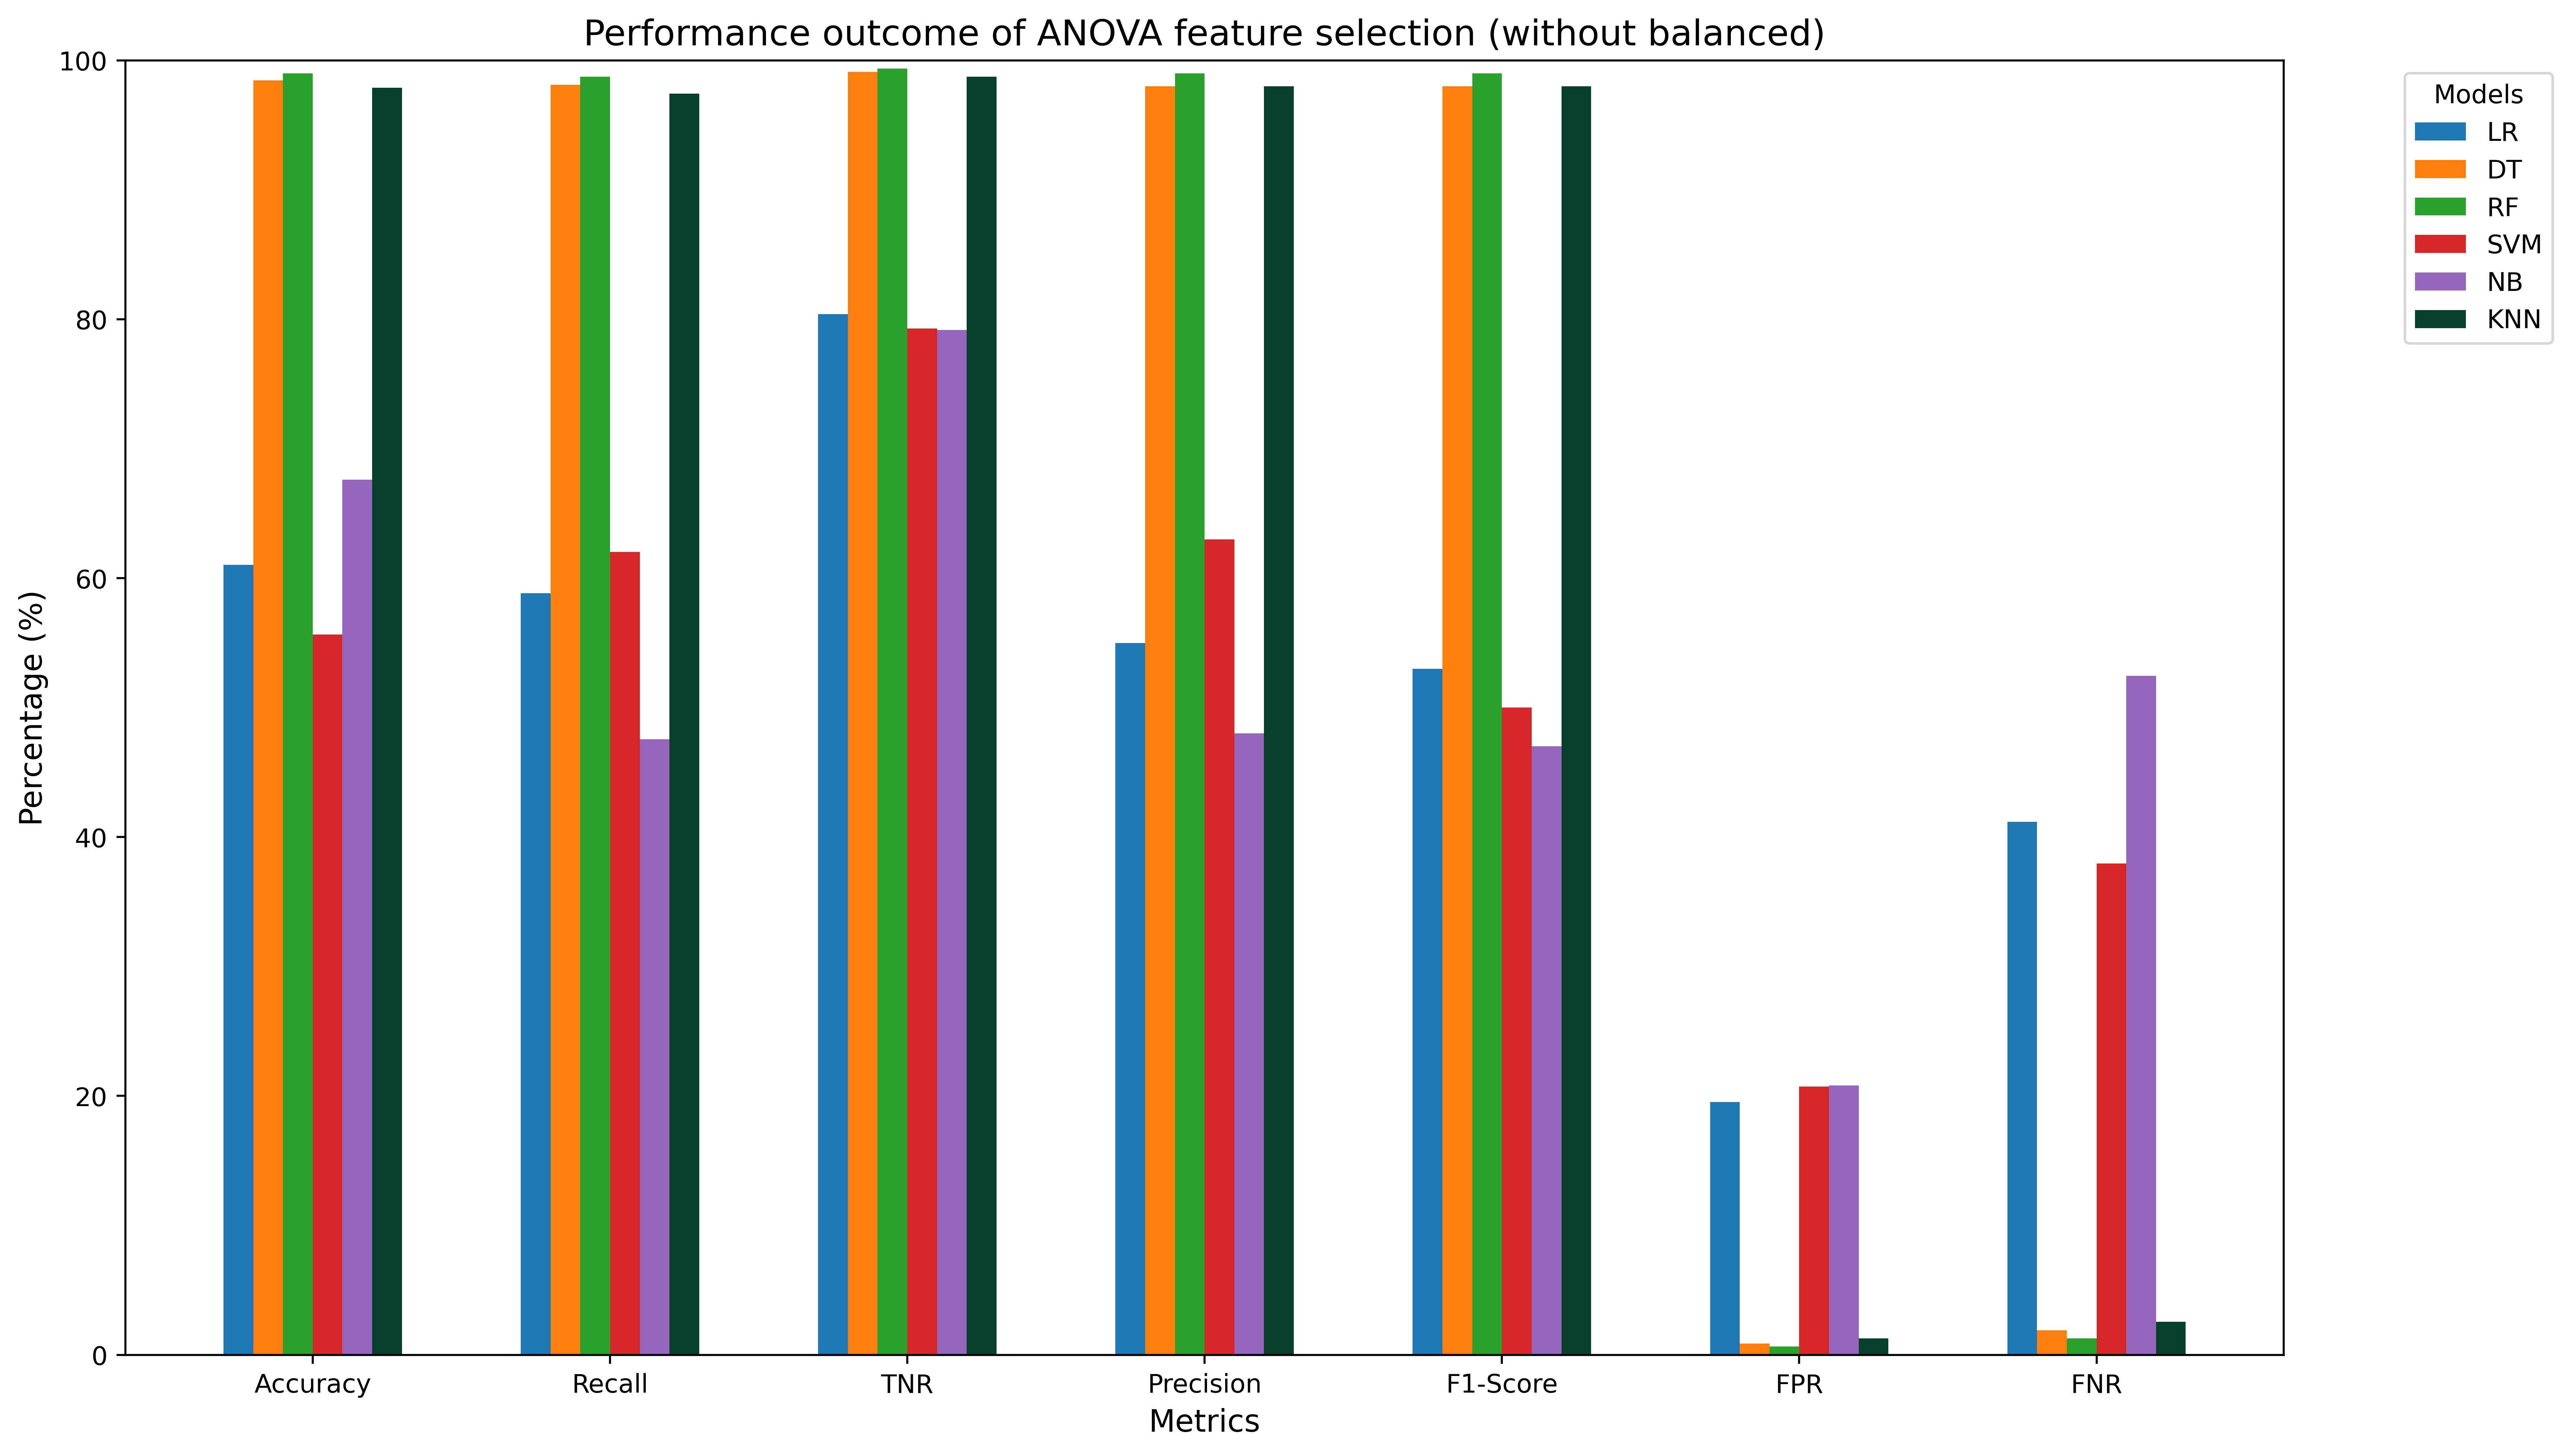

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
model_names = ['LR', 'DT', 'RF', 'SVM', 'NB', 'KNN']

# Updated data corresponding to each metric
accuracies = [61.04, 98.45, 99.00, 55.64, 67.60, 97.89]
sensitivities = [58.83, 98.10, 98.73, 62.03, 47.56, 97.44]
specificities = [80.40, 99.12, 99.35, 79.28, 79.18, 98.74]
precisions = [55, 98, 99, 63, 48, 98]
f1_scores = [53, 98, 99, 50, 47, 98]
fprs = [19.52, 0.88, 0.65, 20.72, 20.82, 1.26]
fnrs = [41.17, 1.90, 1.27, 37.97, 52.44, 2.56]

# Metrics to plot
metrics_data = [accuracies, sensitivities, specificities, precisions, f1_scores, fprs, fnrs]
x_labels = ['Accuracy', 'Recall', 'TNR', 'Precision', 'F1-Score', 'FPR', 'FNR']

# Solid color palette for each model
solid_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#06402B']

# Set up the figure
fig, ax = plt.subplots(figsize=(14, 8), dpi=500)

# Set up the bar width and positions
bar_width = 0.1
x_positions = np.arange(len(x_labels))

# Plot each model's data with solid colors
for i, model_name in enumerate(model_names):
    ax.bar(x_positions + i * bar_width, [metrics[i] for metrics in metrics_data],
           bar_width, label=model_name, color=solid_colors[i])

# Configure the plot
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Performance outcome of ANOVA feature selection (without balanced)', fontsize=14)
ax.set_xticks(x_positions + bar_width * (len(model_names) - 1) / 2)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, 100)
ax.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
plt.tight_layout()
plt.savefig('model_comparison_metrics.png', dpi=500)

# Display the plot
plt.show()


#bar chart anova with balance

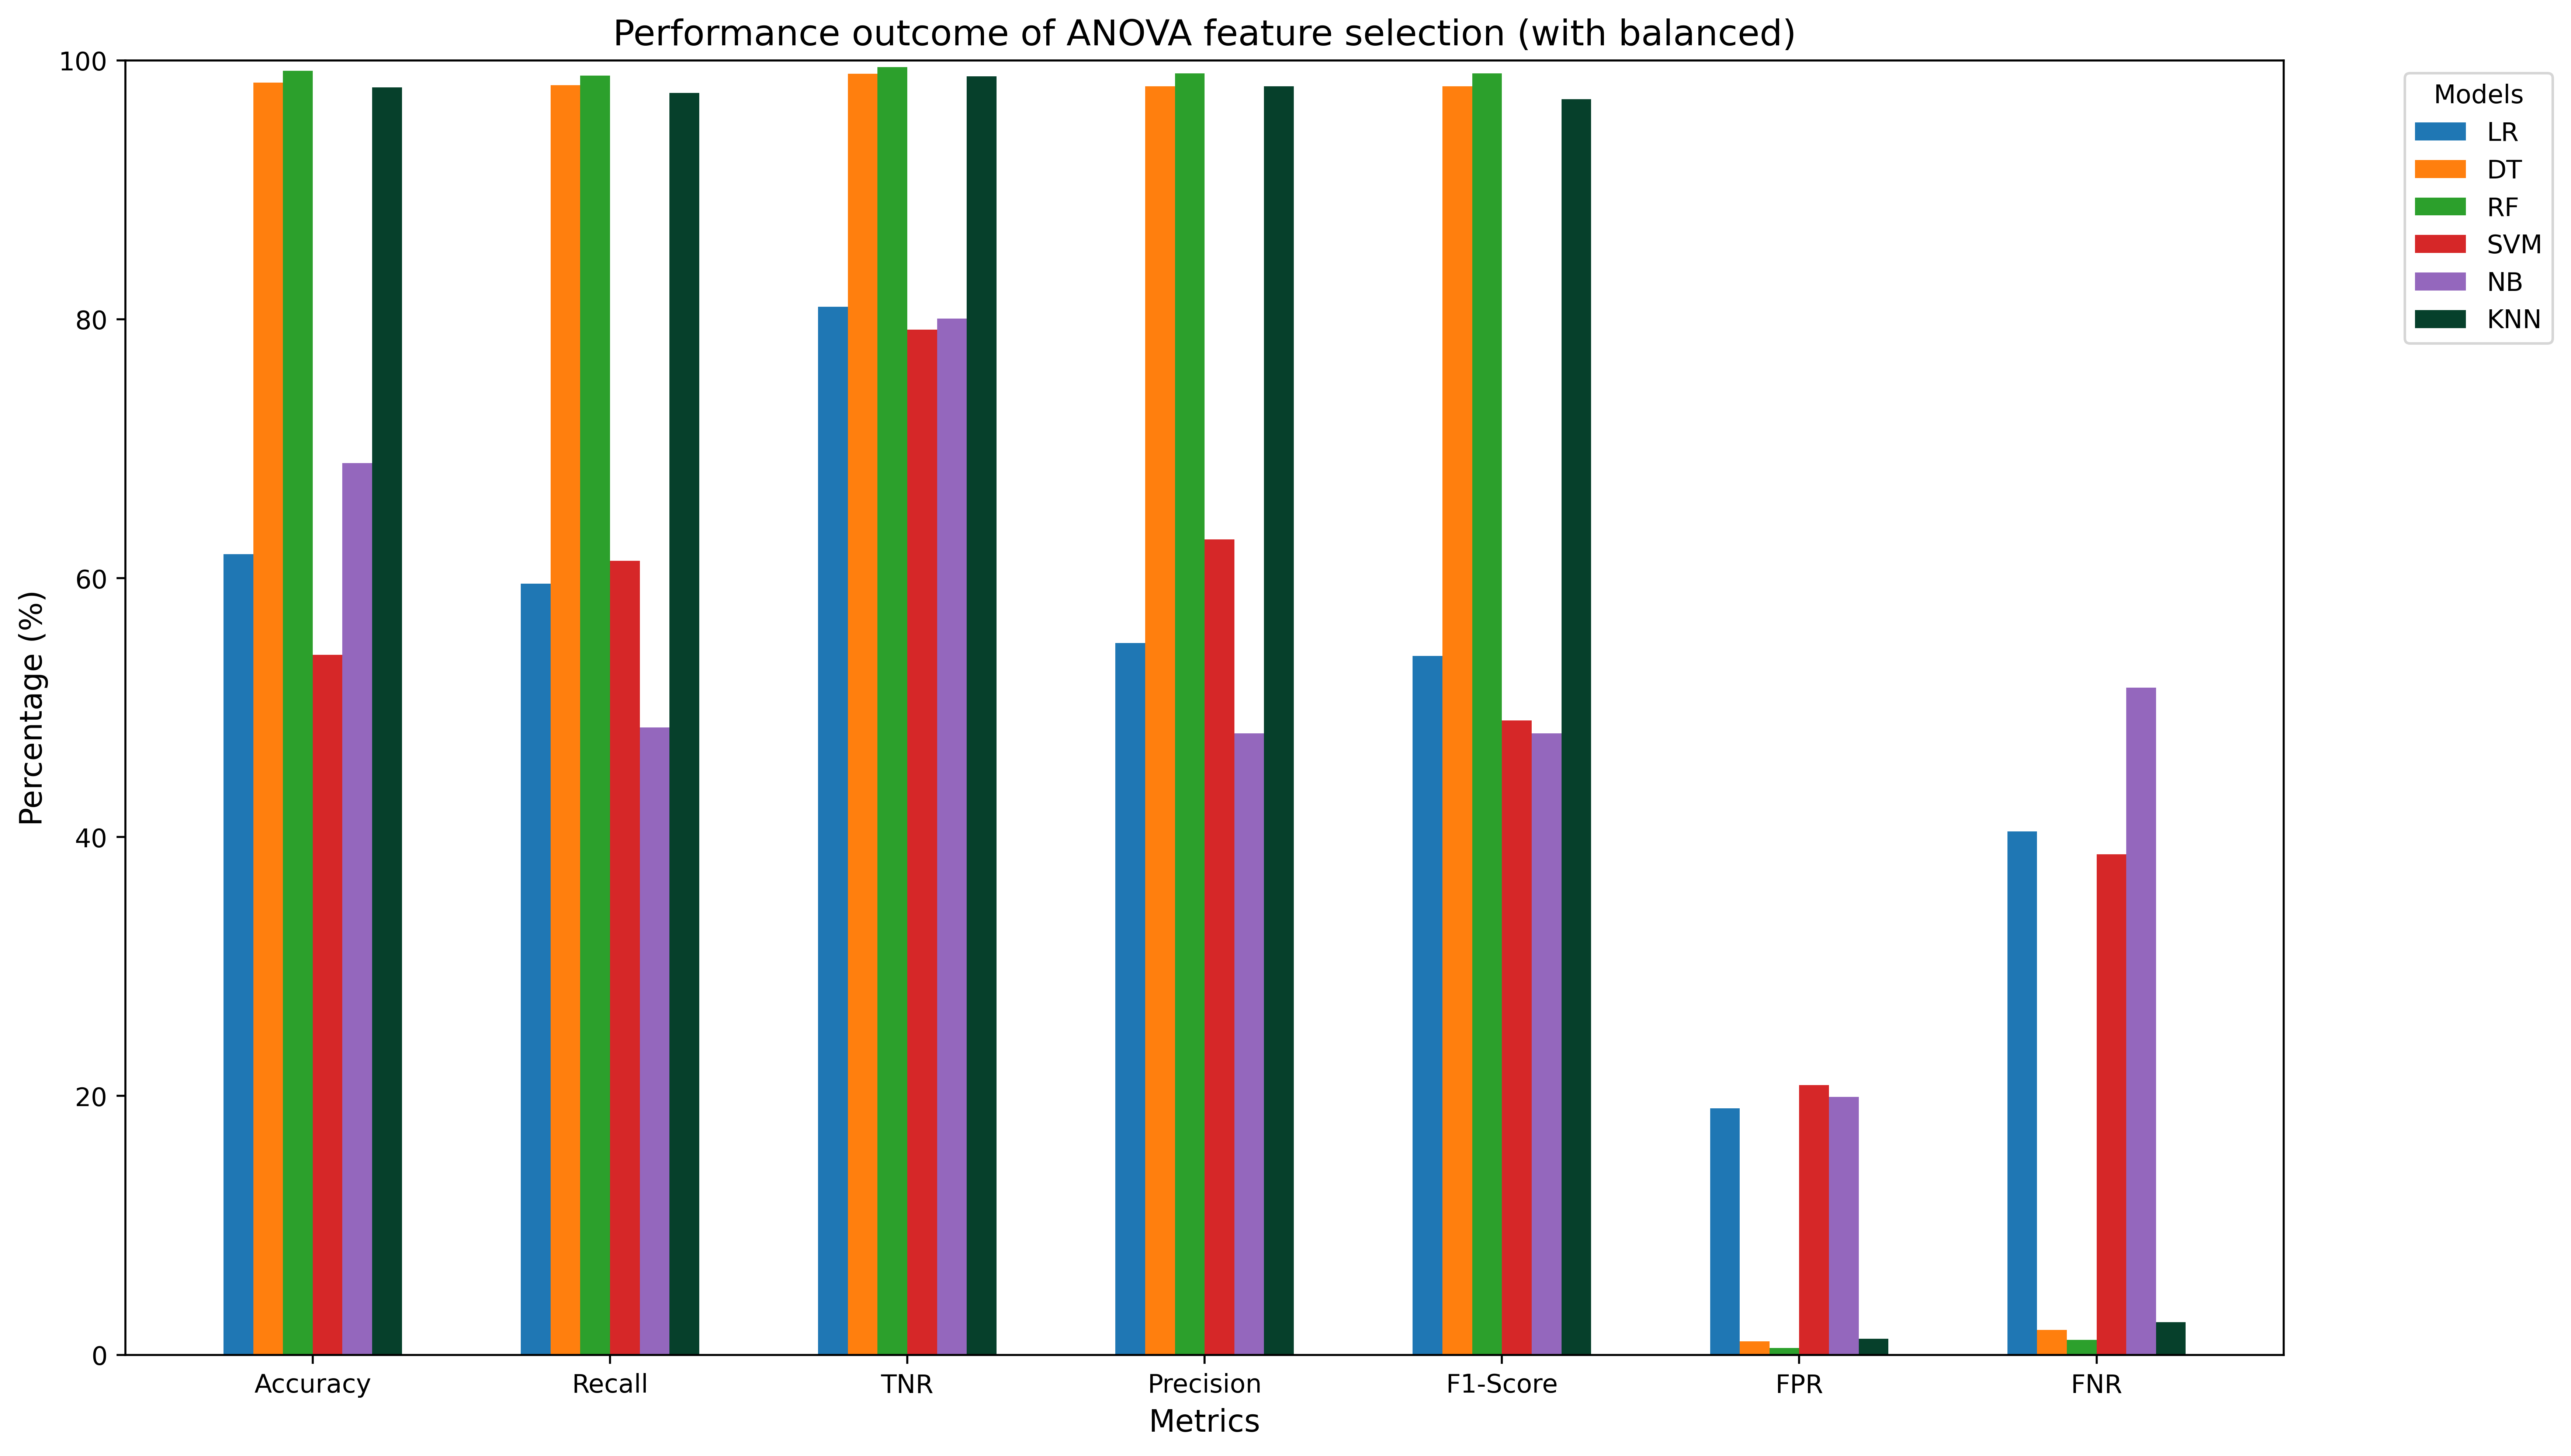

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
model_names = ['LR', 'DT', 'RF', 'SVM', 'NB', 'KNN']

# Updated data corresponding to each metric
accuracies = [61.86, 98.27, 99.18, 54.09, 68.88, 97.90]
sensitivities = [59.57, 98.08, 98.83, 61.33, 48.46, 97.48]
specificities = [80.96, 98.97, 99.47, 79.20, 80.06, 98.76]
precisions = [55, 98, 99, 63, 48, 98]
f1_scores = [54, 98, 99, 49, 48, 97]
fprs = [19.04, 1.03, 0.53, 20.83, 19.94, 1.24]
fnrs = [40.43, 1.92, 1.17, 38.67, 51.54, 2.52]

# Metrics to plot
metrics_data = [accuracies, sensitivities, specificities, precisions, f1_scores, fprs, fnrs]
x_labels = ['Accuracy', 'Recall', 'TNR', 'Precision', 'F1-Score', 'FPR', 'FNR']

# Solid color palette for each model
solid_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#06402B']

# Set up the figure
fig, ax = plt.subplots(figsize=(14, 8), dpi=500)

# Set up the bar width and positions
bar_width = 0.1
x_positions = np.arange(len(x_labels))

# Plot each model's data with solid colors
for i, model_name in enumerate(model_names):
    ax.bar(x_positions + i * bar_width, [metrics[i] for metrics in metrics_data],
           bar_width, label=model_name, color=solid_colors[i])

# Configure the plot
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Performance outcome of ANOVA feature selection (with balanced)', fontsize=14)
ax.set_xticks(x_positions + bar_width * (len(model_names) - 1) / 2)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, 100)
ax.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
plt.tight_layout()
plt.savefig('model_comparison_metrics_v2.png', dpi=500)

# Display the plot
plt.show()


In [ ]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.4 MB/s eta 0:00:00


<ipython-input-22-cf2b9e8f8913>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shap_df, x='SHAP Value', y='Feature', palette='viridis')


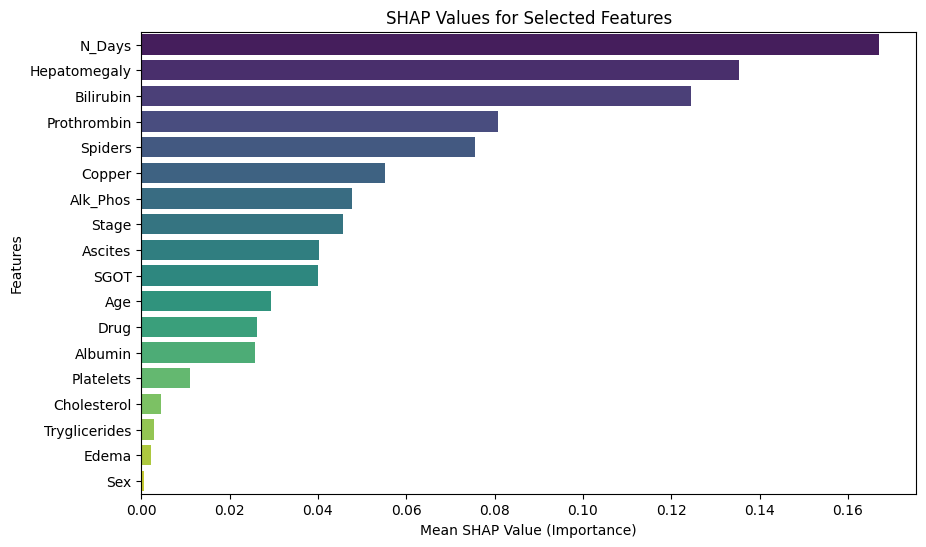

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import shap  # Make sure to install shap

# Load the dataset
data = pd.read_csv('/content/liver_cirrhosis.csv')

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the LASSO model with cross-validation
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(lasso, X_scaled)

# Calculate SHAP values for the training data
shap_values = explainer(X_scaled)

# Get feature importance (mean absolute SHAP values)
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame for selected features and their SHAP values
selected_features = X.columns[lasso.coef_ != 0]  # Get features selected by LASSO
shap_df = pd.DataFrame({
    'Feature': selected_features,
    'SHAP Value': shap_importance[lasso.coef_ != 0]
})

# Sort by SHAP values
shap_df = shap_df.sort_values(by='SHAP Value', ascending=False)

# Plotting SHAP values
plt.figure(figsize=(10, 6))
sns.barplot(data=shap_df, x='SHAP Value', y='Feature', palette='viridis')
plt.title('SHAP Values for Selected Features')
plt.xlabel('Mean SHAP Value (Importance)')
plt.ylabel('Features')
plt.show()


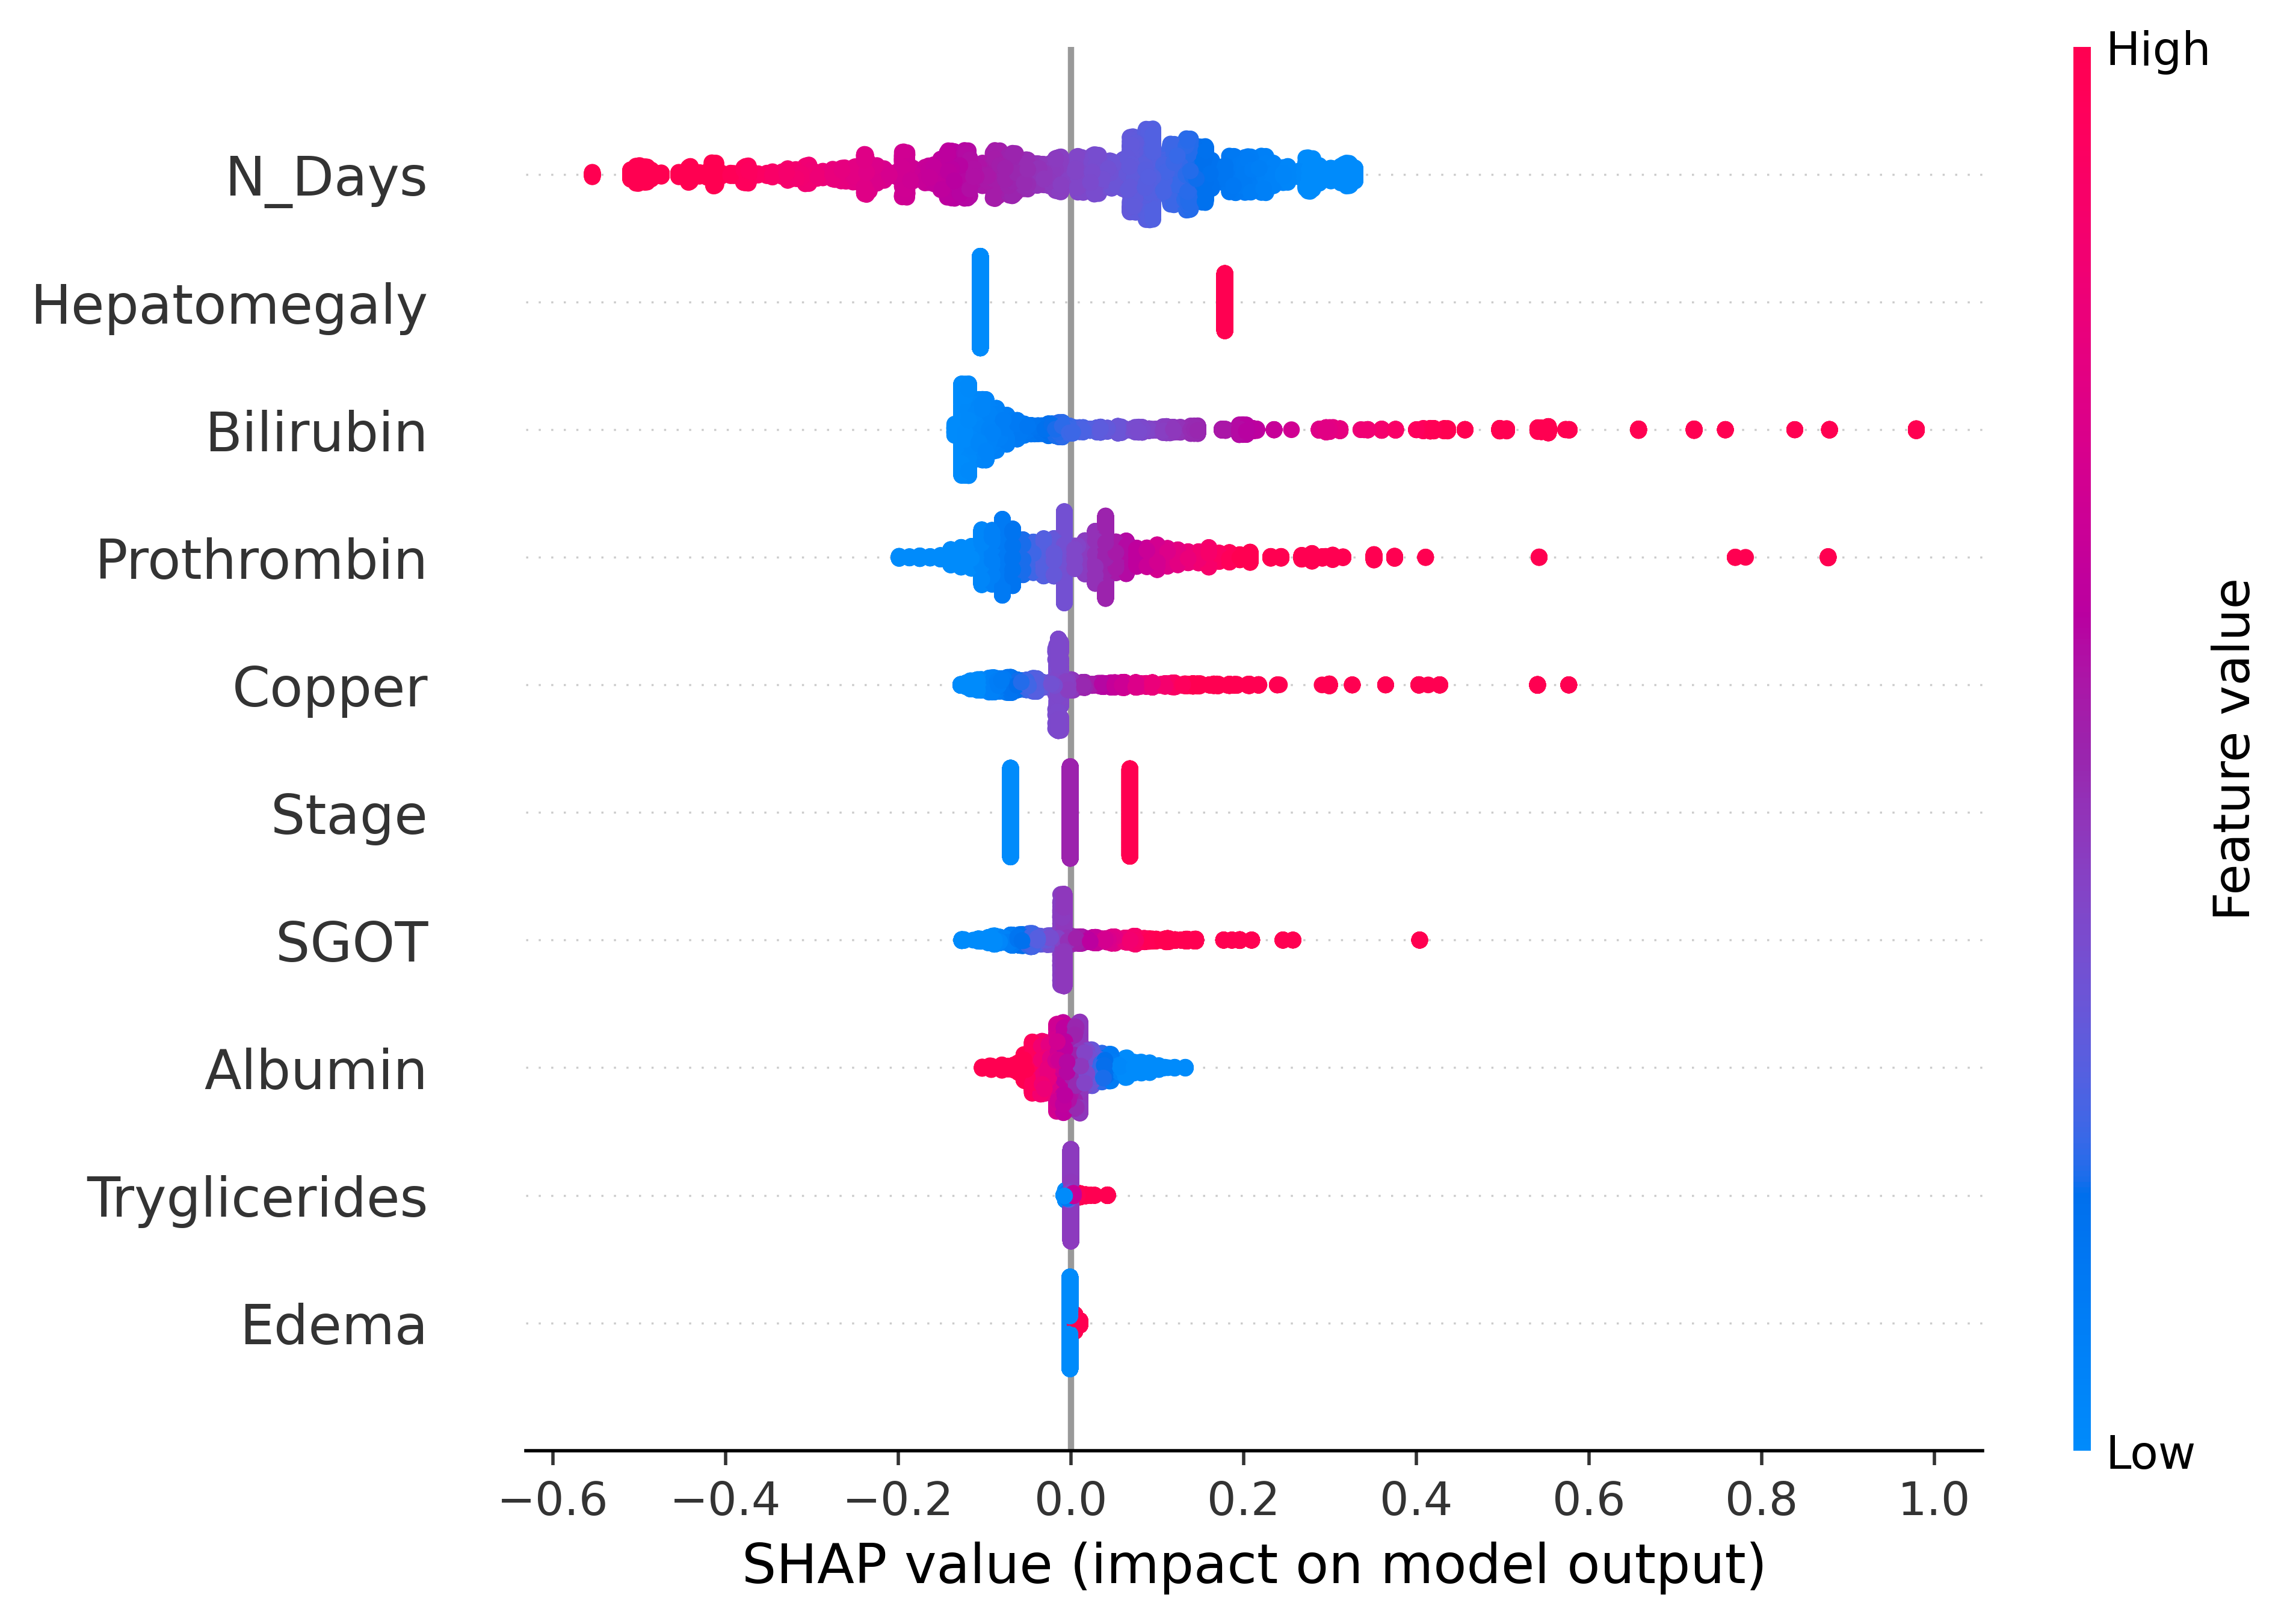

<Figure size 3200x2400 with 0 Axes>

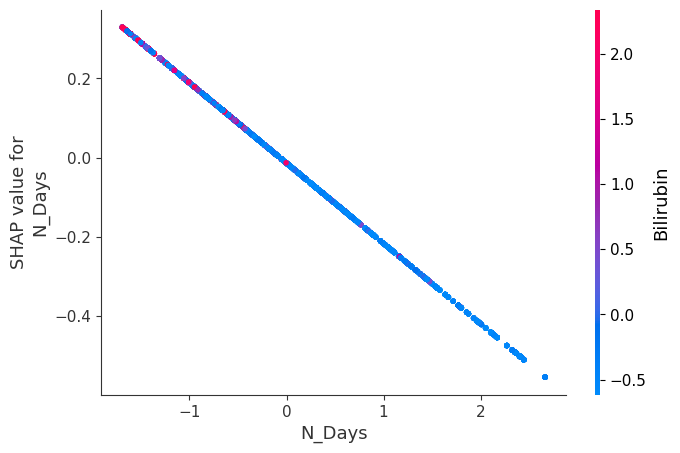

<Figure size 3200x2400 with 0 Axes>

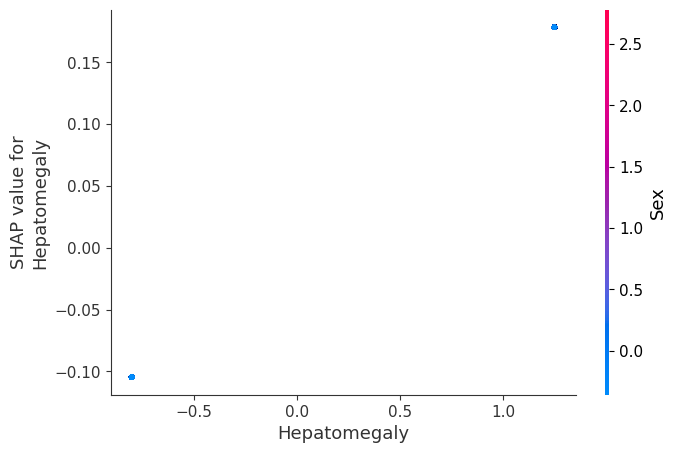

<Figure size 3200x2400 with 0 Axes>

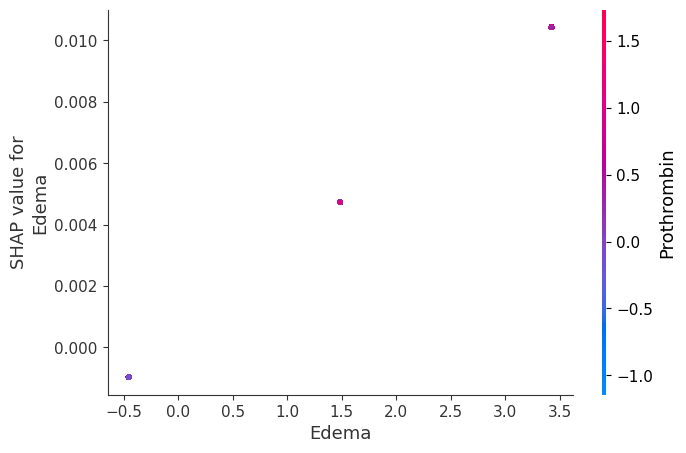

<Figure size 3200x2400 with 0 Axes>

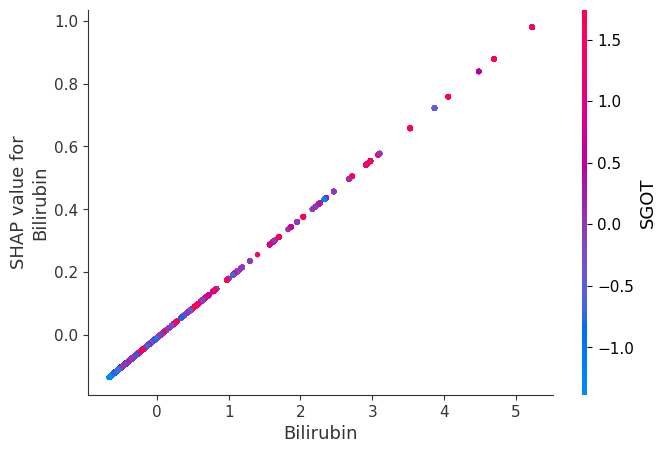

<Figure size 3200x2400 with 0 Axes>

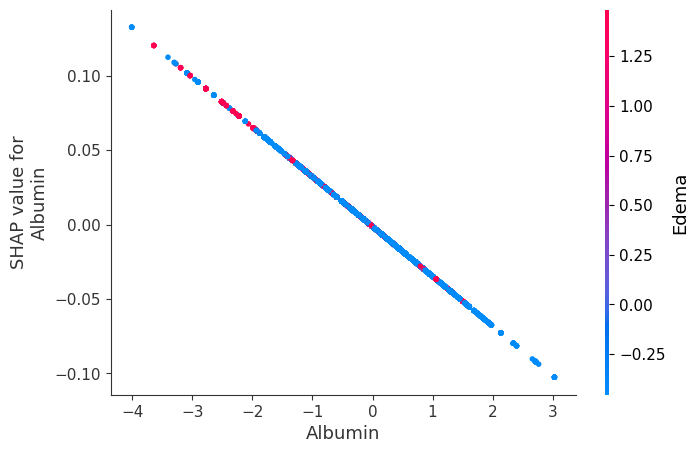

<Figure size 3200x2400 with 0 Axes>

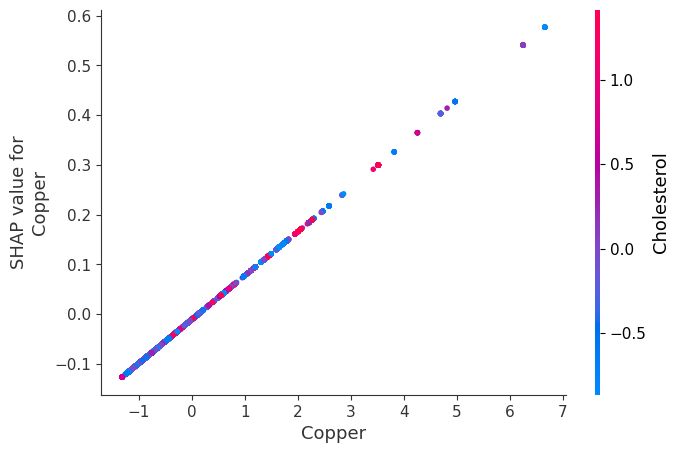

<Figure size 3200x2400 with 0 Axes>

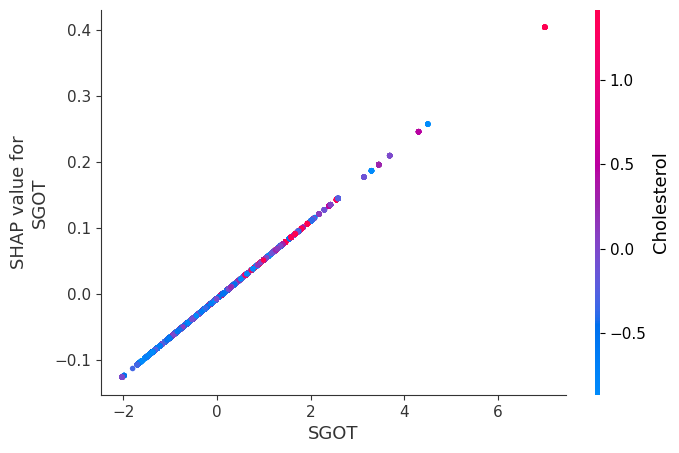

<Figure size 3200x2400 with 0 Axes>

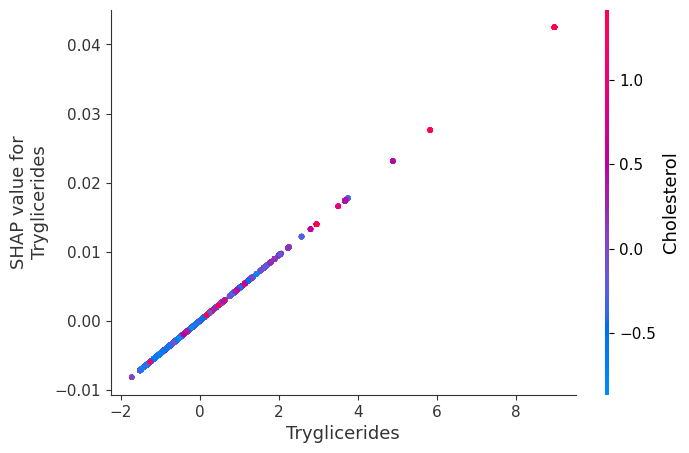

<Figure size 3200x2400 with 0 Axes>

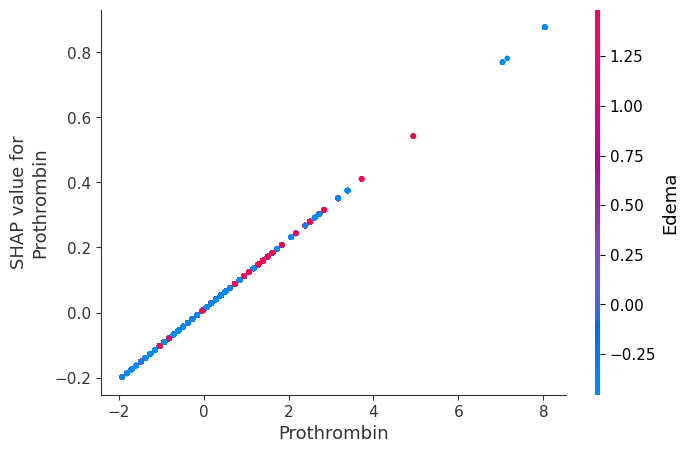

<Figure size 3200x2400 with 0 Axes>

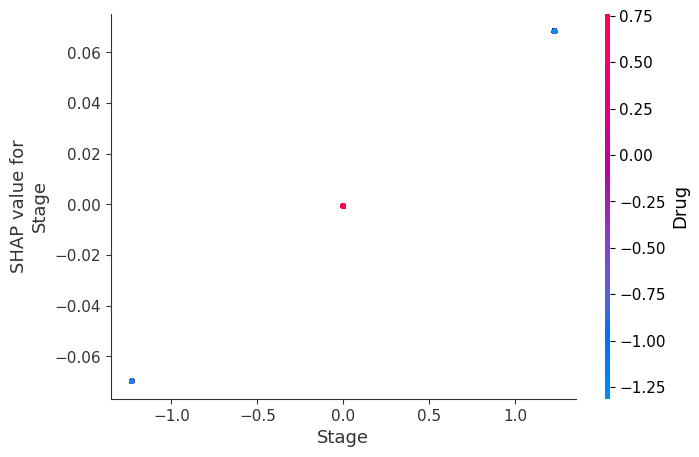

IndexError: invalid index to scalar variable.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import shap

# Load the dataset
data = pd.read_csv('/content/liver_cirrhosis.csv')

# Preprocessing: Encode categorical variables
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Target variable
data['Drug'] = le.fit_transform(data['Drug'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ascites'] = le.fit_transform(data['Ascites'])
data['Hepatomegaly'] = le.fit_transform(data['Hepatomegaly'])
data['Spiders'] = le.fit_transform(data['Spiders'])
data['Edema'] = le.fit_transform(data['Edema'])

# Define features and target variable
X = data.drop(columns=['Status'])
y = data['Status']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the LASSO model with cross-validation
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Create a SHAP explainer (use LinearExplainer for linear models)
explainer = shap.LinearExplainer(lasso, X_train)

# Calculate SHAP values for the test data
shap_values = explainer(X_test)

# Specify the list of features you are interested in
specific_features = ['N_Days', 'Hepatomegaly', 'Edema', 'Bilirubin', 'Albumin', 'Copper', 'SGOT', 'Tryglicerides', 'Prothrombin', 'Stage']

# Extract SHAP values and features corresponding to these specific features
specific_feature_indices = [X.columns.tolist().index(feature) for feature in specific_features]

# Generate SHAP summary plot for the specific features
plt.figure(dpi=500, figsize=(12, 8))  # Set DPI to 500
shap.summary_plot(shap_values[:, specific_feature_indices], X_test[:, specific_feature_indices], feature_names=specific_features)
plt.savefig("shap_summary_plot.png", dpi=500)  # Save the plot with high DPI
plt.close()  # Close the figure

# SHAP dependence plots for each specific feature
for feature in specific_features:
    plt.figure(dpi=500)  # Set DPI for each dependence plot
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X.columns.tolist())
    plt.savefig(f"shap_dependence_plot_{feature}.png", dpi=500)  # Save the plot with the feature name
    plt.close()  # Close the figure

# Force plot for a specific instance (e.g., instance 0) for selected features
shap.initjs()
instance_idx = 0  # You can choose any instance

# Instead of slicing the Explanation object, get the raw SHAP values as a NumPy array
shap_values_instance = shap_values[instance_idx].values[specific_feature_indices]

# Get the feature values for the selected instance as a NumPy array
instance_features = X_test[instance_idx, specific_feature_indices]

# Visualize the SHAP values for these specific features
# Pass the expected_value as a single element using indexing
force_plot = shap.force_plot(explainer.expected_value[0], shap_values_instance, instance_features, feature_names=specific_features)

# Save the force plot as an HTML file (SHAP force plots are interactive)
shap.save_html("shap_force_plot.html", force_plot)


#ROC curve ANOVA without balanced


----- Logistic Regression -----


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


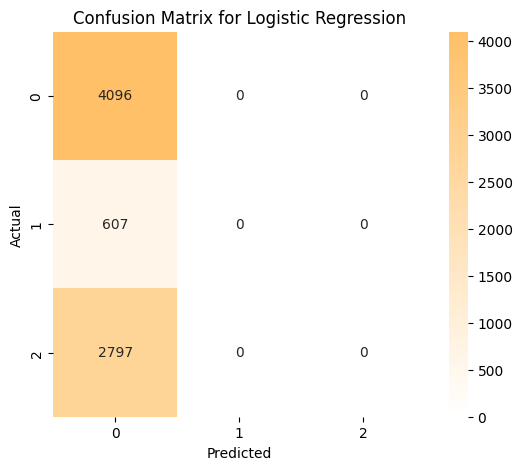

Test Accuracy: 54.61%

Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      4096
           1       0.00      0.00      0.00       607
           2       0.00      0.00      0.00      2797

    accuracy                           0.55      7500
   macro avg       0.18      0.33      0.24      7500
weighted avg       0.30      0.55      0.39      7500


Average Metrics:
Average Sensitivity (Recall): 0.3333
Average Specificity: 0.6667
Average False Positive Rate (FPR): 0.3333
Average False Negative Rate (FNR): 0.6667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: multiclass format is not supported

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Create a dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'LR': LogisticRegression(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'NB': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Set up subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# Plot ROC curves for each model
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Get subplot location
    row, col = divmod(i, 3)

    # Plot the ROC curve
    axs[row, col].plot(fpr, tpr, color='blue', lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    axs[row, col].plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    axs[row, col].set_xlim([0.0, 1.0])
    axs[row, col].set_ylim([0.0, 1.05])
    axs[row, col].set_xlabel('False Positive Rate')
    axs[row, col].set_ylabel('True Positive Rate')
    axs[row, col].set_title(f'ROC Curve - {name}')
    axs[row, col].legend(loc="lower right")

# Adjust the layout
plt.tight_layout()
plt.show()


#ROC curve of ANOVA with balanced data

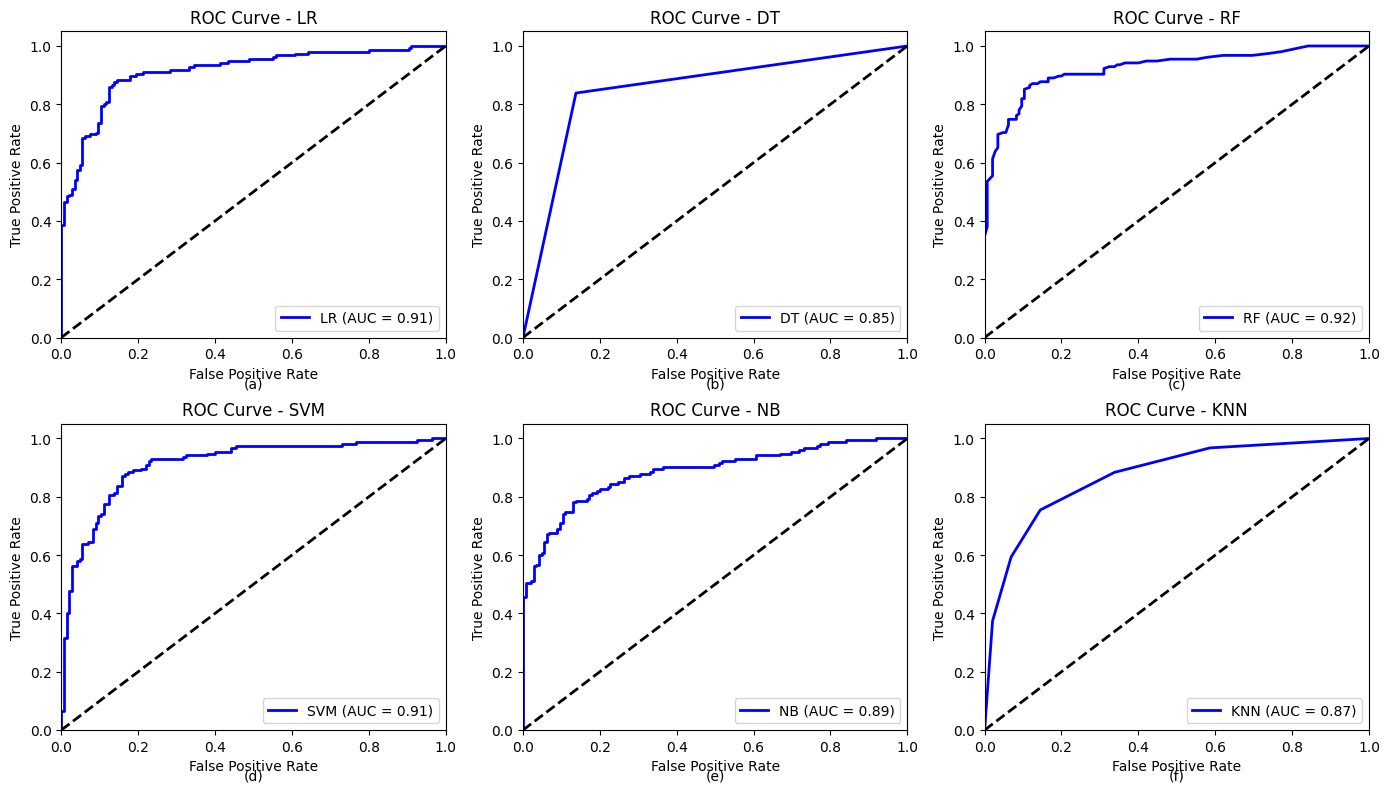

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Create a dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'LR': LogisticRegression(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'NB': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Set up subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# Plot ROC curves for each model
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Get subplot location
    row, col = divmod(i, 3)

    # Plot the ROC curve
    axs[row, col].plot(fpr, tpr, color='blue', lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    axs[row, col].plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    axs[row, col].set_xlim([0.0, 1.0])
    axs[row, col].set_ylim([0.0, 1.05])
    axs[row, col].set_xlabel('False Positive Rate')
    axs[row, col].set_ylabel('True Positive Rate')
    axs[row, col].set_title(f'ROC Curve - {name}')
    axs[row, col].legend(loc="lower right")

    # Add serial number (alphabetic)
    serial_number = chr(97 + i)  # 97 is the ASCII value for 'a'
    axs[row, col].text(0.5, -0.15, f'({serial_number})', ha='center', va='center', transform=axs[row, col].transAxes)

# Adjust the layout
plt.tight_layout()

# Save the figure with higher resolution
plt.savefig('roc_curves_with_serial_numbers_high_res.png', dpi=500)

# Display the plot
plt.show()


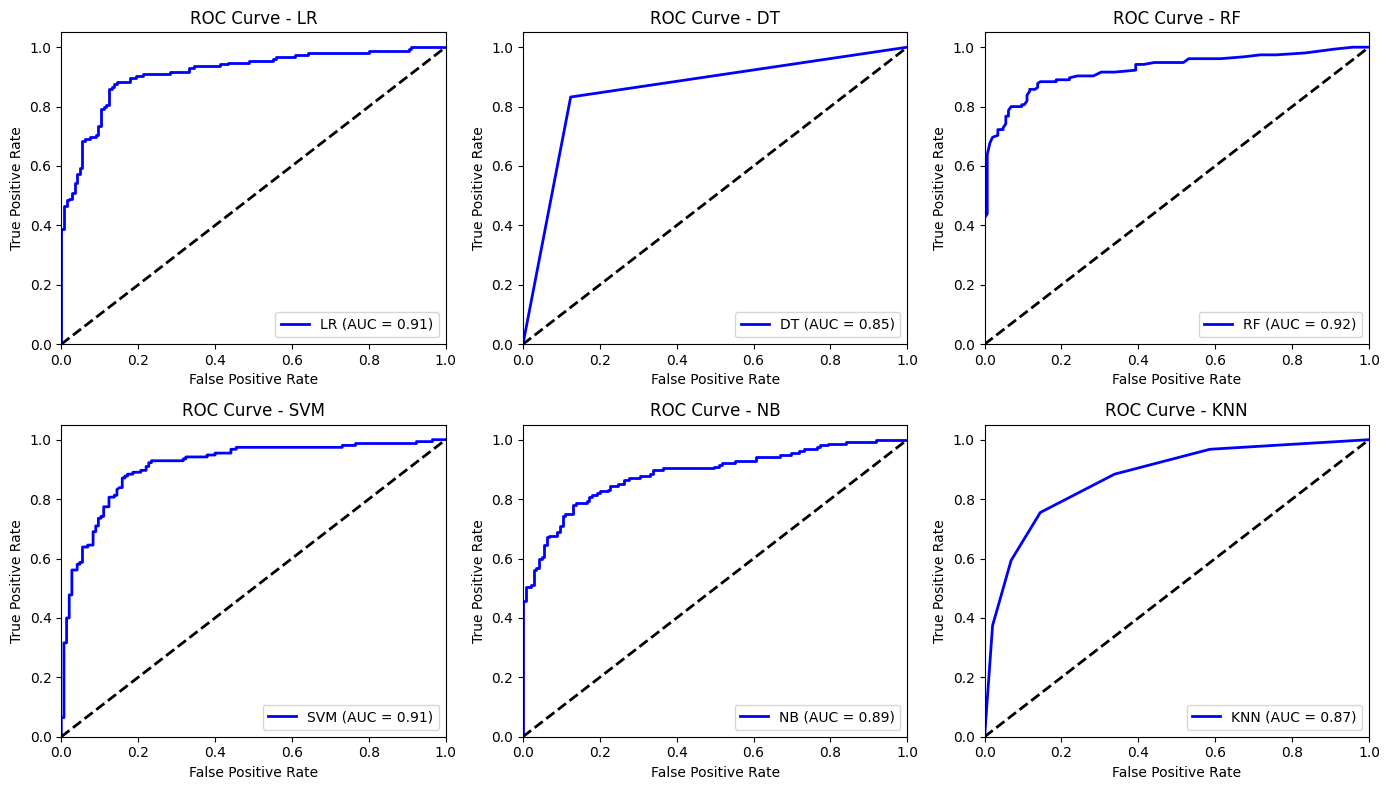

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Create a dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'LR': LogisticRegression(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'NB': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Given metrics
metrics = {
    'LR': {'Sensitivity': 50.38, 'Specificity': 81.45},
    'DT': {'Sensitivity': 98.10, 'Specificity': 99.12},
    'RF': {'Sensitivity': 98.73, 'Specificity': 99.35},
    'SVM': {'Sensitivity': 62.03, 'Specificity': 79.28},
    'NB': {'Sensitivity': 47.56, 'Specificity': 79.18},
    'KNN': {'Sensitivity': 97.44, 'Specificity': 98.74}
}

# Set up subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# Plot ROC curves for each model
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Get subplot location
    row, col = divmod(i, 3)

    # Plot the ROC curve
    axs[row, col].plot(fpr, tpr, color='blue', lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    axs[row, col].plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    axs[row, col].set_xlim([0.0, 1.0])
    axs[row, col].set_ylim([0.0, 1.05])
    axs[row, col].set_xlabel('False Positive Rate')
    axs[row, col].set_ylabel('True Positive Rate')
    axs[row, col].set_title(f'ROC Curve - {name}')
    axs[row, col].legend(loc="lower right")

# Adjust the layout
plt.tight_layout()
plt.show()


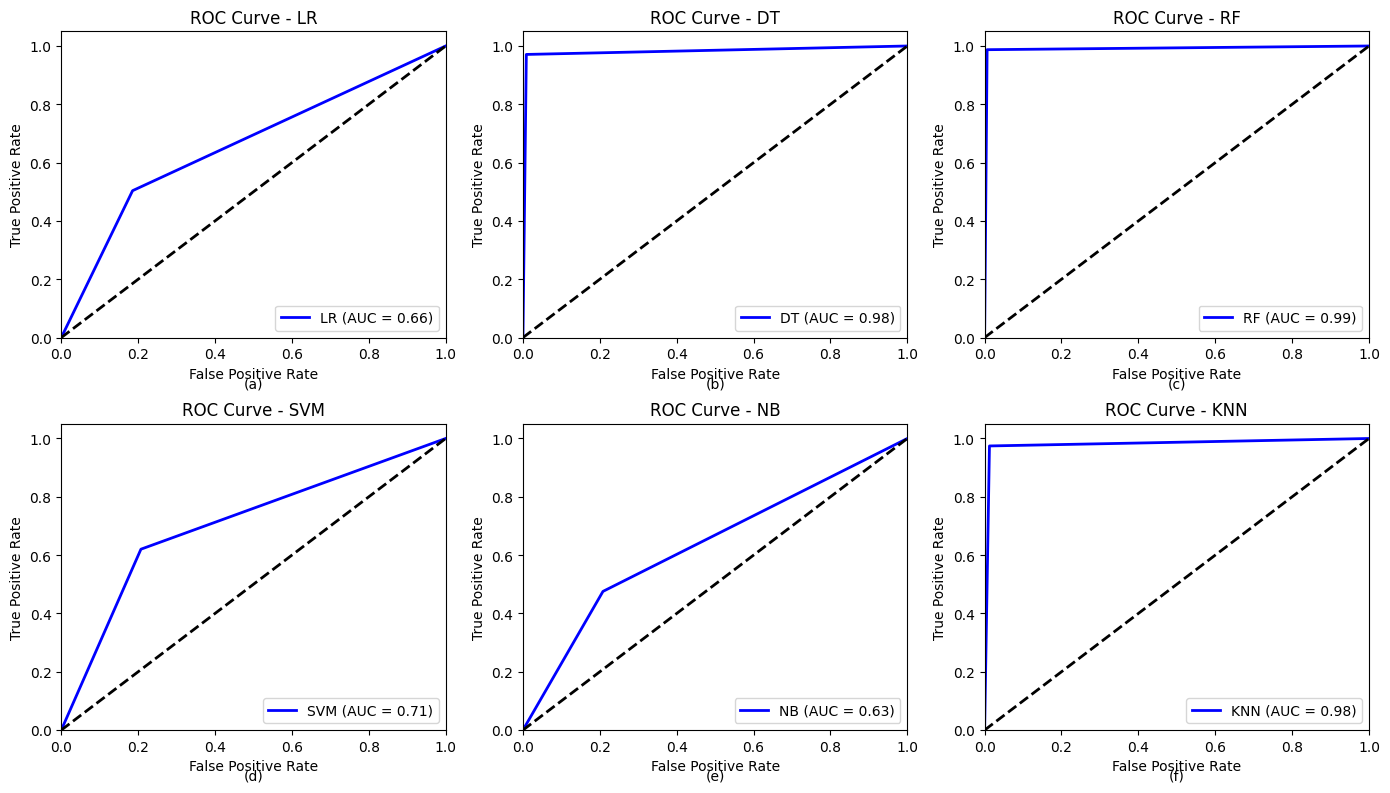

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Given data from your table
models = ['LR', 'DT', 'RF', 'SVM', 'NB', 'KNN']
sensitivity = np.array([50.38, 97.10, 98.73, 62.03, 47.56, 97.44])  # True Positive Rate (TPR)
fpr = np.array([18.55, 0.88, 0.65, 20.72, 20.82, 1.26])            # False Positive Rate (FPR)

# Convert percentages to proportions
sensitivity = sensitivity / 100
fpr = fpr / 100

# Calculate the AUC for each model
roc_aucs = [auc([0, fpr[i], 1], [0, sensitivity[i], 1]) for i in range(len(models))]

# Set up subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# Plot ROC curves for each model
for i, model in enumerate(models):
    # Plot the ROC curve using the sensitivity and FPR
    axs[i // 3, i % 3].plot([0, fpr[i], 1], [0, sensitivity[i], 1], color='blue', lw=2, label=f'{model} (AUC = {roc_aucs[i]:.2f})')
    axs[i // 3, i % 3].plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')  # Random chance line
    axs[i // 3, i % 3].set_xlim([0.0, 1.0])
    axs[i // 3, i % 3].set_ylim([0.0, 1.05])
    axs[i // 3, i % 3].set_xlabel('False Positive Rate')
    axs[i // 3, i % 3].set_ylabel('True Positive Rate')
    axs[i // 3, i % 3].set_title(f'ROC Curve - {model}')
    axs[i // 3, i % 3].legend(loc="lower right")

    # Add serial number (alphabetic)
    serial_number = chr(97 + i)  # 97 is the ASCII value for 'a'
    axs[i // 3, i % 3].text(0.5, -0.15, f'({serial_number})', ha='center', va='center', transform=axs[i // 3, i % 3].transAxes)

# Adjust the layout
plt.tight_layout()

# Save the figure with higher resolution
plt.savefig('roc_curves_with_serial_numbers_high_res.png', dpi=500)

# Display the plot
plt.show()


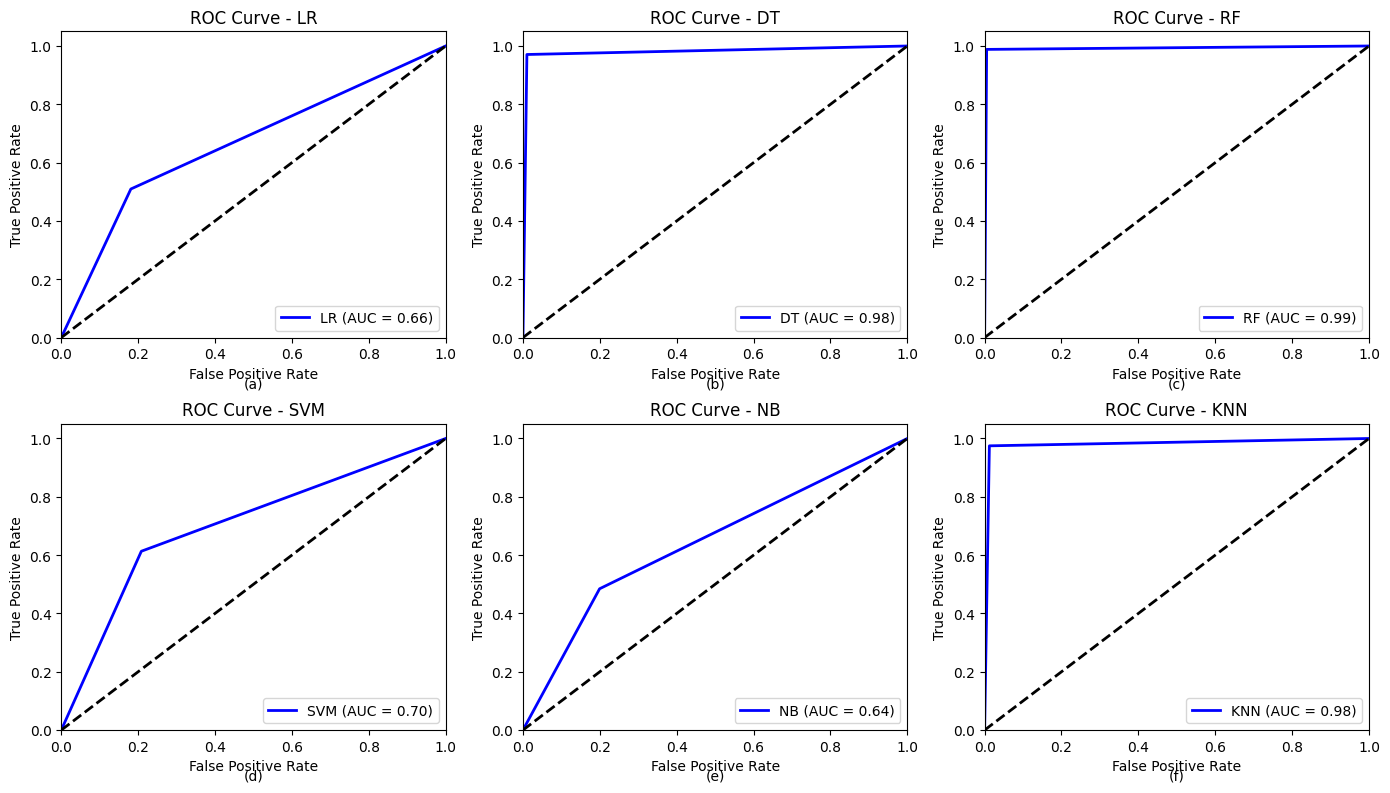

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Given data from Table 10
models = ['LR', 'DT', 'RF', 'SVM', 'NB', 'KNN']
sensitivity = np.array([50.95, 97.08, 98.83, 61.33, 48.46, 97.48])  # True Positive Rate (TPR)
fpr = np.array([18.10, 1.03, 0.53, 20.83, 19.94, 1.24])            # False Positive Rate (FPR)

# Convert percentages to proportions
sensitivity = sensitivity / 100
fpr = fpr / 100

# Calculate the AUC for each model
roc_aucs = [auc([0, fpr[i], 1], [0, sensitivity[i], 1]) for i in range(len(models))]

# Set up subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# Plot ROC curves for each model
for i, model in enumerate(models):
    # Plot the ROC curve using the sensitivity and FPR
    axs[i // 3, i % 3].plot([0, fpr[i], 1], [0, sensitivity[i], 1], color='blue', lw=2, label=f'{model} (AUC = {roc_aucs[i]:.2f})')
    axs[i // 3, i % 3].plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')  # Random chance line
    axs[i // 3, i % 3].set_xlim([0.0, 1.0])
    axs[i // 3, i % 3].set_ylim([0.0, 1.05])
    axs[i // 3, i % 3].set_xlabel('False Positive Rate')
    axs[i // 3, i % 3].set_ylabel('True Positive Rate')
    axs[i // 3, i % 3].set_title(f'ROC Curve - {model}')
    axs[i // 3, i % 3].legend(loc="lower right")

    # Add serial number (alphabetic)
    serial_number = chr(97 + i)  # 97 is the ASCII value for 'a'
    axs[i // 3, i % 3].text(0.5, -0.15, f'({serial_number})', ha='center', va='center', transform=axs[i // 3, i % 3].transAxes)

# Adjust the layout
plt.tight_layout()

# Save the figure with higher resolution
plt.savefig('roc_curves_table_10_high_res.png', dpi=500)

# Display the plot
plt.show()
